# Notebook for Master Thesis
Author: Youri Senders <br/>
Student Number: 2018966 <br/>
ANR: 895590 <br/>

Title: The Impact of Stemming and Lemmatization in Predicting Sentiment Polarity of Twitter data <br/>
Dataset: Sentiment140 <br/>
Date: Feb 2021 - June 2021

# Part I: Exploratory Data Analysis
The first part of the notebook is about exploring the data. The dataset is loaded, and some standard/basic EDA functions are used in order to get to know the data. Some examples:
- Import necessary packages
- Load data
- Print dataframe
- Print head/tail of data
- Check for missing values
- Check the labels of the tweets
- Visualise by plotting

In [1]:
%matplotlib inline
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
warnings.simplefilter(action='ignore')

In [2]:
header_list = ["label", "id", "date", "flag", "username", "content"]

In [3]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', names=header_list)
df

,label,id,date,flag,username,content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
#check for missing data

missing_data = df.isna().sum().sort_values(ascending=False)
percentage_missing = round((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100,2)
missing_info = pd.concat([missing_data,percentage_missing],keys=['Missing values','Percentage'],axis=1)
missing_info.style.background_gradient()

,Missing values,Percentage
content,0,0.000000
username,0,0.000000
flag,0,0.000000
date,0,0.000000
id,0,0.000000
label,0,0.000000


In [5]:
print(df['content'].head(3))

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
Name: content, dtype: object


In [6]:
print(df['content'].tail(3))

1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: content, dtype: object


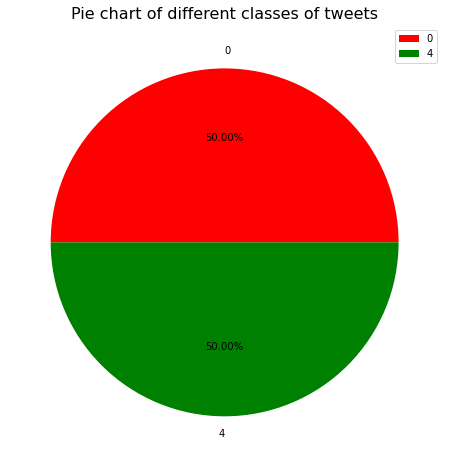

In [7]:
fig = plt.figure(figsize=(8,8))
targets = df.groupby('label').size()
targets.plot(kind='pie', subplots=True, figsize=(10, 8), autopct = "%.2f%%", colors=['red','green'])
plt.title("Pie chart of different classes of tweets",fontsize=16)
plt.ylabel("")
plt.legend()
plt.show()

In [8]:
df['label'].value_counts()

4    800000
0    800000
Name: label, dtype: int64

# Part II: Data Cleaning process
This part is about performing the basic cleaning steps of the paper of Magliani et al. (2016). The basic cleaning steps are:
- Remove URLs
- Remove hashtags
- Remove Mentions (@username)
- Tabs and line breaks are replaced with a blank, followed by a quotation mark with apexes
- Words with a sequence of three or more vowels are shortened to two vowels
- Emoticons are converted to tags
- Removing extra blank spaces
- Lowercase text

In [9]:
# transform labels to 0 and 1
# 0 = negative tweet
# 1 = positive tweet
df.label = df.label.replace({4: 1})

In [10]:
# drop unnecessary columns
df.drop(["id", "date", "flag", "username"], axis=1, inplace=True)
df

,label,content
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


In [11]:
random_neg = df[:799999].sample(frac = .125, replace = False, random_state=2)
random_pos = df[800000:].sample(frac = .125, replace = False, random_state=2)

In [12]:
print(random_neg['label'].value_counts())
print(random_pos['label'].value_counts())

0    100000
Name: label, dtype: int64
1    100000
Name: label, dtype: int64


In [13]:
df = pd.concat([random_neg, random_pos])
df

,label,content
307080,0,I'm cold. I need my Joe posters
309312,0,@BigEish I tried to get a phone tonight but I ...
230771,0,my braces are killing me.
761832,0,@joeymcintyre I heard you guys were on for one...
195631,0,Just got caught checking a pair of boobs. I fe...
...,...,...
1135476,1,@shansgrl I was thinking that Stable was more ...
1210161,1,@theeRSN ralph go to sleep see you tomorrow.
1518907,1,@aravindkumar yes i do have the blues today......
1521666,1,@lohhw3 i'll be on air tonight


In [14]:
df['label'].value_counts()

1    100000
0    100000
Name: label, dtype: int64

In [15]:
tweets_train = df['content'] #x_train
y_train = df['label'].values #y_train
print(tweets_train.shape)
print(y_train.shape)

(200000,)
(200000,)


In [16]:
from url_hashtag import cleaner_url
from emoticon import cleaner_emoji
from punctuation import cleaner_punc
from final import cleaner_final

def cleaned_tweets(tweets):
    """Applies basic cleaning operations and prepare to tokenize"""
    
    cleaned_tweet = []
    for tweet in tweets:
        tweet = cleaner_url(tweet) # remove URLs, hastags, mentions, replace tabs and line breaks.
        tweet = cleaner_emoji(tweet) # convert emoticons into tags
        tweet = cleaner_punc(tweet) # remove punctuation
        tweet = cleaner_final(tweet) # lowercasing and remove extra blank spaces
        cleaned_tweet.append(tweet)
    return cleaned_tweet

In [17]:
cleaned_train = cleaned_tweets(tweets_train)

# Part III: Stemming & Lemmatization
The third part is what this thesis is about: Stemming and Lemmatization. This part contains:
- Tokenize tweets
- Apply Porter Stemming filter
- Apply Snowball Stemming filter
- Apply Lancaster Stemming filter
- Apply Lovins Stemming filter
- Apply Lemmatization filter

This means we have have five versions of the dataset. We need to keep the original tokenized data as well, because we need this as baseline!

In [18]:
pip install stemming==1.0.1

Note: you may need to restart the kernel to use updated packages.


In [19]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Youri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Youri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
from nltk import word_tokenize

def tokenization(tweets):
    """Create tokens of each word in the corpus"""
    
    tokens = []
    for tweet in tweets:
        tweet = word_tokenize(tweet)
        tokens.append(tweet)
        
    return tokens

In [21]:
tokenized_train = tokenization(cleaned_train)

In [22]:
def filter_docs(corpus, texts, labels, condition_on_doc):
    """Filter corpus, texts and labels given the function condition_on_doc 
    which takes a doc.
    The document doc is kept if condition_on_doc(doc) is true."""
    number_of_docs = len(corpus)

    if texts is not None:
        texts = [text for (text, doc) in zip(texts, corpus)
                 if condition_on_doc(doc)]

    labels = [i for (i, doc) in zip(labels, corpus) if condition_on_doc(doc)]
    corpus = [doc for doc in corpus if condition_on_doc(doc)]

    print("{} tweets removed".format(number_of_docs - len(corpus)))

    return (corpus, texts, labels)

In [23]:
tokenized_train, tweets_train, y_train = filter_docs(tokenized_train, tweets_train, y_train, lambda doc: (len(doc) != 0))

496 tweets removed


In [24]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

def porter_stemmer(tokenized_text):
    stemmed_tokens = [[porter.stem(word) for word in tweet] for tweet in tokenized_text]
    
    return stemmed_tokens

In [25]:
porter_stemmed_train = porter_stemmer(tokenized_train)

In [26]:
print(porter_stemmed_train[0:3])

[['i', "'m", 'cold', 'i', 'need', 'my', 'joe', 'poster'], ['i', 'tri', 'to', 'get', 'a', 'phone', 'tonight', 'but', 'i', 'guess', 'i', "'ll", 'tri', 'again', 'tomorrow'], ['my', 'brace', 'are', 'kill', 'me']]


In [27]:
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer(language='english')

def snowball_stemmer(tokenized_text):
    stemmed_tokens = [[snowball.stem(word) for word in tweet] for tweet in tokenized_text]
    
    return stemmed_tokens

In [28]:
snowball_stemmed_train = snowball_stemmer(tokenized_train)

In [29]:
print(snowball_stemmed_train[0:3])

[['i', "'m", 'cold', 'i', 'need', 'my', 'joe', 'poster'], ['i', 'tri', 'to', 'get', 'a', 'phone', 'tonight', 'but', 'i', 'guess', 'i', 'll', 'tri', 'again', 'tomorrow'], ['my', 'brace', 'are', 'kill', 'me']]


In [30]:
from nltk.stem import LancasterStemmer
lancaster = LancasterStemmer()

def lancaster_stemmer(tokenized_text):
    stemmed_tokens = [[lancaster.stem(word) for word in tweet] for tweet in tokenized_text]
    
    return stemmed_tokens

In [31]:
lancaster_stemmed_train = lancaster_stemmer(tokenized_train)

In [32]:
print(lancaster_stemmed_train[0:3])

[['i', "'m", 'cold', 'i', 'nee', 'my', 'joe', 'post'], ['i', 'tri', 'to', 'get', 'a', 'phon', 'tonight', 'but', 'i', 'guess', 'i', "'ll", 'try', 'again', 'tomorrow'], ['my', 'brac', 'ar', 'kil', 'me']]


In [33]:
from nltk.stem import WordNetLemmatizer
WNlemmatizer = WordNetLemmatizer()

def lemmatization(tokenized_text):
    lemma_tokens = [[WNlemmatizer.lemmatize(word) for word in tweet] for tweet in tokenized_text]
    
    return lemma_tokens

In [34]:
lemma_train = lemmatization(tokenized_train)

In [35]:
print(lemma_train[0:3])

[['i', "'m", 'cold', 'i', 'need', 'my', 'joe', 'poster'], ['i', 'tried', 'to', 'get', 'a', 'phone', 'tonight', 'but', 'i', 'guess', 'i', "'ll", 'try', 'again', 'tomorrow'], ['my', 'brace', 'are', 'killing', 'me']]


In [36]:
from stemming.lovins import stem
from text_sanitizer import sanitize_weka

def lovins_error_words(tokenized_text):
    """"This function finds words which the python lovins stemmer cannot stem.
    Unfortunetaly, this stemmer sometimes gives an IndexError.
    The list of words will be stemmed in WEKA GUI."""
    
    # make empty list
    not_stemmed = []
    
    # iterate over each tweet
    for tweet in tokenized_text:
        # iterate over each word in a tweet
        for word in tweet:
            # try to stem the word
            try:
                stem(word)
            # find error words and store them in the empty list
            except IndexError:
                if word not in not_stemmed:
                    word = sanitize_weka(word) # get ready for WEKA
                    not_stemmed.append(word)
            
    # sort list alphabetically for WEKA        
    sorted_list = sorted(not_stemmed) 
    
    sanitize_weka(word)
    return sorted_list

def lovins_stemmer(tokenized_text):
    """The lovins stemmer needs more attention.
    Error words are changed for stemmed words in WEKA."""
    
    # first create an empty list
    words = []
    
    # iterate over each tweet
    for index, tweet in enumerate(tokenized_text):
        # create a new list per tweet
        words.append([])
        # iterate over each word in a tweet
        for word in tweet:
            # change error word for WEKA stemmed word
            if word in lovins_error:
                ix = lovins_error.index(word)
                error_word = lovins_error[ix]
                stemmed_word = error_stemmed[ix]
                words[index].append(stemmed_word)
            # stem word via python Lovins stemmer
            else:
                d = stem(word)
                words[index].append(d)
        
    return words

In [37]:
error_words = lovins_error_words(tokenized_train)

In [38]:
# save the error words to csv for WEKA
dic_errorwords = {'words': error_words}
df_errorwords = pd.DataFrame(dic_errorwords)
df_errorwords.to_csv('df_errorwords.csv', index=False)
df_errorwords

,words
0,2mar
1,\'early
2,\'early
3,afar
4,ahar
...,...
99,wear
100,whar
101,yaar
102,year


In [39]:
# load new df with lists of error words and stemmed words from WEKA
df_errorwords_stemmed = pd.read_csv("df_errorwords_stemmed.csv")
lovins_error = df_errorwords_stemmed['error_words'].values
error_stemmed = df_errorwords_stemmed['stemmed_words'].values
df_errorwords_stemmed

,error_words,stemmed_words
0,2mar,2mar
1,'early,ear
2,'early,ear
3,afar,afar
4,ahar,ahar
...,...,...
99,wear,wear
100,whar,whar
101,yaar,yaar
102,year,year


In [40]:
# convert back to list
lovins_error = lovins_error.tolist()
error_stemmed = error_stemmed.tolist()

In [41]:
# finally, ready to use the lovins stemmer
lovins_stemmed_train = lovins_stemmer(tokenized_train)

In [42]:
# save stemmed data for later use
data = {'label': y_train, 'tokens': tokenized_train, 'porter': porter_stemmed_train, 
        'snowball': snowball_stemmed_train, 'lancaster': lancaster_stemmed_train, 
        'lovins': lovins_stemmed_train, 'lemmatization': lemma_train}

df_stemmed = pd.DataFrame(data)
df_stemmed.to_csv('df_stemmed.csv', index=False)
df_stemmed

,label,tokens,porter,snowball,lancaster,lovins,lemmatization
0,0,"[i, 'm, cold, i, need, my, joe, posters]","[i, 'm, cold, i, need, my, joe, poster]","[i, 'm, cold, i, need, my, joe, poster]","[i, 'm, cold, i, nee, my, joe, post]","[i, 'm, cold, i, need, my, jo, poster]","[i, 'm, cold, i, need, my, joe, poster]"
1,0,"[i, tried, to, get, a, phone, tonight, but, i,...","[i, tri, to, get, a, phone, tonight, but, i, g...","[i, tri, to, get, a, phone, tonight, but, i, g...","[i, tri, to, get, a, phon, tonight, but, i, gu...","[i, tr, to, ges, a, phon, tonight, but, i, gue...","[i, tried, to, get, a, phone, tonight, but, i,..."
2,0,"[my, braces, are, killing, me]","[my, brace, are, kill, me]","[my, brace, are, kill, me]","[my, brac, ar, kil, me]","[my, brac, ar, kil, me]","[my, brace, are, killing, me]"
3,0,"[i, heard, you, guys, were, on, for, one, more...","[i, heard, you, guy, were, on, for, one, more,...","[i, heard, you, guy, were, on, for, one, more,...","[i, heard, you, guy, wer, on, for, on, mor, ye...","[i, heard, you, guy, wer, on, for, on, mor, ye...","[i, heard, you, guy, were, on, for, one, more,..."
4,0,"[just, got, caught, checking, a, pair, of, boo...","[just, got, caught, check, a, pair, of, boob, ...","[just, got, caught, check, a, pair, of, boob, ...","[just, got, caught, check, a, pair, of, boob, ...","[just, got, caught, check, a, pair, of, boob, ...","[just, got, caught, checking, a, pair, of, boo..."
...,...,...,...,...,...,...,...
199499,1,"[i, was, thinking, that, stable, was, more, im...","[i, wa, think, that, stabl, wa, more, import, ...","[i, was, think, that, stabl, was, more, import...","[i, was, think, that, stabl, was, mor, import,...","[i, wa, think, that, st, wa, mor, import, to, ...","[i, wa, thinking, that, stable, wa, more, impo..."
199500,1,"[ralph, go, to, sleep, see, you, tomorrow]","[ralph, go, to, sleep, see, you, tomorrow]","[ralph, go, to, sleep, see, you, tomorrow]","[ralph, go, to, sleep, see, you, tomorrow]","[ralph, go, to, sleep, se, you, tomorrow]","[ralph, go, to, sleep, see, you, tomorrow]"
199501,1,"[yes, i, do, have, the, blues, today, thanks, ...","[ye, i, do, have, the, blue, today, thank, for...","[yes, i, do, have, the, blue, today, thank, fo...","[ye, i, do, hav, the, blu, today, thank, for, ...","[ye, i, do, hav, th, blu, toda, thank, for, dr...","[yes, i, do, have, the, blue, today, thanks, f..."
199502,1,"[i, 'll, be, on, air, tonight]","[i, 'll, be, on, air, tonight]","[i, ll, be, on, air, tonight]","[i, 'll, be, on, air, tonight]","[i, 'l, be, on, air, tonight]","[i, 'll, be, on, air, tonight]"


# Part IV: Word Embeddings
Before we can train a machine learning classification algorithm, tweets need to be encoded into a (numerical) vector representation. The skip-gram method of Word2Vec will be used. Meaning we have six versions (baseline + five filters)

In [43]:
from gensim.models import Word2Vec, KeyedVectors
# Importing the built-in logging module
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [44]:
# Set values for various parameters
num_features = 100   # Word vector dimensionality                      
min_word_count = 5   # Minimum word count                        
context = 10         # Window size                                                                                    
hs = 1               # Hierarchical softmax evaluation method
sg = 1               # Skip-gram method

In [45]:
def train_word2vec(X_train, num_features, min_word_count, context, hs, sg):
    print("Training model...")
    model_W2V = Word2Vec(X_train, 
                     vector_size = num_features,
                     min_count = min_word_count,
                     window = context,
                     hs = hs,
                     sg = sg)
    
    return model_W2V

In [46]:
w2v_baseline = train_word2vec(tokenized_train, num_features, min_word_count, context, hs, sg)

2021-05-16 10:15:46,619 : INFO : collecting all words and their counts
2021-05-16 10:15:46,620 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-05-16 10:15:46,651 : INFO : PROGRESS: at sentence #10000, processed 138523 words, keeping 12968 word types
2021-05-16 10:15:46,674 : INFO : PROGRESS: at sentence #20000, processed 276045 words, keeping 19678 word types
2021-05-16 10:15:46,698 : INFO : PROGRESS: at sentence #30000, processed 413237 words, keeping 24996 word types
2021-05-16 10:15:46,723 : INFO : PROGRESS: at sentence #40000, processed 549477 words, keeping 29509 word types
2021-05-16 10:15:46,747 : INFO : PROGRESS: at sentence #50000, processed 687841 words, keeping 33431 word types
2021-05-16 10:15:46,770 : INFO : PROGRESS: at sentence #60000, processed 825230 words, keeping 37127 word types
2021-05-16 10:15:46,794 : INFO : PROGRESS: at sentence #70000, processed 962818 words, keeping 40536 word types


Training model...


2021-05-16 10:15:46,819 : INFO : PROGRESS: at sentence #80000, processed 1100112 words, keeping 43771 word types
2021-05-16 10:15:46,842 : INFO : PROGRESS: at sentence #90000, processed 1237509 words, keeping 46866 word types
2021-05-16 10:15:46,865 : INFO : PROGRESS: at sentence #100000, processed 1373846 words, keeping 49821 word types
2021-05-16 10:15:46,887 : INFO : PROGRESS: at sentence #110000, processed 1500874 words, keeping 53210 word types
2021-05-16 10:15:46,910 : INFO : PROGRESS: at sentence #120000, processed 1627667 words, keeping 56332 word types
2021-05-16 10:15:46,932 : INFO : PROGRESS: at sentence #130000, processed 1754258 words, keeping 59466 word types
2021-05-16 10:15:46,954 : INFO : PROGRESS: at sentence #140000, processed 1880656 words, keeping 62459 word types
2021-05-16 10:15:46,976 : INFO : PROGRESS: at sentence #150000, processed 2006472 words, keeping 65364 word types
2021-05-16 10:15:46,999 : INFO : PROGRESS: at sentence #160000, processed 2132057 words, k

2021-05-16 10:16:21,024 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-05-16 10:16:21,087 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-05-16 10:16:21,088 : INFO : EPOCH - 3 : training on 2629686 raw words (1955445 effective words) took 11.4s, 171107 effective words/s
2021-05-16 10:16:22,096 : INFO : EPOCH 4 - PROGRESS: at 7.98% examples, 162238 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:16:23,168 : INFO : EPOCH 4 - PROGRESS: at 16.74% examples, 163986 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:16:24,234 : INFO : EPOCH 4 - PROGRESS: at 25.49% examples, 164963 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:16:25,250 : INFO : EPOCH 4 - PROGRESS: at 34.22% examples, 167350 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:16:26,300 : INFO : EPOCH 4 - PROGRESS: at 43.35% examples, 169209 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:16:27,330 : INFO : EPOCH 4 - PROGRESS: at 52.29% examples, 169793 words/s, in_qsize 5, out_qsize 0
202

In [47]:
w2v_porter = train_word2vec(porter_stemmed_train, num_features, min_word_count, context, hs, sg)

2021-05-16 10:16:43,308 : INFO : collecting all words and their counts
2021-05-16 10:16:43,309 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-05-16 10:16:43,340 : INFO : PROGRESS: at sentence #10000, processed 138523 words, keeping 10456 word types
2021-05-16 10:16:43,364 : INFO : PROGRESS: at sentence #20000, processed 276045 words, keeping 15710 word types
2021-05-16 10:16:43,389 : INFO : PROGRESS: at sentence #30000, processed 413237 words, keeping 19889 word types
2021-05-16 10:16:43,414 : INFO : PROGRESS: at sentence #40000, processed 549477 words, keeping 23462 word types
2021-05-16 10:16:43,445 : INFO : PROGRESS: at sentence #50000, processed 687841 words, keeping 26553 word types
2021-05-16 10:16:43,475 : INFO : PROGRESS: at sentence #60000, processed 825230 words, keeping 29455 word types
2021-05-16 10:16:43,501 : INFO : PROGRESS: at sentence #70000, processed 962818 words, keeping 32140 word types


Training model...


2021-05-16 10:16:43,528 : INFO : PROGRESS: at sentence #80000, processed 1100112 words, keeping 34695 word types
2021-05-16 10:16:43,555 : INFO : PROGRESS: at sentence #90000, processed 1237509 words, keeping 37168 word types
2021-05-16 10:16:43,583 : INFO : PROGRESS: at sentence #100000, processed 1373846 words, keeping 39542 word types
2021-05-16 10:16:43,609 : INFO : PROGRESS: at sentence #110000, processed 1500874 words, keeping 42346 word types
2021-05-16 10:16:43,633 : INFO : PROGRESS: at sentence #120000, processed 1627667 words, keeping 44854 word types
2021-05-16 10:16:43,658 : INFO : PROGRESS: at sentence #130000, processed 1754258 words, keeping 47430 word types
2021-05-16 10:16:43,683 : INFO : PROGRESS: at sentence #140000, processed 1880656 words, keeping 49838 word types
2021-05-16 10:16:43,707 : INFO : PROGRESS: at sentence #150000, processed 2006472 words, keeping 52200 word types
2021-05-16 10:16:43,733 : INFO : PROGRESS: at sentence #160000, processed 2132057 words, k

2021-05-16 10:17:17,256 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-05-16 10:17:17,299 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-05-16 10:17:17,299 : INFO : EPOCH - 3 : training on 2629686 raw words (1947715 effective words) took 10.7s, 182761 effective words/s
2021-05-16 10:17:18,307 : INFO : EPOCH 4 - PROGRESS: at 8.33% examples, 169124 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:17:19,399 : INFO : EPOCH 4 - PROGRESS: at 17.84% examples, 172455 words/s, in_qsize 6, out_qsize 0
2021-05-16 10:17:20,407 : INFO : EPOCH 4 - PROGRESS: at 27.31% examples, 178029 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:17:21,418 : INFO : EPOCH 4 - PROGRESS: at 36.06% examples, 177211 words/s, in_qsize 6, out_qsize 0
2021-05-16 10:17:22,431 : INFO : EPOCH 4 - PROGRESS: at 44.43% examples, 175234 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:17:23,460 : INFO : EPOCH 4 - PROGRESS: at 53.45% examples, 174755 words/s, in_qsize 5, out_qsize 0
202

In [48]:
w2v_snowball = train_word2vec(snowball_stemmed_train, num_features, min_word_count, context, hs, sg)

2021-05-16 10:17:39,570 : INFO : collecting all words and their counts
2021-05-16 10:17:39,570 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-05-16 10:17:39,602 : INFO : PROGRESS: at sentence #10000, processed 138523 words, keeping 10423 word types
2021-05-16 10:17:39,636 : INFO : PROGRESS: at sentence #20000, processed 276045 words, keeping 15639 word types
2021-05-16 10:17:39,663 : INFO : PROGRESS: at sentence #30000, processed 413237 words, keeping 19776 word types
2021-05-16 10:17:39,697 : INFO : PROGRESS: at sentence #40000, processed 549477 words, keeping 23311 word types
2021-05-16 10:17:39,719 : INFO : PROGRESS: at sentence #50000, processed 687841 words, keeping 26377 word types
2021-05-16 10:17:39,745 : INFO : PROGRESS: at sentence #60000, processed 825230 words, keeping 29260 word types


Training model...


2021-05-16 10:17:39,769 : INFO : PROGRESS: at sentence #70000, processed 962818 words, keeping 31918 word types
2021-05-16 10:17:39,793 : INFO : PROGRESS: at sentence #80000, processed 1100112 words, keeping 34457 word types
2021-05-16 10:17:39,822 : INFO : PROGRESS: at sentence #90000, processed 1237509 words, keeping 36887 word types
2021-05-16 10:17:39,853 : INFO : PROGRESS: at sentence #100000, processed 1373846 words, keeping 39244 word types
2021-05-16 10:17:39,877 : INFO : PROGRESS: at sentence #110000, processed 1500874 words, keeping 42006 word types
2021-05-16 10:17:39,900 : INFO : PROGRESS: at sentence #120000, processed 1627667 words, keeping 44471 word types
2021-05-16 10:17:39,923 : INFO : PROGRESS: at sentence #130000, processed 1754258 words, keeping 47012 word types
2021-05-16 10:17:39,947 : INFO : PROGRESS: at sentence #140000, processed 1880656 words, keeping 49383 word types
2021-05-16 10:17:39,970 : INFO : PROGRESS: at sentence #150000, processed 2006472 words, kee

2021-05-16 10:18:13,090 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-05-16 10:18:13,155 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-05-16 10:18:13,156 : INFO : EPOCH - 3 : training on 2629686 raw words (1948278 effective words) took 10.7s, 181467 effective words/s
2021-05-16 10:18:14,240 : INFO : EPOCH 4 - PROGRESS: at 9.05% examples, 170713 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:18:15,309 : INFO : EPOCH 4 - PROGRESS: at 18.95% examples, 178445 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:18:16,367 : INFO : EPOCH 4 - PROGRESS: at 28.77% examples, 181594 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:18:17,369 : INFO : EPOCH 4 - PROGRESS: at 37.88% examples, 182270 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:18:18,394 : INFO : EPOCH 4 - PROGRESS: at 47.75% examples, 184574 words/s, in_qsize 6, out_qsize 0
2021-05-16 10:18:19,434 : INFO : EPOCH 4 - PROGRESS: at 57.80% examples, 184745 words/s, in_qsize 6, out_qsize 0
202

In [49]:
w2v_lancaster = train_word2vec(lancaster_stemmed_train, num_features, min_word_count, context, hs, sg)

2021-05-16 10:18:34,423 : INFO : collecting all words and their counts
2021-05-16 10:18:34,424 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-05-16 10:18:34,448 : INFO : PROGRESS: at sentence #10000, processed 138523 words, keeping 9247 word types
2021-05-16 10:18:34,472 : INFO : PROGRESS: at sentence #20000, processed 276045 words, keeping 13824 word types
2021-05-16 10:18:34,502 : INFO : PROGRESS: at sentence #30000, processed 413237 words, keeping 17430 word types
2021-05-16 10:18:34,526 : INFO : PROGRESS: at sentence #40000, processed 549477 words, keeping 20502 word types
2021-05-16 10:18:34,551 : INFO : PROGRESS: at sentence #50000, processed 687841 words, keeping 23158 word types
2021-05-16 10:18:34,575 : INFO : PROGRESS: at sentence #60000, processed 825230 words, keeping 25679 word types
2021-05-16 10:18:34,599 : INFO : PROGRESS: at sentence #70000, processed 962818 words, keeping 28029 word types


Training model...


2021-05-16 10:18:34,625 : INFO : PROGRESS: at sentence #80000, processed 1100112 words, keeping 30279 word types
2021-05-16 10:18:34,650 : INFO : PROGRESS: at sentence #90000, processed 1237509 words, keeping 32404 word types
2021-05-16 10:18:34,675 : INFO : PROGRESS: at sentence #100000, processed 1373846 words, keeping 34439 word types
2021-05-16 10:18:34,698 : INFO : PROGRESS: at sentence #110000, processed 1500874 words, keeping 36868 word types
2021-05-16 10:18:34,722 : INFO : PROGRESS: at sentence #120000, processed 1627667 words, keeping 39029 word types
2021-05-16 10:18:34,745 : INFO : PROGRESS: at sentence #130000, processed 1754258 words, keeping 41298 word types
2021-05-16 10:18:34,768 : INFO : PROGRESS: at sentence #140000, processed 1880656 words, keeping 43373 word types
2021-05-16 10:18:34,792 : INFO : PROGRESS: at sentence #150000, processed 2006472 words, keeping 45441 word types
2021-05-16 10:18:34,815 : INFO : PROGRESS: at sentence #160000, processed 2132057 words, k

2021-05-16 10:19:08,079 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-05-16 10:19:08,080 : INFO : EPOCH - 3 : training on 2629686 raw words (1951356 effective words) took 11.0s, 177949 effective words/s
2021-05-16 10:19:09,088 : INFO : EPOCH 4 - PROGRESS: at 8.34% examples, 169484 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:19:10,156 : INFO : EPOCH 4 - PROGRESS: at 17.84% examples, 174644 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:19:11,206 : INFO : EPOCH 4 - PROGRESS: at 26.58% examples, 172670 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:19:12,223 : INFO : EPOCH 4 - PROGRESS: at 35.33% examples, 173074 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:19:13,238 : INFO : EPOCH 4 - PROGRESS: at 44.06% examples, 173340 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:19:14,249 : INFO : EPOCH 4 - PROGRESS: at 53.86% examples, 176198 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:19:15,352 : INFO : EPOCH 4 - PROGRESS: at 62.59% examples, 171966 words/s, in_qs

In [50]:
w2v_lemma = train_word2vec(lemma_train, num_features, min_word_count, context, hs, sg)

2021-05-16 10:19:30,117 : INFO : collecting all words and their counts
2021-05-16 10:19:30,118 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-05-16 10:19:30,144 : INFO : PROGRESS: at sentence #10000, processed 138523 words, keeping 11966 word types
2021-05-16 10:19:30,167 : INFO : PROGRESS: at sentence #20000, processed 276045 words, keeping 18113 word types
2021-05-16 10:19:30,191 : INFO : PROGRESS: at sentence #30000, processed 413237 words, keeping 22987 word types
2021-05-16 10:19:30,215 : INFO : PROGRESS: at sentence #40000, processed 549477 words, keeping 27156 word types
2021-05-16 10:19:30,240 : INFO : PROGRESS: at sentence #50000, processed 687841 words, keeping 30766 word types
2021-05-16 10:19:30,265 : INFO : PROGRESS: at sentence #60000, processed 825230 words, keeping 34185 word types
2021-05-16 10:19:30,288 : INFO : PROGRESS: at sentence #70000, processed 962818 words, keeping 37361 word types


Training model...


2021-05-16 10:19:30,313 : INFO : PROGRESS: at sentence #80000, processed 1100112 words, keeping 40359 word types
2021-05-16 10:19:30,338 : INFO : PROGRESS: at sentence #90000, processed 1237509 words, keeping 43252 word types
2021-05-16 10:19:30,366 : INFO : PROGRESS: at sentence #100000, processed 1373846 words, keeping 46008 word types
2021-05-16 10:19:30,390 : INFO : PROGRESS: at sentence #110000, processed 1500874 words, keeping 49208 word types
2021-05-16 10:19:30,414 : INFO : PROGRESS: at sentence #120000, processed 1627667 words, keeping 52130 word types
2021-05-16 10:19:30,440 : INFO : PROGRESS: at sentence #130000, processed 1754258 words, keeping 55089 word types
2021-05-16 10:19:30,466 : INFO : PROGRESS: at sentence #140000, processed 1880656 words, keeping 57922 word types
2021-05-16 10:19:30,491 : INFO : PROGRESS: at sentence #150000, processed 2006472 words, keeping 60659 word types
2021-05-16 10:19:30,516 : INFO : PROGRESS: at sentence #160000, processed 2132057 words, k

2021-05-16 10:20:04,243 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-05-16 10:20:04,244 : INFO : EPOCH - 3 : training on 2629686 raw words (1947209 effective words) took 10.8s, 180159 effective words/s
2021-05-16 10:20:05,270 : INFO : EPOCH 4 - PROGRESS: at 7.98% examples, 158964 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:20:06,357 : INFO : EPOCH 4 - PROGRESS: at 17.84% examples, 171293 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:20:07,394 : INFO : EPOCH 4 - PROGRESS: at 26.58% examples, 171082 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:20:08,412 : INFO : EPOCH 4 - PROGRESS: at 35.70% examples, 173551 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:20:09,413 : INFO : EPOCH 4 - PROGRESS: at 44.06% examples, 172740 words/s, in_qsize 6, out_qsize 0
2021-05-16 10:20:10,438 : INFO : EPOCH 4 - PROGRESS: at 53.45% examples, 173978 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:20:11,449 : INFO : EPOCH 4 - PROGRESS: at 63.38% examples, 175318 words/s, in_qs

In [51]:
w2v_lovins = train_word2vec(lovins_stemmed_train, num_features, min_word_count, context, hs, sg)

2021-05-16 10:20:26,032 : INFO : collecting all words and their counts
2021-05-16 10:20:26,033 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-05-16 10:20:26,055 : INFO : PROGRESS: at sentence #10000, processed 138523 words, keeping 9281 word types
2021-05-16 10:20:26,078 : INFO : PROGRESS: at sentence #20000, processed 276045 words, keeping 13832 word types
2021-05-16 10:20:26,101 : INFO : PROGRESS: at sentence #30000, processed 413237 words, keeping 17457 word types
2021-05-16 10:20:26,125 : INFO : PROGRESS: at sentence #40000, processed 549477 words, keeping 20546 word types
2021-05-16 10:20:26,149 : INFO : PROGRESS: at sentence #50000, processed 687841 words, keeping 23174 word types
2021-05-16 10:20:26,173 : INFO : PROGRESS: at sentence #60000, processed 825230 words, keeping 25725 word types
2021-05-16 10:20:26,197 : INFO : PROGRESS: at sentence #70000, processed 962818 words, keeping 28054 word types
2021-05-16 10:20:26,219 : INFO : PROGRESS: at s

Training model...


2021-05-16 10:20:26,242 : INFO : PROGRESS: at sentence #90000, processed 1237509 words, keeping 32466 word types
2021-05-16 10:20:26,268 : INFO : PROGRESS: at sentence #100000, processed 1373846 words, keeping 34522 word types
2021-05-16 10:20:26,293 : INFO : PROGRESS: at sentence #110000, processed 1500874 words, keeping 36967 word types
2021-05-16 10:20:26,314 : INFO : PROGRESS: at sentence #120000, processed 1627667 words, keeping 39173 word types
2021-05-16 10:20:26,337 : INFO : PROGRESS: at sentence #130000, processed 1754258 words, keeping 41434 word types
2021-05-16 10:20:26,361 : INFO : PROGRESS: at sentence #140000, processed 1880656 words, keeping 43539 word types
2021-05-16 10:20:26,383 : INFO : PROGRESS: at sentence #150000, processed 2006472 words, keeping 45635 word types
2021-05-16 10:20:26,406 : INFO : PROGRESS: at sentence #160000, processed 2132057 words, keeping 47619 word types
2021-05-16 10:20:26,428 : INFO : PROGRESS: at sentence #170000, processed 2258149 words, 

2021-05-16 10:20:58,762 : INFO : EPOCH - 3 : training on 2629686 raw words (1934522 effective words) took 10.5s, 183634 effective words/s
2021-05-16 10:20:59,850 : INFO : EPOCH 4 - PROGRESS: at 9.05% examples, 169056 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:21:00,855 : INFO : EPOCH 4 - PROGRESS: at 18.58% examples, 178652 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:21:01,872 : INFO : EPOCH 4 - PROGRESS: at 28.04% examples, 181432 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:21:02,906 : INFO : EPOCH 4 - PROGRESS: at 37.53% examples, 182017 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:21:03,913 : INFO : EPOCH 4 - PROGRESS: at 46.65% examples, 181925 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:21:04,937 : INFO : EPOCH 4 - PROGRESS: at 56.61% examples, 182872 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:21:05,963 : INFO : EPOCH 4 - PROGRESS: at 66.94% examples, 183463 words/s, in_qsize 5, out_qsize 0
2021-05-16 10:21:06,985 : INFO : EPOCH 4 - PROGRESS: at 77.27% examples,

In [52]:
# save models for later use
w2v_baseline.save("model_w2v_baseline")
w2v_porter.save("model_w2v_porter")
w2v_snowball.save("model_w2v_snowball")
w2v_lancaster.save("model_w2v_lancaster")
w2v_lemma.save("model_w2v_lemma")
w2v_lovins.save("model_w2v_lovins")

2021-05-16 10:21:19,803 : INFO : Word2Vec lifecycle event {'fname_or_handle': 'model_w2v_baseline', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2021-05-16T10:21:19.803901', 'gensim': '4.0.1', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'saving'}
2021-05-16 10:21:19,804 : INFO : not storing attribute cum_table
2021-05-16 10:21:19,887 : INFO : saved model_w2v_baseline
2021-05-16 10:21:19,888 : INFO : Word2Vec lifecycle event {'fname_or_handle': 'model_w2v_porter', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2021-05-16T10:21:19.888716', 'gensim': '4.0.1', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'saving'}
2021-05-16 10:21:19,889 : INFO : not storing attribute cum_table
2021-05-16 10:21:19,948 : INFO : saved model_w2v_porter
2021-05-16 10:21:19,

In [53]:
print(w2v_baseline)
print(w2v_porter)
print(w2v_snowball)
print(w2v_lancaster)
print(w2v_lemma)
print(w2v_lovins)

Word2Vec(vocab=15961, vector_size=100, alpha=0.025)
Word2Vec(vocab=12555, vector_size=100, alpha=0.025)
Word2Vec(vocab=12528, vector_size=100, alpha=0.025)
Word2Vec(vocab=10951, vector_size=100, alpha=0.025)
Word2Vec(vocab=14455, vector_size=100, alpha=0.025)
Word2Vec(vocab=10989, vector_size=100, alpha=0.025)


In [54]:
import gensim
def word_averaging(model, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in model.wv.key_to_index:
            mean.append(model.wv.get_vector(word, norm=True))
            all_words.add(model.wv.key_to_index[word])

    if not mean:
        print(mean)
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(model.wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(model, text_list):
    return np.vstack([word_averaging(model, review) for review in text_list ])

In [55]:
x_train_baseline = word_averaging_list(w2v_baseline, tokenized_train)

2021-05-16 10:21:20,381 : WARNING : cannot compute similarity with no input ['doesntfeelwell']


[]


2021-05-16 10:21:20,420 : WARNING : cannot compute similarity with no input ['starbuck']
2021-05-16 10:21:20,434 : WARNING : cannot compute similarity with no input ['shittysunday']
2021-05-16 10:21:20,486 : WARNING : cannot compute similarity with no input ['insomniugh']
2021-05-16 10:21:20,586 : WARNING : cannot compute similarity with no input ['ouches']


[]
[]
[]
[]


2021-05-16 10:21:20,647 : WARNING : cannot compute similarity with no input ['thesims3']
2021-05-16 10:21:20,666 : WARNING : cannot compute similarity with no input ['speachlesssssss']
2021-05-16 10:21:20,674 : WARNING : cannot compute similarity with no input ['mcgrath']
2021-05-16 10:21:20,764 : WARNING : cannot compute similarity with no input ['hallieeeeee']
2021-05-16 10:21:20,821 : WARNING : cannot compute similarity with no input ['collegian']
2021-05-16 10:21:20,831 : WARNING : cannot compute similarity with no input ['esuk', 'durang', 'belayar']


[]
[]
[]
[]
[]
[]


2021-05-16 10:21:20,837 : WARNING : cannot compute similarity with no input ['helpmeplease']
2021-05-16 10:21:20,978 : WARNING : cannot compute similarity with no input ['secar', 'louaa']
2021-05-16 10:21:21,028 : WARNING : cannot compute similarity with no input ['sadddddd']


[]
[]
[]


2021-05-16 10:21:21,135 : WARNING : cannot compute similarity with no input ['okok', 'surt']
2021-05-16 10:21:21,219 : WARNING : cannot compute similarity with no input ['revisinggg']
2021-05-16 10:21:21,284 : WARNING : cannot compute similarity with no input ['fds', 'acabou']
2021-05-16 10:21:21,328 : WARNING : cannot compute similarity with no input ['tiirreed']


[]
[]
[]
[]


2021-05-16 10:21:21,375 : WARNING : cannot compute similarity with no input ['cof', 'cof', 'cof']
2021-05-16 10:21:21,395 : WARNING : cannot compute similarity with no input ['noothingg', 'borred']
2021-05-16 10:21:21,398 : WARNING : cannot compute similarity with no input ['unreachable']
2021-05-16 10:21:21,457 : WARNING : cannot compute similarity with no input ['riannna', 'imy2']


[]
[]
[]
[]


2021-05-16 10:21:21,688 : WARNING : cannot compute similarity with no input ['potong', 'rambut']
2021-05-16 10:21:21,863 : WARNING : cannot compute similarity with no input ['nmmm']


[]
[]


2021-05-16 10:21:21,936 : WARNING : cannot compute similarity with no input ['noctural', 'myclonus']
2021-05-16 10:21:22,083 : WARNING : cannot compute similarity with no input ['oouch']
2021-05-16 10:21:22,119 : WARNING : cannot compute similarity with no input ['unfortunatelly']


[]
[]
[]


2021-05-16 10:21:22,141 : WARNING : cannot compute similarity with no input ['crampssssss']
2021-05-16 10:21:22,318 : WARNING : cannot compute similarity with no input ['pling', 'pling']


[]
[]


2021-05-16 10:21:22,330 : WARNING : cannot compute similarity with no input ['misunderstood']
2021-05-16 10:21:22,403 : WARNING : cannot compute similarity with no input ['sleepdisorderssuckassandihaveonewhyaminotusingthespacebar', 'idkwhocaresmyinsomniaisback']
2021-05-16 10:21:22,429 : WARNING : cannot compute similarity with no input ['pancreatitis']
2021-05-16 10:21:22,475 : WARNING : cannot compute similarity with no input ['offlineeeeeeee']
2021-05-16 10:21:22,524 : WARNING : cannot compute similarity with no input ['wompppp', 'wompp']


[]
[]
[]
[]
[]


2021-05-16 10:21:22,568 : WARNING : cannot compute similarity with no input ['madnessness']
2021-05-16 10:21:22,683 : WARNING : cannot compute similarity with no input ['imisspeoplethatihaventtalkedtoforarealllylongtime', 'iwonderhowtheyaredoing']
2021-05-16 10:21:22,696 : WARNING : cannot compute similarity with no input ['prop8', 'overturned']


[]
[]
[]


2021-05-16 10:21:22,854 : WARNING : cannot compute similarity with no input ['suucks']
2021-05-16 10:21:22,857 : WARNING : cannot compute similarity with no input ['stressedddddddddddddddd']
2021-05-16 10:21:22,862 : WARNING : cannot compute similarity with no input ['nee']
2021-05-16 10:21:22,933 : WARNING : cannot compute similarity with no input ['shutup']
2021-05-16 10:21:23,019 : WARNING : cannot compute similarity with no input ['sux2bu']


[]
[]
[]
[]
[]


2021-05-16 10:21:23,099 : WARNING : cannot compute similarity with no input ['donnee', 'frieday']
2021-05-16 10:21:23,137 : WARNING : cannot compute similarity with no input ['notankz']
2021-05-16 10:21:23,306 : WARNING : cannot compute similarity with no input ['heeyyy']


[]
[]
[]


2021-05-16 10:21:23,319 : WARNING : cannot compute similarity with no input ['omgnowhy']
2021-05-16 10:21:23,375 : WARNING : cannot compute similarity with no input ['gidp']
2021-05-16 10:21:23,429 : WARNING : cannot compute similarity with no input ['ihazaheadache']
2021-05-16 10:21:23,461 : WARNING : cannot compute similarity with no input ['sowwi']


[]
[]
[]
[]


2021-05-16 10:21:23,526 : WARNING : cannot compute similarity with no input ['missyou']
2021-05-16 10:21:23,541 : WARNING : cannot compute similarity with no input ['wankers']
2021-05-16 10:21:23,590 : WARNING : cannot compute similarity with no input ['ayudamee']
2021-05-16 10:21:23,603 : WARNING : cannot compute similarity with no input ['thankkkks']
2021-05-16 10:21:23,622 : WARNING : cannot compute similarity with no input ['daaaaaaaaaaaammmmmnnn', 'yooouuuu']
2021-05-16 10:21:23,654 : WARNING : cannot compute similarity with no input ['venezuellaa']


[]
[]
[]
[]
[]
[]


2021-05-16 10:21:23,771 : WARNING : cannot compute similarity with no input ['combong']
2021-05-16 10:21:23,869 : WARNING : cannot compute similarity with no input ['ckberry']
2021-05-16 10:21:23,948 : WARNING : cannot compute similarity with no input ['aweh']


[]
[]
[]


2021-05-16 10:21:24,050 : WARNING : cannot compute similarity with no input ['dondee', 'esthas', 'corazon']
2021-05-16 10:21:24,114 : WARNING : cannot compute similarity with no input ['tycody']
2021-05-16 10:21:24,151 : WARNING : cannot compute similarity with no input ['drogba', 'equalises']
2021-05-16 10:21:24,180 : WARNING : cannot compute similarity with no input ['600words']
2021-05-16 10:21:24,213 : WARNING : cannot compute similarity with no input ['huggle']
2021-05-16 10:21:24,216 : WARNING : cannot compute similarity with no input ['effectivement']


[]
[]
[]
[]
[]
[]


2021-05-16 10:21:24,400 : WARNING : cannot compute similarity with no input ['aawww']
2021-05-16 10:21:24,458 : WARNING : cannot compute similarity with no input ['ahi']


[]
[]


2021-05-16 10:21:24,620 : WARNING : cannot compute similarity with no input ['mykneehurtsofuckingbad']
2021-05-16 10:21:24,644 : WARNING : cannot compute similarity with no input ['exausto']
2021-05-16 10:21:24,681 : WARNING : cannot compute similarity with no input ['soninho']
2021-05-16 10:21:24,814 : WARNING : cannot compute similarity with no input ['ngampussss']


[]
[]
[]
[]


2021-05-16 10:21:24,889 : WARNING : cannot compute similarity with no input ['versehen']
2021-05-16 10:21:24,940 : WARNING : cannot compute similarity with no input ['whrrrruu']
2021-05-16 10:21:25,041 : WARNING : cannot compute similarity with no input ['pusiing']


[]
[]
[]


2021-05-16 10:21:25,193 : WARNING : cannot compute similarity with no input ['cmo', 'funciona', 'esto']
2021-05-16 10:21:25,223 : WARNING : cannot compute similarity with no input ['weatherfail']
2021-05-16 10:21:25,269 : WARNING : cannot compute similarity with no input ['worktime']
2021-05-16 10:21:25,272 : WARNING : cannot compute similarity with no input ['revisin']


[]
[]
[]
[]
[]

2021-05-16 10:21:25,395 : WARNING : cannot compute similarity with no input ['9dayss']
2021-05-16 10:21:25,484 : WARNING : cannot compute similarity with no input ['rvghosttown']
2021-05-16 10:21:25,560 : WARNING : cannot compute similarity with no input ['anyonee', 'onn']



[]
[]


2021-05-16 10:21:25,745 : WARNING : cannot compute similarity with no input ['rottedd']
2021-05-16 10:21:25,782 : WARNING : cannot compute similarity with no input ['youtwitface']
2021-05-16 10:21:25,795 : WARNING : cannot compute similarity with no input ['houseguests']
2021-05-16 10:21:25,923 : WARNING : cannot compute similarity with no input ['flikrmail']


[]
[]
[]
[]


2021-05-16 10:21:25,968 : WARNING : cannot compute similarity with no input ['lowbatt']
2021-05-16 10:21:26,112 : WARNING : cannot compute similarity with no input ['poooooooor', 'sheeeep']


[]
[]


2021-05-16 10:21:26,181 : WARNING : cannot compute similarity with no input ['jbg', 'nemam']
2021-05-16 10:21:26,198 : WARNING : cannot compute similarity with no input ['pusiing']
2021-05-16 10:21:26,235 : WARNING : cannot compute similarity with no input ['earthquack']
2021-05-16 10:21:26,248 : WARNING : cannot compute similarity with no input ['exaaaaams']
2021-05-16 10:21:26,289 : WARNING : cannot compute similarity with no input ['mybe']


[]
[]
[]
[]
[]


2021-05-16 10:21:26,512 : WARNING : cannot compute similarity with no input ['neeeeeeeeeeeeeeeeeeeeneeeeeeeeeeeneeeeeeeeee']
2021-05-16 10:21:26,523 : WARNING : cannot compute similarity with no input ['capee']
2021-05-16 10:21:26,619 : WARNING : cannot compute similarity with no input ['bogusss']
2021-05-16 10:21:26,694 : WARNING : cannot compute similarity with no input ['stressssssssssssssssssed']


[]
[]
[]
[]


2021-05-16 10:21:26,705 : WARNING : cannot compute similarity with no input ['wuiih', 'lemesh']
2021-05-16 10:21:26,767 : WARNING : cannot compute similarity with no input ['exacly']
2021-05-16 10:21:26,812 : WARNING : cannot compute similarity with no input ['missssyou', 'stina']
2021-05-16 10:21:26,837 : WARNING : cannot compute similarity with no input ['nincs', 'gz', 'anysnl', 'frdnk']
2021-05-16 10:21:26,842 : WARNING : cannot compute similarity with no input ['dois', 'picols', 'ento']
2021-05-16 10:21:26,877 : WARNING : cannot compute similarity with no input ['nopes']


[]
[]
[]
[]
[]
[]


2021-05-16 10:21:26,898 : WARNING : cannot compute similarity with no input ['thankiiees']
2021-05-16 10:21:26,903 : WARNING : cannot compute similarity with no input ['ss501']
2021-05-16 10:21:26,929 : WARNING : cannot compute similarity with no input ['workiando']
2021-05-16 10:21:26,934 : WARNING : cannot compute similarity with no input ['jup']
2021-05-16 10:21:26,946 : WARNING : cannot compute similarity with no input ['wiilllllllllllllllll']
2021-05-16 10:21:26,952 : WARNING : cannot compute similarity with no input ['sii']
2021-05-16 10:21:26,958 : WARNING : cannot compute similarity with no input ['twelcome']
2021-05-16 10:21:26,960 : WARNING : cannot compute similarity with no input ['beachface']
2021-05-16 10:21:26,966 : WARNING : cannot compute similarity with no input ['yesssssssssssssssssssss']
2021-05-16 10:21:26,967 : WARNING : cannot compute similarity with no input ['thanxx']
2021-05-16 10:21:26,972 : WARNING : cannot compute similarity with no input ['aham']
2021-05-1

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:27,111 : WARNING : cannot compute similarity with no input ['chillllllllllllling']
2021-05-16 10:21:27,118 : WARNING : cannot compute similarity with no input ['cookingg']
2021-05-16 10:21:27,168 : WARNING : cannot compute similarity with no input ['bisous', 'loulou']
2021-05-16 10:21:27,188 : WARNING : cannot compute similarity with no input ['github']
2021-05-16 10:21:27,212 : WARNING : cannot compute similarity with no input ['odeame']
2021-05-16 10:21:27,232 : WARNING : cannot compute similarity with no input ['thursdayy']
2021-05-16 10:21:27,275 : WARNING : cannot compute similarity with no input ['thankyoou']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:27,335 : WARNING : cannot compute similarity with no input ['muums']
2021-05-16 10:21:27,367 : WARNING : cannot compute similarity with no input ['vem', 'pela', 'sombra']
2021-05-16 10:21:27,375 : WARNING : cannot compute similarity with no input ['yeesss']
2021-05-16 10:21:27,398 : WARNING : cannot compute similarity with no input ['toon']
2021-05-16 10:21:27,409 : WARNING : cannot compute similarity with no input ['santaii', 'soree']
2021-05-16 10:21:27,465 : WARNING : cannot compute similarity with no input ['yummmmmmmmmmm']
2021-05-16 10:21:27,489 : WARNING : cannot compute similarity with no input ['ooooooooh']
2021-05-16 10:21:27,501 : WARNING : cannot compute similarity with no input ['goooo', 'rhody', 'uri']
2021-05-16 10:21:27,516 : WARNING : cannot compute similarity with no input ['thanxxx']


[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:27,520 : WARNING : cannot compute similarity with no input ['moin', 'tatjana']
2021-05-16 10:21:27,531 : WARNING : cannot compute similarity with no input ['swiitch', 'reloaded']
2021-05-16 10:21:27,605 : WARNING : cannot compute similarity with no input ['imtakeya']
2021-05-16 10:21:27,611 : WARNING : cannot compute similarity with no input ['heyyhoo', 'heyhey']
2021-05-16 10:21:27,625 : WARNING : cannot compute similarity with no input ['hitech']
2021-05-16 10:21:27,642 : WARNING : cannot compute similarity with no input ['kahjuks', 'mitte']
2021-05-16 10:21:27,649 : WARNING : cannot compute similarity with no input ['te9ba7i', '3la', 'khayer', 'roqayah']
2021-05-16 10:21:27,705 : WARNING : cannot compute similarity with no input ['eslytelen']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:27,775 : WARNING : cannot compute similarity with no input ['helou']
2021-05-16 10:21:27,788 : WARNING : cannot compute similarity with no input ['iloveyoumoree']
2021-05-16 10:21:27,797 : WARNING : cannot compute similarity with no input ['schande']
2021-05-16 10:21:27,803 : WARNING : cannot compute similarity with no input ['acontece']
2021-05-16 10:21:27,916 : WARNING : cannot compute similarity with no input ['fye']
2021-05-16 10:21:27,921 : WARNING : cannot compute similarity with no input ['bakgat', 'boererate']
2021-05-16 10:21:27,927 : WARNING : cannot compute similarity with no input ['teewars']
2021-05-16 10:21:27,945 : WARNING : cannot compute similarity with no input ['soundtripping']
2021-05-16 10:21:27,969 : WARNING : cannot compute similarity with no input ['summerrrrr']


[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:28,053 : WARNING : cannot compute similarity with no input ['eatinggg']
2021-05-16 10:21:28,061 : WARNING : cannot compute similarity with no input ['thku4']
2021-05-16 10:21:28,086 : WARNING : cannot compute similarity with no input ['surprisee']
2021-05-16 10:21:28,145 : WARNING : cannot compute similarity with no input ['hehehee']
2021-05-16 10:21:28,147 : WARNING : cannot compute similarity with no input ['yuppers']
2021-05-16 10:21:28,237 : WARNING : cannot compute similarity with no input ['qui', 'contient']


[]
[]
[]
[]
[]
[]


2021-05-16 10:21:28,265 : WARNING : cannot compute similarity with no input ['morrrning']
2021-05-16 10:21:28,302 : WARNING : cannot compute similarity with no input ['twittucandus']
2021-05-16 10:21:28,336 : WARNING : cannot compute similarity with no input ['hiyas']
2021-05-16 10:21:28,384 : WARNING : cannot compute similarity with no input ['soundtripping']
2021-05-16 10:21:28,404 : WARNING : cannot compute similarity with no input ['cuuzee']
2021-05-16 10:21:28,410 : WARNING : cannot compute similarity with no input ['hohoho']
2021-05-16 10:21:28,414 : WARNING : cannot compute similarity with no input ['3awafi']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:28,459 : WARNING : cannot compute similarity with no input ['suerte']
2021-05-16 10:21:28,478 : WARNING : cannot compute similarity with no input ['hellloo']
2021-05-16 10:21:28,498 : WARNING : cannot compute similarity with no input ['fliink']
2021-05-16 10:21:28,520 : WARNING : cannot compute similarity with no input ['iloovemynewbackground']
2021-05-16 10:21:28,568 : WARNING : cannot compute similarity with no input ['dekh', 'bhai', 'dekh']
2021-05-16 10:21:28,612 : WARNING : cannot compute similarity with no input ['buscando', 'ghostsbusters']
2021-05-16 10:21:28,614 : WARNING : cannot compute similarity with no input ['ruphotography']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:28,674 : WARNING : cannot compute similarity with no input ['locoo']
2021-05-16 10:21:28,693 : WARNING : cannot compute similarity with no input ['b00m', 'headshot']
2021-05-16 10:21:28,697 : WARNING : cannot compute similarity with no input ['ohkayy']
2021-05-16 10:21:28,786 : WARNING : cannot compute similarity with no input ['rthx']
2021-05-16 10:21:28,858 : WARNING : cannot compute similarity with no input ['yesir']


[]
[]
[]
[]
[]


2021-05-16 10:21:28,879 : WARNING : cannot compute similarity with no input ['test873645663566625']
2021-05-16 10:21:29,011 : WARNING : cannot compute similarity with no input ['tinstaafl']
2021-05-16 10:21:29,045 : WARNING : cannot compute similarity with no input ['knnyen', 'adod', 'magad']
2021-05-16 10:21:29,057 : WARNING : cannot compute similarity with no input ['solvent', 'fumes']


[]
[]
[]
[]


2021-05-16 10:21:29,177 : WARNING : cannot compute similarity with no input ['braggart']
2021-05-16 10:21:29,201 : WARNING : cannot compute similarity with no input ['thankiness']
2021-05-16 10:21:29,220 : WARNING : cannot compute similarity with no input ['fg682', 'ssh']
2021-05-16 10:21:29,233 : WARNING : cannot compute similarity with no input ['thanksie']


[]
[]
[]
[]


2021-05-16 10:21:29,388 : WARNING : cannot compute similarity with no input ['ooi']
2021-05-16 10:21:29,410 : WARNING : cannot compute similarity with no input ['byerssss']
2021-05-16 10:21:29,433 : WARNING : cannot compute similarity with no input ['supi', 'knuddel']
2021-05-16 10:21:29,453 : WARNING : cannot compute similarity with no input ['epiphany']
2021-05-16 10:21:29,464 : WARNING : cannot compute similarity with no input ['chiilllling']
2021-05-16 10:21:29,541 : WARNING : cannot compute similarity with no input ['facepalm']


[]
[]
[]
[]
[]
[]


2021-05-16 10:21:29,636 : WARNING : cannot compute similarity with no input ['ducttape']
2021-05-16 10:21:29,647 : WARNING : cannot compute similarity with no input ['corinthians']
2021-05-16 10:21:29,649 : WARNING : cannot compute similarity with no input ['shonteeis', 'herrree']
2021-05-16 10:21:29,674 : WARNING : cannot compute similarity with no input ['gotya']
2021-05-16 10:21:29,682 : WARNING : cannot compute similarity with no input ['crenshawwwwwwwwww']
2021-05-16 10:21:29,686 : WARNING : cannot compute similarity with no input ['peacee']
2021-05-16 10:21:29,700 : WARNING : cannot compute similarity with no input ['happybirthday']
2021-05-16 10:21:29,716 : WARNING : cannot compute similarity with no input ['moviess']
2021-05-16 10:21:29,728 : WARNING : cannot compute similarity with no input ['halllloo']
2021-05-16 10:21:29,746 : WARNING : cannot compute similarity with no input ['mmhmph']
2021-05-16 10:21:29,748 : WARNING : cannot compute similarity with no input ['xicoo']
202

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:29,874 : WARNING : cannot compute similarity with no input ['witter', 'obsesssed']
2021-05-16 10:21:29,916 : WARNING : cannot compute similarity with no input ['soundslikespreadshirt']
2021-05-16 10:21:29,929 : WARNING : cannot compute similarity with no input ['morsche']
2021-05-16 10:21:29,933 : WARNING : cannot compute similarity with no input ['shopppingggg']
2021-05-16 10:21:29,956 : WARNING : cannot compute similarity with no input ['scanlations']
2021-05-16 10:21:29,975 : WARNING : cannot compute similarity with no input ['hurraaaay', 'successsss']
2021-05-16 10:21:30,002 : WARNING : cannot compute similarity with no input ['shupppppp']
2021-05-16 10:21:30,009 : WARNING : cannot compute similarity with no input ['whatupwhatupwhatup']
2021-05-16 10:21:30,010 : WARNING : cannot compute similarity with no input ['buckweet', 'foreal']
2021-05-16 10:21:30,038 : WARNING : cannot compute similarity with no input ['sunshinee']
2021-05-16 10:21:30,058 : WARNING : cannot 

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:30,068 : WARNING : cannot compute similarity with no input ['dankeschn']
2021-05-16 10:21:30,072 : WARNING : cannot compute similarity with no input ['andree']
2021-05-16 10:21:30,150 : WARNING : cannot compute similarity with no input ['haaaaaaaaaardbase']
2021-05-16 10:21:30,192 : WARNING : cannot compute similarity with no input ['gefeliciteerd']
2021-05-16 10:21:30,194 : WARNING : cannot compute similarity with no input ['surrree']
2021-05-16 10:21:30,206 : WARNING : cannot compute similarity with no input ['mto', 'bacana', 'esse', 'searchcast']
2021-05-16 10:21:30,230 : WARNING : cannot compute similarity with no input ['showwwwweerrr']
2021-05-16 10:21:30,233 : WARNING : cannot compute similarity with no input ['jttk', 'angyalfldre']
2021-05-16 10:21:30,264 : WARNING : cannot compute similarity with no input ['shnaapp', 'nour', 'zaki']


[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:30,340 : WARNING : cannot compute similarity with no input ['greeeeeeeeece']
2021-05-16 10:21:30,381 : WARNING : cannot compute similarity with no input ['shoopping']
2021-05-16 10:21:30,407 : WARNING : cannot compute similarity with no input ['oii', 'stefhany']
2021-05-16 10:21:30,420 : WARNING : cannot compute similarity with no input ['omgomgomgomgomgomgomg', 'atlatlatlatlatl', 'tomorrrrrrowww']
2021-05-16 10:21:30,442 : WARNING : cannot compute similarity with no input ['ruilen']
2021-05-16 10:21:30,504 : WARNING : cannot compute similarity with no input ['hmmmmmmm']
2021-05-16 10:21:30,518 : WARNING : cannot compute similarity with no input ['twitterpated']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:30,540 : WARNING : cannot compute similarity with no input ['mercikes']
2021-05-16 10:21:30,578 : WARNING : cannot compute similarity with no input ['youtwitface']
2021-05-16 10:21:30,580 : WARNING : cannot compute similarity with no input ['beautiiful', 'piicture']
2021-05-16 10:21:30,592 : WARNING : cannot compute similarity with no input ['hellloo']
2021-05-16 10:21:30,669 : WARNING : cannot compute similarity with no input ['hemm', 'cantik']
2021-05-16 10:21:30,695 : WARNING : cannot compute similarity with no input ['huggggggggg']


[]
[]
[]
[]
[]
[]


2021-05-16 10:21:30,737 : WARNING : cannot compute similarity with no input ['decimalbrothers']
2021-05-16 10:21:30,749 : WARNING : cannot compute similarity with no input ['touchdown', 'coron']
2021-05-16 10:21:30,790 : WARNING : cannot compute similarity with no input ['reviewed']
2021-05-16 10:21:30,797 : WARNING : cannot compute similarity with no input ['nacho', 'libre']
2021-05-16 10:21:30,813 : WARNING : cannot compute similarity with no input ['moviess']
2021-05-16 10:21:30,836 : WARNING : cannot compute similarity with no input ['vborn']
2021-05-16 10:21:30,863 : WARNING : cannot compute similarity with no input ['showerd']
2021-05-16 10:21:30,879 : WARNING : cannot compute similarity with no input ['viel', 'glck']
2021-05-16 10:21:30,911 : WARNING : cannot compute similarity with no input ['definatellllllly']
2021-05-16 10:21:30,935 : WARNING : cannot compute similarity with no input ['eventbox']


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:30,963 : WARNING : cannot compute similarity with no input ['kobeeeeee']
2021-05-16 10:21:30,972 : WARNING : cannot compute similarity with no input ['purrfect', 'pinup', 'playmates']
2021-05-16 10:21:30,978 : WARNING : cannot compute similarity with no input ['thankoos', 'thankoos']
2021-05-16 10:21:31,048 : WARNING : cannot compute similarity with no input ["s'alright"]
2021-05-16 10:21:31,062 : WARNING : cannot compute similarity with no input ['mashi']
2021-05-16 10:21:31,083 : WARNING : cannot compute similarity with no input ['electroshock']
2021-05-16 10:21:31,100 : WARNING : cannot compute similarity with no input ['tomyam', 'campur', 'satu']
2021-05-16 10:21:31,103 : WARNING : cannot compute similarity with no input ['conversating']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:31,272 : WARNING : cannot compute similarity with no input ['chating']
2021-05-16 10:21:31,272 : WARNING : cannot compute similarity with no input ['cheater']
2021-05-16 10:21:31,290 : WARNING : cannot compute similarity with no input ['perfectionist']
2021-05-16 10:21:31,301 : WARNING : cannot compute similarity with no input ['megadeth']
2021-05-16 10:21:31,374 : WARNING : cannot compute similarity with no input ['chinesee']
2021-05-16 10:21:31,409 : WARNING : cannot compute similarity with no input ['twitterr', 'buddyy']
2021-05-16 10:21:31,433 : WARNING : cannot compute similarity with no input ['beaitiful']
2021-05-16 10:21:31,491 : WARNING : cannot compute similarity with no input ['shehasmovedon']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:31,495 : WARNING : cannot compute similarity with no input ['homesweethome']
2021-05-16 10:21:31,506 : WARNING : cannot compute similarity with no input ['pradedam', 'twittinti']
2021-05-16 10:21:31,512 : WARNING : cannot compute similarity with no input ['chirp']
2021-05-16 10:21:31,526 : WARNING : cannot compute similarity with no input ['hitdg']
2021-05-16 10:21:31,562 : WARNING : cannot compute similarity with no input ['yuummmm']
2021-05-16 10:21:31,569 : WARNING : cannot compute similarity with no input ['annyeong']
2021-05-16 10:21:31,574 : WARNING : cannot compute similarity with no input ['sh0wer']
2021-05-16 10:21:31,600 : WARNING : cannot compute similarity with no input ['moviesmovies']
2021-05-16 10:21:31,670 : WARNING : cannot compute similarity with no input ['buond']
2021-05-16 10:21:31,682 : WARNING : cannot compute similarity with no input ['optimize']


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:31,691 : WARNING : cannot compute similarity with no input ['makasih', 'follownya']
2021-05-16 10:21:31,727 : WARNING : cannot compute similarity with no input ['goodnighttttt']
2021-05-16 10:21:31,748 : WARNING : cannot compute similarity with no input ['jux', 'chilaxin']
2021-05-16 10:21:31,784 : WARNING : cannot compute similarity with no input ['beidem', 'lach']
2021-05-16 10:21:31,801 : WARNING : cannot compute similarity with no input ['inveja']
2021-05-16 10:21:31,872 : WARNING : cannot compute similarity with no input ['retwee']
2021-05-16 10:21:31,887 : WARNING : cannot compute similarity with no input ['toooo', 'lateee']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:31,932 : WARNING : cannot compute similarity with no input ['goodnigh']
2021-05-16 10:21:31,971 : WARNING : cannot compute similarity with no input ['congrashoooolayshonsss']
2021-05-16 10:21:31,974 : WARNING : cannot compute similarity with no input ['lucknow']
2021-05-16 10:21:31,978 : WARNING : cannot compute similarity with no input ['thnkz']
2021-05-16 10:21:31,984 : WARNING : cannot compute similarity with no input ['thankks']
2021-05-16 10:21:31,998 : WARNING : cannot compute similarity with no input ['podcasting']
2021-05-16 10:21:32,041 : WARNING : cannot compute similarity with no input ['aiyaamekkkkcited']
2021-05-16 10:21:32,052 : WARNING : cannot compute similarity with no input ['whoiskwash']
2021-05-16 10:21:32,101 : WARNING : cannot compute similarity with no input ['afteroon']
2021-05-16 10:21:32,140 : WARNING : cannot compute similarity with no input ['anglophil']


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:32,168 : WARNING : cannot compute similarity with no input ['journee', 'repos']
2021-05-16 10:21:32,178 : WARNING : cannot compute similarity with no input ['yesssssssssssssssssss']
2021-05-16 10:21:32,211 : WARNING : cannot compute similarity with no input ['shibby']
2021-05-16 10:21:32,233 : WARNING : cannot compute similarity with no input ['whhhasssup', 'ssschick']
2021-05-16 10:21:32,269 : WARNING : cannot compute similarity with no input ['yuuppppp']
2021-05-16 10:21:32,271 : WARNING : cannot compute similarity with no input ['showerrrr']


[]
[]
[]
[]
[]
[]


2021-05-16 10:21:32,377 : WARNING : cannot compute similarity with no input ['yeeaah']
2021-05-16 10:21:32,392 : WARNING : cannot compute similarity with no input ['spoilsport']
2021-05-16 10:21:32,404 : WARNING : cannot compute similarity with no input ['gefeliciteerd']
2021-05-16 10:21:32,426 : WARNING : cannot compute similarity with no input ['moshimoshi']
2021-05-16 10:21:32,439 : WARNING : cannot compute similarity with no input ['dokus']
2021-05-16 10:21:32,468 : WARNING : cannot compute similarity with no input ['greed']
2021-05-16 10:21:32,479 : WARNING : cannot compute similarity with no input ['weekendtime']
2021-05-16 10:21:32,491 : WARNING : cannot compute similarity with no input ['slipknot']
2021-05-16 10:21:32,511 : WARNING : cannot compute similarity with no input ['yaaay']


[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:32,620 : WARNING : cannot compute similarity with no input ['twiiiitter']
2021-05-16 10:21:32,630 : WARNING : cannot compute similarity with no input ['mercii']
2021-05-16 10:21:32,636 : WARNING : cannot compute similarity with no input ['twitterholics']
2021-05-16 10:21:32,641 : WARNING : cannot compute similarity with no input ['ilovecamping']
2021-05-16 10:21:32,660 : WARNING : cannot compute similarity with no input ['idgts']
2021-05-16 10:21:32,803 : WARNING : cannot compute similarity with no input ['heys']


[]
[]
[]
[]
[]
[]


2021-05-16 10:21:32,847 : WARNING : cannot compute similarity with no input ['escutem', 'nossas', 'musicas']
2021-05-16 10:21:32,896 : WARNING : cannot compute similarity with no input ["'assie"]
2021-05-16 10:21:32,919 : WARNING : cannot compute similarity with no input ['sevenswords', 'prologue']
2021-05-16 10:21:32,935 : WARNING : cannot compute similarity with no input ['notiert']
2021-05-16 10:21:32,944 : WARNING : cannot compute similarity with no input ['mdw', 'wildness']
2021-05-16 10:21:32,998 : WARNING : cannot compute similarity with no input ['sudah', 'diretweet']
2021-05-16 10:21:33,015 : WARNING : cannot compute similarity with no input ['sound3p']
2021-05-16 10:21:33,033 : WARNING : cannot compute similarity with no input ['chique']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:33,075 : WARNING : cannot compute similarity with no input ['bubbletea', 'testen']
2021-05-16 10:21:33,078 : WARNING : cannot compute similarity with no input ['wgworldwide']
2021-05-16 10:21:33,113 : WARNING : cannot compute similarity with no input ['entendi']
2021-05-16 10:21:33,163 : WARNING : cannot compute similarity with no input ['screammm', 'aimmm', 'firreeeeeeee']
2021-05-16 10:21:33,169 : WARNING : cannot compute similarity with no input ['dugg']
2021-05-16 10:21:33,218 : WARNING : cannot compute similarity with no input ['sehr', 'sucht']
2021-05-16 10:21:33,228 : WARNING : cannot compute similarity with no input ['shup', 'whatwhatwhat']
2021-05-16 10:21:33,242 : WARNING : cannot compute similarity with no input ['redpants']
2021-05-16 10:21:33,256 : WARNING : cannot compute similarity with no input ['hallle']


[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:33,286 : WARNING : cannot compute similarity with no input ['gefeliciteerd']


[]


In [56]:
x_train_porter = word_averaging_list(w2v_porter, porter_stemmed_train)

2021-05-16 10:21:33,840 : WARNING : cannot compute similarity with no input ['doesntfeelwel']
2021-05-16 10:21:33,890 : WARNING : cannot compute similarity with no input ['shittysunday']
2021-05-16 10:21:33,942 : WARNING : cannot compute similarity with no input ['insomniugh']


[]
[]
[]


2021-05-16 10:21:34,107 : WARNING : cannot compute similarity with no input ['thesims3']
2021-05-16 10:21:34,125 : WARNING : cannot compute similarity with no input ['speachlesssssss']
2021-05-16 10:21:34,134 : WARNING : cannot compute similarity with no input ['mcgrath']
2021-05-16 10:21:34,222 : WARNING : cannot compute similarity with no input ['hallieeeee']
2021-05-16 10:21:34,278 : WARNING : cannot compute similarity with no input ['collegian']
2021-05-16 10:21:34,288 : WARNING : cannot compute similarity with no input ['esuk', 'durang', 'belayar']


[]
[]
[]
[]
[]
[]


2021-05-16 10:21:34,293 : WARNING : cannot compute similarity with no input ['helpmepleas']
2021-05-16 10:21:34,430 : WARNING : cannot compute similarity with no input ['secar', 'louaa']
2021-05-16 10:21:34,474 : WARNING : cannot compute similarity with no input ['sadddddd']


[]
[]
[]


2021-05-16 10:21:34,576 : WARNING : cannot compute similarity with no input ['okok', 'surt']
2021-05-16 10:21:34,658 : WARNING : cannot compute similarity with no input ['revisinggg']
2021-05-16 10:21:34,723 : WARNING : cannot compute similarity with no input ['fd', 'acab']
2021-05-16 10:21:34,767 : WARNING : cannot compute similarity with no input ['tiirre']


[]
[]
[]
[]


2021-05-16 10:21:34,813 : WARNING : cannot compute similarity with no input ['cof', 'cof', 'cof']
2021-05-16 10:21:34,835 : WARNING : cannot compute similarity with no input ['unreach']
2021-05-16 10:21:34,892 : WARNING : cannot compute similarity with no input ['riannna', 'imy2']


[]
[]
[]


2021-05-16 10:21:35,133 : WARNING : cannot compute similarity with no input ['potong', 'rambut']
2021-05-16 10:21:35,326 : WARNING : cannot compute similarity with no input ['nmmm']


[]
[]


2021-05-16 10:21:35,395 : WARNING : cannot compute similarity with no input ['noctur', 'myclonu']
2021-05-16 10:21:35,541 : WARNING : cannot compute similarity with no input ['oouch']
2021-05-16 10:21:35,576 : WARNING : cannot compute similarity with no input ['unfortunatelli']
2021-05-16 10:21:35,597 : WARNING : cannot compute similarity with no input ['crampssssss']


[]
[]
[]
[]


2021-05-16 10:21:35,771 : WARNING : cannot compute similarity with no input ['pling', 'pling']
2021-05-16 10:21:35,783 : WARNING : cannot compute similarity with no input ['misunderstood']
2021-05-16 10:21:35,858 : WARNING : cannot compute similarity with no input ['sleepdisorderssuckassandihaveonewhyaminotusingthespacebar', 'idkwhocaresmyinsomniaisback']
2021-05-16 10:21:35,886 : WARNING : cannot compute similarity with no input ['pancreat']
2021-05-16 10:21:35,931 : WARNING : cannot compute similarity with no input ['offlineeeeeee']
2021-05-16 10:21:35,979 : WARNING : cannot compute similarity with no input ['wompppp', 'wompp']


[]
[]
[]
[]
[]
[]


2021-05-16 10:21:36,023 : WARNING : cannot compute similarity with no input ['madness']
2021-05-16 10:21:36,140 : WARNING : cannot compute similarity with no input ['imisspeoplethatihaventtalkedtoforarealllylongtim', 'iwonderhowtheyaredo']
2021-05-16 10:21:36,153 : WARNING : cannot compute similarity with no input ['prop8', 'overturn']


[]
[]
[]


2021-05-16 10:21:36,309 : WARNING : cannot compute similarity with no input ['stressedddddddddddddddd']
2021-05-16 10:21:36,382 : WARNING : cannot compute similarity with no input ['shutup']
2021-05-16 10:21:36,467 : WARNING : cannot compute similarity with no input ['sux2bu']


[]
[]
[]


2021-05-16 10:21:36,547 : WARNING : cannot compute similarity with no input ['donne', 'frieday']
2021-05-16 10:21:36,586 : WARNING : cannot compute similarity with no input ['notankz']


[]
[]


2021-05-16 10:21:36,757 : WARNING : cannot compute similarity with no input ['heeyyy']
2021-05-16 10:21:36,769 : WARNING : cannot compute similarity with no input ['omgnowhi']
2021-05-16 10:21:36,826 : WARNING : cannot compute similarity with no input ['gidp']
2021-05-16 10:21:36,878 : WARNING : cannot compute similarity with no input ['ihazaheadach']


[]
[]
[]
[]


2021-05-16 10:21:36,974 : WARNING : cannot compute similarity with no input ['missyou']
2021-05-16 10:21:37,036 : WARNING : cannot compute similarity with no input ['ayudame']
2021-05-16 10:21:37,049 : WARNING : cannot compute similarity with no input ['thankkkk']
2021-05-16 10:21:37,069 : WARNING : cannot compute similarity with no input ['daaaaaaaaaaaammmmmnnn', 'yooouuuu']
2021-05-16 10:21:37,100 : WARNING : cannot compute similarity with no input ['venezuellaa']


[]
[]
[]
[]
[]


2021-05-16 10:21:37,217 : WARNING : cannot compute similarity with no input ['combong']
2021-05-16 10:21:37,323 : WARNING : cannot compute similarity with no input ['ckberri']


[]
[]
[]


2021-05-16 10:21:37,403 : WARNING : cannot compute similarity with no input ['aweh']
2021-05-16 10:21:37,506 : WARNING : cannot compute similarity with no input ['donde', 'estha', 'corazon']
2021-05-16 10:21:37,563 : WARNING : cannot compute similarity with no input ['tycodi']
2021-05-16 10:21:37,600 : WARNING : cannot compute similarity with no input ['drogba', 'equalis']
2021-05-16 10:21:37,629 : WARNING : cannot compute similarity with no input ['600word']
2021-05-16 10:21:37,666 : WARNING : cannot compute similarity with no input ['effectiv']


[]
[]
[]
[]
[]


2021-05-16 10:21:37,854 : WARNING : cannot compute similarity with no input ['aawww']
2021-05-16 10:21:37,911 : WARNING : cannot compute similarity with no input ['ahi']


[]
[]


2021-05-16 10:21:38,083 : WARNING : cannot compute similarity with no input ['mykneehurtsofuckingbad']
2021-05-16 10:21:38,108 : WARNING : cannot compute similarity with no input ['exausto']
2021-05-16 10:21:38,147 : WARNING : cannot compute similarity with no input ['soninho']
2021-05-16 10:21:38,297 : WARNING : cannot compute similarity with no input ['ngampussss']


[]
[]
[]
[]


2021-05-16 10:21:38,370 : WARNING : cannot compute similarity with no input ['versehen']
2021-05-16 10:21:38,413 : WARNING : cannot compute similarity with no input ['whrrrruu']
2021-05-16 10:21:38,508 : WARNING : cannot compute similarity with no input ['pusi']


[]
[]
[]


2021-05-16 10:21:38,665 : WARNING : cannot compute similarity with no input ['cmo', 'funciona', 'esto']
2021-05-16 10:21:38,691 : WARNING : cannot compute similarity with no input ['weatherfail']
2021-05-16 10:21:38,732 : WARNING : cannot compute similarity with no input ['worktim']
2021-05-16 10:21:38,735 : WARNING : cannot compute similarity with no input ['revisin']
2021-05-16 10:21:38,844 : WARNING : cannot compute similarity with no input ['9dayss']


[]
[]
[]
[]
[]


2021-05-16 10:21:38,926 : WARNING : cannot compute similarity with no input ['rvghosttown']
2021-05-16 10:21:38,999 : WARNING : cannot compute similarity with no input ['anyone', 'onn']


[]
[]


2021-05-16 10:21:39,183 : WARNING : cannot compute similarity with no input ['rottedd']
2021-05-16 10:21:39,219 : WARNING : cannot compute similarity with no input ['youtwitfac']
2021-05-16 10:21:39,234 : WARNING : cannot compute similarity with no input ['houseguest']
2021-05-16 10:21:39,359 : WARNING : cannot compute similarity with no input ['flikrmail']


[]
[]
[]
[]


2021-05-16 10:21:39,404 : WARNING : cannot compute similarity with no input ['lowbatt']
2021-05-16 10:21:39,548 : WARNING : cannot compute similarity with no input ['poooooooor', 'sheeeep']


[]
[]


2021-05-16 10:21:39,617 : WARNING : cannot compute similarity with no input ['jbg', 'nemam']
2021-05-16 10:21:39,634 : WARNING : cannot compute similarity with no input ['pusi']
2021-05-16 10:21:39,672 : WARNING : cannot compute similarity with no input ['earthquack']
2021-05-16 10:21:39,685 : WARNING : cannot compute similarity with no input ['exaaaaam']
2021-05-16 10:21:39,726 : WARNING : cannot compute similarity with no input ['mybe']


[]
[]
[]
[]
[]


2021-05-16 10:21:39,961 : WARNING : cannot compute similarity with no input ['neeeeeeeeeeeeeeeeeeeeneeeeeeeeeeeneeeeeeeee']
2021-05-16 10:21:40,068 : WARNING : cannot compute similarity with no input ['bogusss']
2021-05-16 10:21:40,135 : WARNING : cannot compute similarity with no input ['stressssssssssssssssss']
2021-05-16 10:21:40,146 : WARNING : cannot compute similarity with no input ['wuiih', 'lemesh']


[]
[]
[]
[]


2021-05-16 10:21:40,209 : WARNING : cannot compute similarity with no input ['exacli']
2021-05-16 10:21:40,252 : WARNING : cannot compute similarity with no input ['missssyou', 'stina']
2021-05-16 10:21:40,276 : WARNING : cannot compute similarity with no input ['ninc', 'gz', 'anysnl', 'frdnk']
2021-05-16 10:21:40,334 : WARNING : cannot compute similarity with no input ['thankiie']
2021-05-16 10:21:40,339 : WARNING : cannot compute similarity with no input ['ss501']
2021-05-16 10:21:40,365 : WARNING : cannot compute similarity with no input ['workiando']
2021-05-16 10:21:40,370 : WARNING : cannot compute similarity with no input ['jup']
2021-05-16 10:21:40,382 : WARNING : cannot compute similarity with no input ['wiilllllllllllllllll']
2021-05-16 10:21:40,389 : WARNING : cannot compute similarity with no input ['sii']
2021-05-16 10:21:40,393 : WARNING : cannot compute similarity with no input ['twelcom']


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:40,396 : WARNING : cannot compute similarity with no input ['beachfac']
2021-05-16 10:21:40,402 : WARNING : cannot compute similarity with no input ['yesssssssssssssssssssss']
2021-05-16 10:21:40,403 : WARNING : cannot compute similarity with no input ['thanxx']
2021-05-16 10:21:40,408 : WARNING : cannot compute similarity with no input ['aham']
2021-05-16 10:21:40,470 : WARNING : cannot compute similarity with no input ['awsome']
2021-05-16 10:21:40,489 : WARNING : cannot compute similarity with no input ['farin', 'urlaub', 'sonn']
2021-05-16 10:21:40,524 : WARNING : cannot compute similarity with no input ['eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee', 'gile']
2021-05-16 10:21:40,544 : WARNING : cannot compute similarity with no input ['chilllllllllllll']
2021-05-16 10:21:40,549 : WARNING : cannot compute similarity with no input ['cookingg']


[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:40,600 : WARNING : cannot compute similarity with no input ['bisou', 'loulou']
2021-05-16 10:21:40,620 : WARNING : cannot compute similarity with no input ['github']
2021-05-16 10:21:40,645 : WARNING : cannot compute similarity with no input ['odeam']
2021-05-16 10:21:40,663 : WARNING : cannot compute similarity with no input ['thursdayi']
2021-05-16 10:21:40,705 : WARNING : cannot compute similarity with no input ['thankyoou']
2021-05-16 10:21:40,763 : WARNING : cannot compute similarity with no input ['muum']
2021-05-16 10:21:40,795 : WARNING : cannot compute similarity with no input ['vem', 'pela', 'sombra']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:40,803 : WARNING : cannot compute similarity with no input ['yeesss']
2021-05-16 10:21:40,889 : WARNING : cannot compute similarity with no input ['yummmmmmmmmmm']
2021-05-16 10:21:40,913 : WARNING : cannot compute similarity with no input ['ooooooooh']
2021-05-16 10:21:40,924 : WARNING : cannot compute similarity with no input ['goooo', 'rhodi', 'uri']
2021-05-16 10:21:40,940 : WARNING : cannot compute similarity with no input ['thanxxx']


[]
[]
[]
[]
[]


2021-05-16 10:21:41,026 : WARNING : cannot compute similarity with no input ['imtakeya']
2021-05-16 10:21:41,032 : WARNING : cannot compute similarity with no input ['heyyhoo', 'heyhey']
2021-05-16 10:21:41,048 : WARNING : cannot compute similarity with no input ['hitech']
2021-05-16 10:21:41,065 : WARNING : cannot compute similarity with no input ['kahjuk', 'mitt']
2021-05-16 10:21:41,073 : WARNING : cannot compute similarity with no input ['te9ba7i', '3la', 'khayer', 'roqayah']
2021-05-16 10:21:41,134 : WARNING : cannot compute similarity with no input ['eslytelen']
2021-05-16 10:21:41,212 : WARNING : cannot compute similarity with no input ['helou']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:41,225 : WARNING : cannot compute similarity with no input ['iloveyoumore']
2021-05-16 10:21:41,235 : WARNING : cannot compute similarity with no input ['schand']
2021-05-16 10:21:41,241 : WARNING : cannot compute similarity with no input ['acontec']
2021-05-16 10:21:41,348 : WARNING : cannot compute similarity with no input ['fye']
2021-05-16 10:21:41,354 : WARNING : cannot compute similarity with no input ['bakgat', 'boerer']
2021-05-16 10:21:41,359 : WARNING : cannot compute similarity with no input ['teewar']
2021-05-16 10:21:41,381 : WARNING : cannot compute similarity with no input ['soundtrip']
2021-05-16 10:21:41,402 : WARNING : cannot compute similarity with no input ['summerrrrr']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:41,483 : WARNING : cannot compute similarity with no input ['eatinggg']
2021-05-16 10:21:41,491 : WARNING : cannot compute similarity with no input ['thku4']
2021-05-16 10:21:41,515 : WARNING : cannot compute similarity with no input ['surprise']
2021-05-16 10:21:41,573 : WARNING : cannot compute similarity with no input ['hehehe']
2021-05-16 10:21:41,575 : WARNING : cannot compute similarity with no input ['yupper']
2021-05-16 10:21:41,665 : WARNING : cannot compute similarity with no input ['qui', 'contient']


[]
[]
[]
[]
[]
[]


2021-05-16 10:21:41,694 : WARNING : cannot compute similarity with no input ['morrrn']
2021-05-16 10:21:41,732 : WARNING : cannot compute similarity with no input ['twittucandu']
2021-05-16 10:21:41,810 : WARNING : cannot compute similarity with no input ['soundtrip']
2021-05-16 10:21:41,827 : WARNING : cannot compute similarity with no input ['cuuze']
2021-05-16 10:21:41,834 : WARNING : cannot compute similarity with no input ['hohoho']
2021-05-16 10:21:41,837 : WARNING : cannot compute similarity with no input ['3awafi']
2021-05-16 10:21:41,878 : WARNING : cannot compute similarity with no input ['suert']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:41,896 : WARNING : cannot compute similarity with no input ['hellloo']
2021-05-16 10:21:41,917 : WARNING : cannot compute similarity with no input ['fliink']
2021-05-16 10:21:41,938 : WARNING : cannot compute similarity with no input ['iloovemynewbackground']
2021-05-16 10:21:41,967 : WARNING : cannot compute similarity with no input ['dekh', 'bhai', 'dekh']
2021-05-16 10:21:41,995 : WARNING : cannot compute similarity with no input ['buscando', 'ghostsbust']
2021-05-16 10:21:41,997 : WARNING : cannot compute similarity with no input ['ruphotographi']
2021-05-16 10:21:42,043 : WARNING : cannot compute similarity with no input ['locoo']
2021-05-16 10:21:42,065 : WARNING : cannot compute similarity with no input ['ohkayi']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:42,154 : WARNING : cannot compute similarity with no input ['rthx']
2021-05-16 10:21:42,228 : WARNING : cannot compute similarity with no input ['yesir']
2021-05-16 10:21:42,247 : WARNING : cannot compute similarity with no input ['test873645663566625']


[]
[]
[]


2021-05-16 10:21:42,379 : WARNING : cannot compute similarity with no input ['tinstaafl']
2021-05-16 10:21:42,412 : WARNING : cannot compute similarity with no input ['knnyen', 'adod', 'magad']
2021-05-16 10:21:42,541 : WARNING : cannot compute similarity with no input ['braggart']


[]
[]
[]


2021-05-16 10:21:42,594 : WARNING : cannot compute similarity with no input ['thanksi']
2021-05-16 10:21:42,752 : WARNING : cannot compute similarity with no input ['ooi']
2021-05-16 10:21:42,774 : WARNING : cannot compute similarity with no input ['byerssss']


[]
[]
[]


2021-05-16 10:21:42,798 : WARNING : cannot compute similarity with no input ['supi', 'knuddel']
2021-05-16 10:21:42,819 : WARNING : cannot compute similarity with no input ['epiphani']
2021-05-16 10:21:42,829 : WARNING : cannot compute similarity with no input ['chiillll']
2021-05-16 10:21:42,905 : WARNING : cannot compute similarity with no input ['facepalm']


[]
[]
[]
[]


2021-05-16 10:21:42,996 : WARNING : cannot compute similarity with no input ['ducttap']
2021-05-16 10:21:43,008 : WARNING : cannot compute similarity with no input ['corinthian']
2021-05-16 10:21:43,011 : WARNING : cannot compute similarity with no input ['shonteei', 'herrre']
2021-05-16 10:21:43,035 : WARNING : cannot compute similarity with no input ['gotya']
2021-05-16 10:21:43,043 : WARNING : cannot compute similarity with no input ['crenshawwwwwwwwww']
2021-05-16 10:21:43,046 : WARNING : cannot compute similarity with no input ['peace']
2021-05-16 10:21:43,059 : WARNING : cannot compute similarity with no input ['happybirthday']
2021-05-16 10:21:43,080 : WARNING : cannot compute similarity with no input ['moviess']
2021-05-16 10:21:43,091 : WARNING : cannot compute similarity with no input ['halllloo']
2021-05-16 10:21:43,109 : WARNING : cannot compute similarity with no input ['mmhmph']
2021-05-16 10:21:43,111 : WARNING : cannot compute similarity with no input ['xicoo']
2021-05-

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:43,239 : WARNING : cannot compute similarity with no input ['witter', 'obsesss']
2021-05-16 10:21:43,280 : WARNING : cannot compute similarity with no input ['soundslikespreadshirt']
2021-05-16 10:21:43,294 : WARNING : cannot compute similarity with no input ['morsch']
2021-05-16 10:21:43,298 : WARNING : cannot compute similarity with no input ['shopppingggg']
2021-05-16 10:21:43,321 : WARNING : cannot compute similarity with no input ['scanlat']
2021-05-16 10:21:43,340 : WARNING : cannot compute similarity with no input ['hurraaaay', 'successsss']
2021-05-16 10:21:43,365 : WARNING : cannot compute similarity with no input ['shupppppp']
2021-05-16 10:21:43,372 : WARNING : cannot compute similarity with no input ['whatupwhatupwhatup']
2021-05-16 10:21:43,373 : WARNING : cannot compute similarity with no input ['buckweet', 'foreal']
2021-05-16 10:21:43,400 : WARNING : cannot compute similarity with no input ['sunshine']
2021-05-16 10:21:43,419 : WARNING : cannot compute 

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:43,434 : WARNING : cannot compute similarity with no input ['andre']
2021-05-16 10:21:43,512 : WARNING : cannot compute similarity with no input ['haaaaaaaaaardbas']
2021-05-16 10:21:43,549 : WARNING : cannot compute similarity with no input ['gefeliciteerd']
2021-05-16 10:21:43,551 : WARNING : cannot compute similarity with no input ['surrre']
2021-05-16 10:21:43,563 : WARNING : cannot compute similarity with no input ['mto', 'bacana', 'ess', 'searchcast']
2021-05-16 10:21:43,587 : WARNING : cannot compute similarity with no input ['showwwwweerrr']
2021-05-16 10:21:43,590 : WARNING : cannot compute similarity with no input ['jttk', 'angyalfldr']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:43,623 : WARNING : cannot compute similarity with no input ['shnaapp', 'nour', 'zaki']
2021-05-16 10:21:43,699 : WARNING : cannot compute similarity with no input ['greeeeeeeeec']
2021-05-16 10:21:43,741 : WARNING : cannot compute similarity with no input ['shoop']
2021-05-16 10:21:43,768 : WARNING : cannot compute similarity with no input ['oii', 'stefhani']
2021-05-16 10:21:43,780 : WARNING : cannot compute similarity with no input ['omgomgomgomgomgomgomg', 'atlatlatlatlatl', 'tomorrrrrrowww']
2021-05-16 10:21:43,803 : WARNING : cannot compute similarity with no input ['ruilen']


[]
[]
[]
[]
[]
[]


2021-05-16 10:21:43,864 : WARNING : cannot compute similarity with no input ['hmmmmmmm']
2021-05-16 10:21:43,895 : WARNING : cannot compute similarity with no input ['mercik']
2021-05-16 10:21:43,932 : WARNING : cannot compute similarity with no input ['youtwitfac']
2021-05-16 10:21:43,934 : WARNING : cannot compute similarity with no input ['beautii', 'piictur']
2021-05-16 10:21:43,947 : WARNING : cannot compute similarity with no input ['hellloo']
2021-05-16 10:21:44,024 : WARNING : cannot compute similarity with no input ['hemm', 'cantik']
2021-05-16 10:21:44,049 : WARNING : cannot compute similarity with no input ['huggggggggg']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:44,092 : WARNING : cannot compute similarity with no input ['decimalbroth']
2021-05-16 10:21:44,103 : WARNING : cannot compute similarity with no input ['touchdown', 'coron']
2021-05-16 10:21:44,162 : WARNING : cannot compute similarity with no input ['moviess']
2021-05-16 10:21:44,186 : WARNING : cannot compute similarity with no input ['vborn']
2021-05-16 10:21:44,208 : WARNING : cannot compute similarity with no input ['showerd']
2021-05-16 10:21:44,223 : WARNING : cannot compute similarity with no input ['viel', 'glck']
2021-05-16 10:21:44,255 : WARNING : cannot compute similarity with no input ['definatellllllli']
2021-05-16 10:21:44,278 : WARNING : cannot compute similarity with no input ['eventbox']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:44,307 : WARNING : cannot compute similarity with no input ['kobeeeee']
2021-05-16 10:21:44,316 : WARNING : cannot compute similarity with no input ['purrfect', 'pinup', 'playmat']
2021-05-16 10:21:44,322 : WARNING : cannot compute similarity with no input ['thankoo', 'thankoo']
2021-05-16 10:21:44,394 : WARNING : cannot compute similarity with no input ["s'alright"]
2021-05-16 10:21:44,407 : WARNING : cannot compute similarity with no input ['mashi']
2021-05-16 10:21:44,427 : WARNING : cannot compute similarity with no input ['electroshock']
2021-05-16 10:21:44,442 : WARNING : cannot compute similarity with no input ['tomyam', 'campur', 'satu']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:44,609 : WARNING : cannot compute similarity with no input ['chate']
2021-05-16 10:21:44,628 : WARNING : cannot compute similarity with no input ['perfectionist']
2021-05-16 10:21:44,639 : WARNING : cannot compute similarity with no input ['megadeth']
2021-05-16 10:21:44,711 : WARNING : cannot compute similarity with no input ['chinese']
2021-05-16 10:21:44,748 : WARNING : cannot compute similarity with no input ['twitterr', 'buddyy']
2021-05-16 10:21:44,773 : WARNING : cannot compute similarity with no input ['beaiti']


[]
[]
[]
[]
[]
[]


2021-05-16 10:21:44,834 : WARNING : cannot compute similarity with no input ['shehasmovedon']
2021-05-16 10:21:44,837 : WARNING : cannot compute similarity with no input ['homesweethom']
2021-05-16 10:21:44,846 : WARNING : cannot compute similarity with no input ['pradedam', 'twittinti']
2021-05-16 10:21:44,860 : WARNING : cannot compute similarity with no input ['hitdg']
2021-05-16 10:21:44,893 : WARNING : cannot compute similarity with no input ['yuummmm']
2021-05-16 10:21:44,902 : WARNING : cannot compute similarity with no input ['annyeong']
2021-05-16 10:21:44,907 : WARNING : cannot compute similarity with no input ['sh0wer']
2021-05-16 10:21:44,933 : WARNING : cannot compute similarity with no input ['moviesmovi']
2021-05-16 10:21:45,001 : WARNING : cannot compute similarity with no input ['buond']


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]

2021-05-16 10:21:45,023 : WARNING : cannot compute similarity with no input ['makasih', 'follownya']
2021-05-16 10:21:45,061 : WARNING : cannot compute similarity with no input ['goodnighttttt']
2021-05-16 10:21:45,082 : WARNING : cannot compute similarity with no input ['jux', 'chilaxin']
2021-05-16 10:21:45,122 : WARNING : cannot compute similarity with no input ['beidem', 'lach']
2021-05-16 10:21:45,140 : WARNING : cannot compute similarity with no input ['inveja']
2021-05-16 10:21:45,210 : WARNING : cannot compute similarity with no input ['retwe']



[]
[]
[]
[]
[]


2021-05-16 10:21:45,226 : WARNING : cannot compute similarity with no input ['toooo', 'latee']
2021-05-16 10:21:45,269 : WARNING : cannot compute similarity with no input ['goodnigh']
2021-05-16 10:21:45,307 : WARNING : cannot compute similarity with no input ['congrashoooolayshonsss']
2021-05-16 10:21:45,311 : WARNING : cannot compute similarity with no input ['lucknow']
2021-05-16 10:21:45,314 : WARNING : cannot compute similarity with no input ['thnkz']
2021-05-16 10:21:45,320 : WARNING : cannot compute similarity with no input ['thankk']
2021-05-16 10:21:45,373 : WARNING : cannot compute similarity with no input ['aiyaamekkkkcit']
2021-05-16 10:21:45,384 : WARNING : cannot compute similarity with no input ['whoiskwash']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:45,429 : WARNING : cannot compute similarity with no input ['afteroon']
2021-05-16 10:21:45,467 : WARNING : cannot compute similarity with no input ['anglophil']
2021-05-16 10:21:45,494 : WARNING : cannot compute similarity with no input ['journe', 'repo']
2021-05-16 10:21:45,505 : WARNING : cannot compute similarity with no input ['yesssssssssssssssssss']
2021-05-16 10:21:45,537 : WARNING : cannot compute similarity with no input ['shibbi']
2021-05-16 10:21:45,559 : WARNING : cannot compute similarity with no input ['whhhasssup', 'ssschick']
2021-05-16 10:21:45,596 : WARNING : cannot compute similarity with no input ['yuuppppp']
2021-05-16 10:21:45,598 : WARNING : cannot compute similarity with no input ['showerrrr']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:45,715 : WARNING : cannot compute similarity with no input ['yeeaah']
2021-05-16 10:21:45,732 : WARNING : cannot compute similarity with no input ['spoilsport']
2021-05-16 10:21:45,743 : WARNING : cannot compute similarity with no input ['gefeliciteerd']
2021-05-16 10:21:45,766 : WARNING : cannot compute similarity with no input ['moshimoshi']
2021-05-16 10:21:45,780 : WARNING : cannot compute similarity with no input ['doku']
2021-05-16 10:21:45,809 : WARNING : cannot compute similarity with no input ['greed']
2021-05-16 10:21:45,819 : WARNING : cannot compute similarity with no input ['weekendtim']
2021-05-16 10:21:45,833 : WARNING : cannot compute similarity with no input ['slipknot']
2021-05-16 10:21:45,851 : WARNING : cannot compute similarity with no input ['yaaay']


[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:45,959 : WARNING : cannot compute similarity with no input ['twiiiitter']
2021-05-16 10:21:45,969 : WARNING : cannot compute similarity with no input ['mercii']
2021-05-16 10:21:45,975 : WARNING : cannot compute similarity with no input ['twitterhol']
2021-05-16 10:21:45,980 : WARNING : cannot compute similarity with no input ['ilovecamp']
2021-05-16 10:21:46,000 : WARNING : cannot compute similarity with no input ['idgt']


[]
[]
[]
[]
[]


2021-05-16 10:21:46,183 : WARNING : cannot compute similarity with no input ['escutem', 'nossa', 'musica']
2021-05-16 10:21:46,232 : WARNING : cannot compute similarity with no input ["'assi"]
2021-05-16 10:21:46,256 : WARNING : cannot compute similarity with no input ['sevensword', 'prologu']
2021-05-16 10:21:46,271 : WARNING : cannot compute similarity with no input ['notiert']
2021-05-16 10:21:46,330 : WARNING : cannot compute similarity with no input ['sudah', 'diretweet']
2021-05-16 10:21:46,348 : WARNING : cannot compute similarity with no input ['sound3p']
2021-05-16 10:21:46,366 : WARNING : cannot compute similarity with no input ['chiqu']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:46,407 : WARNING : cannot compute similarity with no input ['bubbletea', 'testen']
2021-05-16 10:21:46,410 : WARNING : cannot compute similarity with no input ['wgworldwid']
2021-05-16 10:21:46,444 : WARNING : cannot compute similarity with no input ['entendi']
2021-05-16 10:21:46,492 : WARNING : cannot compute similarity with no input ['screammm', 'aimmm', 'firreeeeeee']
2021-05-16 10:21:46,498 : WARNING : cannot compute similarity with no input ['dugg']
2021-05-16 10:21:46,551 : WARNING : cannot compute similarity with no input ['sehr', 'sucht']
2021-05-16 10:21:46,561 : WARNING : cannot compute similarity with no input ['shup', 'whatwhatwhat']
2021-05-16 10:21:46,574 : WARNING : cannot compute similarity with no input ['redpant']
2021-05-16 10:21:46,588 : WARNING : cannot compute similarity with no input ['halll']


[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:46,619 : WARNING : cannot compute similarity with no input ['gefeliciteerd']


[]


In [57]:
x_train_snowball = word_averaging_list(w2v_snowball, snowball_stemmed_train)

2021-05-16 10:21:47,181 : WARNING : cannot compute similarity with no input ['doesntfeelwel']
2021-05-16 10:21:47,232 : WARNING : cannot compute similarity with no input ['shittysunday']
2021-05-16 10:21:47,288 : WARNING : cannot compute similarity with no input ['insomniugh']


[]
[]
[]


2021-05-16 10:21:47,446 : WARNING : cannot compute similarity with no input ['thesims3']
2021-05-16 10:21:47,466 : WARNING : cannot compute similarity with no input ['speachlesssssss']
2021-05-16 10:21:47,474 : WARNING : cannot compute similarity with no input ['mcgrath']
2021-05-16 10:21:47,568 : WARNING : cannot compute similarity with no input ['hallieeeee']
2021-05-16 10:21:47,624 : WARNING : cannot compute similarity with no input ['collegian']
2021-05-16 10:21:47,634 : WARNING : cannot compute similarity with no input ['esuk', 'durang', 'belayar']


[]
[]
[]
[]
[]
[]


2021-05-16 10:21:47,639 : WARNING : cannot compute similarity with no input ['helpmepleas']
2021-05-16 10:21:47,795 : WARNING : cannot compute similarity with no input ['secar', 'louaa']


[]
[]


2021-05-16 10:21:47,841 : WARNING : cannot compute similarity with no input ['sadddddd']
2021-05-16 10:21:47,950 : WARNING : cannot compute similarity with no input ['okok', 'surt']


[]
[]


2021-05-16 10:21:48,041 : WARNING : cannot compute similarity with no input ['revisinggg']
2021-05-16 10:21:48,114 : WARNING : cannot compute similarity with no input ['fds', 'acabou']
2021-05-16 10:21:48,160 : WARNING : cannot compute similarity with no input ['tiirre']
2021-05-16 10:21:48,206 : WARNING : cannot compute similarity with no input ['cof', 'cof', 'cof']
2021-05-16 10:21:48,228 : WARNING : cannot compute similarity with no input ['unreach']


[]
[]
[]
[]
[]


2021-05-16 10:21:48,286 : WARNING : cannot compute similarity with no input ['riannna', 'imy2']


[]


2021-05-16 10:21:48,522 : WARNING : cannot compute similarity with no input ['potong', 'rambut']
2021-05-16 10:21:48,702 : WARNING : cannot compute similarity with no input ['nmmm']


[]
[]


2021-05-16 10:21:48,772 : WARNING : cannot compute similarity with no input ['noctur', 'myclonus']
2021-05-16 10:21:48,918 : WARNING : cannot compute similarity with no input ['oouch']
2021-05-16 10:21:48,954 : WARNING : cannot compute similarity with no input ['unfortunatelli']


[]
[]
[]


2021-05-16 10:21:48,976 : WARNING : cannot compute similarity with no input ['crampssssss']
2021-05-16 10:21:49,157 : WARNING : cannot compute similarity with no input ['pling', 'pling']


[]
[]


2021-05-16 10:21:49,169 : WARNING : cannot compute similarity with no input ['misunderstood']
2021-05-16 10:21:49,252 : WARNING : cannot compute similarity with no input ['sleepdisorderssuckassandihaveonewhyaminotusingthespacebar', 'idkwhocaresmyinsomniaisback']
2021-05-16 10:21:49,279 : WARNING : cannot compute similarity with no input ['pancreat']
2021-05-16 10:21:49,325 : WARNING : cannot compute similarity with no input ['offlineeeeeee']


[]
[]
[]
[]


2021-05-16 10:21:49,374 : WARNING : cannot compute similarity with no input ['wompppp', 'wompp']
2021-05-16 10:21:49,418 : WARNING : cannot compute similarity with no input ['madness']
2021-05-16 10:21:49,532 : WARNING : cannot compute similarity with no input ['imisspeoplethatihaventtalkedtoforarealllylongtim', 'iwonderhowtheyaredo']
2021-05-16 10:21:49,545 : WARNING : cannot compute similarity with no input ['prop8', 'overturn']


[]
[]
[]
[]


2021-05-16 10:21:49,705 : WARNING : cannot compute similarity with no input ['stressedddddddddddddddd']
2021-05-16 10:21:49,780 : WARNING : cannot compute similarity with no input ['shutup']
2021-05-16 10:21:49,863 : WARNING : cannot compute similarity with no input ['sux2bu']


[]
[]
[]


2021-05-16 10:21:49,944 : WARNING : cannot compute similarity with no input ['donne', 'frieday']
2021-05-16 10:21:49,984 : WARNING : cannot compute similarity with no input ['notankz']


[]
[]


2021-05-16 10:21:50,159 : WARNING : cannot compute similarity with no input ['heeyyy']
2021-05-16 10:21:50,172 : WARNING : cannot compute similarity with no input ['omgnowhi']
2021-05-16 10:21:50,230 : WARNING : cannot compute similarity with no input ['gidp']
2021-05-16 10:21:50,284 : WARNING : cannot compute similarity with no input ['ihazaheadach']


[]
[]
[]
[]


2021-05-16 10:21:50,439 : WARNING : cannot compute similarity with no input ['missyou']
2021-05-16 10:21:50,507 : WARNING : cannot compute similarity with no input ['ayudame']
2021-05-16 10:21:50,520 : WARNING : cannot compute similarity with no input ['thankkkk']
2021-05-16 10:21:50,540 : WARNING : cannot compute similarity with no input ['daaaaaaaaaaaammmmmnnn', 'yooouuuu']
2021-05-16 10:21:50,572 : WARNING : cannot compute similarity with no input ['venezuellaa']


[]
[]
[]
[]
[]


2021-05-16 10:21:50,692 : WARNING : cannot compute similarity with no input ['combong']
2021-05-16 10:21:50,789 : WARNING : cannot compute similarity with no input ['ckberri']
2021-05-16 10:21:50,867 : WARNING : cannot compute similarity with no input ['aweh']


[]
[]
[]


2021-05-16 10:21:50,972 : WARNING : cannot compute similarity with no input ['donde', 'estha', 'corazon']
2021-05-16 10:21:51,030 : WARNING : cannot compute similarity with no input ['tycodi']
2021-05-16 10:21:51,067 : WARNING : cannot compute similarity with no input ['drogba', 'equalis']
2021-05-16 10:21:51,096 : WARNING : cannot compute similarity with no input ['600word']
2021-05-16 10:21:51,136 : WARNING : cannot compute similarity with no input ['effectiv']


[]
[]
[]
[]
[]


2021-05-16 10:21:51,332 : WARNING : cannot compute similarity with no input ['aawww']
2021-05-16 10:21:51,399 : WARNING : cannot compute similarity with no input ['ahi']


[]
[]


2021-05-16 10:21:51,563 : WARNING : cannot compute similarity with no input ['mykneehurtsofuckingbad']
2021-05-16 10:21:51,587 : WARNING : cannot compute similarity with no input ['exausto']
2021-05-16 10:21:51,624 : WARNING : cannot compute similarity with no input ['soninho']
2021-05-16 10:21:51,755 : WARNING : cannot compute similarity with no input ['ngampussss']


[]
[]
[]
[]


2021-05-16 10:21:51,829 : WARNING : cannot compute similarity with no input ['versehen']
2021-05-16 10:21:51,874 : WARNING : cannot compute similarity with no input ['whrrrruu']
2021-05-16 10:21:51,973 : WARNING : cannot compute similarity with no input ['pusi']


[]
[]
[]


2021-05-16 10:21:52,120 : WARNING : cannot compute similarity with no input ['cmo', 'funciona', 'esto']
2021-05-16 10:21:52,147 : WARNING : cannot compute similarity with no input ['weatherfail']
2021-05-16 10:21:52,189 : WARNING : cannot compute similarity with no input ['worktim']
2021-05-16 10:21:52,192 : WARNING : cannot compute similarity with no input ['revisin']
2021-05-16 10:21:52,303 : WARNING : cannot compute similarity with no input ['9dayss']


[]
[]
[]
[]
[]


2021-05-16 10:21:52,384 : WARNING : cannot compute similarity with no input ['rvghosttown']
2021-05-16 10:21:52,456 : WARNING : cannot compute similarity with no input ['anyone', 'onn']


[]
[]


2021-05-16 10:21:52,637 : WARNING : cannot compute similarity with no input ['rottedd']
2021-05-16 10:21:52,673 : WARNING : cannot compute similarity with no input ['youtwitfac']
2021-05-16 10:21:52,687 : WARNING : cannot compute similarity with no input ['houseguest']
2021-05-16 10:21:52,813 : WARNING : cannot compute similarity with no input ['flikrmail']


[]
[]
[]
[]


2021-05-16 10:21:52,859 : WARNING : cannot compute similarity with no input ['lowbatt']
2021-05-16 10:21:53,004 : WARNING : cannot compute similarity with no input ['poooooooor', 'sheeeep']


[]
[]


2021-05-16 10:21:53,072 : WARNING : cannot compute similarity with no input ['jbg', 'nemam']
2021-05-16 10:21:53,088 : WARNING : cannot compute similarity with no input ['pusi']
2021-05-16 10:21:53,125 : WARNING : cannot compute similarity with no input ['earthquack']
2021-05-16 10:21:53,138 : WARNING : cannot compute similarity with no input ['exaaaaam']
2021-05-16 10:21:53,179 : WARNING : cannot compute similarity with no input ['mybe']


[]
[]
[]
[]
[]


2021-05-16 10:21:53,408 : WARNING : cannot compute similarity with no input ['neeeeeeeeeeeeeeeeeeeeneeeeeeeeeeeneeeeeeeee']
2021-05-16 10:21:53,513 : WARNING : cannot compute similarity with no input ['bogusss']
2021-05-16 10:21:53,583 : WARNING : cannot compute similarity with no input ['stressssssssssssssssss']
2021-05-16 10:21:53,594 : WARNING : cannot compute similarity with no input ['wuiih', 'lemesh']


[]
[]
[]
[]


2021-05-16 10:21:53,655 : WARNING : cannot compute similarity with no input ['exac']
2021-05-16 10:21:53,698 : WARNING : cannot compute similarity with no input ['missssyou', 'stina']
2021-05-16 10:21:53,722 : WARNING : cannot compute similarity with no input ['ninc', 'gz', 'anysnl', 'frdnk']
2021-05-16 10:21:53,779 : WARNING : cannot compute similarity with no input ['thankiie']
2021-05-16 10:21:53,783 : WARNING : cannot compute similarity with no input ['ss501']
2021-05-16 10:21:53,811 : WARNING : cannot compute similarity with no input ['workiando']
2021-05-16 10:21:53,818 : WARNING : cannot compute similarity with no input ['jup']
2021-05-16 10:21:53,831 : WARNING : cannot compute similarity with no input ['wiilllllllllllllllll']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:53,840 : WARNING : cannot compute similarity with no input ['sii']
2021-05-16 10:21:53,847 : WARNING : cannot compute similarity with no input ['twelcom']
2021-05-16 10:21:53,850 : WARNING : cannot compute similarity with no input ['beachfac']
2021-05-16 10:21:53,857 : WARNING : cannot compute similarity with no input ['yesssssssssssssssssssss']
2021-05-16 10:21:53,858 : WARNING : cannot compute similarity with no input ['thanxx']
2021-05-16 10:21:53,866 : WARNING : cannot compute similarity with no input ['aham']
2021-05-16 10:21:53,929 : WARNING : cannot compute similarity with no input ['awsome']
2021-05-16 10:21:53,947 : WARNING : cannot compute similarity with no input ['farin', 'urlaub', 'sonn']
2021-05-16 10:21:53,983 : WARNING : cannot compute similarity with no input ['eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee', 'gile']
2021-05-16 10:21:54,002 : WARNING : cannot compute similarity with no input ['chilllllllllllll']
2021-05-16 10:21:54,007 : WARNING : cannot compute sim

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:54,057 : WARNING : cannot compute similarity with no input ['bisous', 'loulou']
2021-05-16 10:21:54,075 : WARNING : cannot compute similarity with no input ['github']
2021-05-16 10:21:54,100 : WARNING : cannot compute similarity with no input ['odeam']
2021-05-16 10:21:54,119 : WARNING : cannot compute similarity with no input ['thursdayi']
2021-05-16 10:21:54,162 : WARNING : cannot compute similarity with no input ['thankyoou']
2021-05-16 10:21:54,220 : WARNING : cannot compute similarity with no input ['muum']
2021-05-16 10:21:54,250 : WARNING : cannot compute similarity with no input ['vem', 'pela', 'sombra']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:54,259 : WARNING : cannot compute similarity with no input ['yeesss']
2021-05-16 10:21:54,345 : WARNING : cannot compute similarity with no input ['yummmmmmmmmmm']
2021-05-16 10:21:54,369 : WARNING : cannot compute similarity with no input ['ooooooooh']
2021-05-16 10:21:54,380 : WARNING : cannot compute similarity with no input ['goooo', 'rhodi', 'uri']
2021-05-16 10:21:54,394 : WARNING : cannot compute similarity with no input ['thanxxx']


[]
[]
[]
[]
[]


2021-05-16 10:21:54,479 : WARNING : cannot compute similarity with no input ['imtakeya']
2021-05-16 10:21:54,485 : WARNING : cannot compute similarity with no input ['heyyhoo', 'heyhey']
2021-05-16 10:21:54,501 : WARNING : cannot compute similarity with no input ['hitech']
2021-05-16 10:21:54,517 : WARNING : cannot compute similarity with no input ['kahjuk', 'mitt']
2021-05-16 10:21:54,525 : WARNING : cannot compute similarity with no input ['te9ba7i', '3la', 'khayer', 'roqayah']
2021-05-16 10:21:54,580 : WARNING : cannot compute similarity with no input ['eslytelen']
2021-05-16 10:21:54,651 : WARNING : cannot compute similarity with no input ['helou']
2021-05-16 10:21:54,664 : WARNING : cannot compute similarity with no input ['iloveyoumore']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:54,674 : WARNING : cannot compute similarity with no input ['schand']
2021-05-16 10:21:54,681 : WARNING : cannot compute similarity with no input ['acontec']
2021-05-16 10:21:54,789 : WARNING : cannot compute similarity with no input ['fye']
2021-05-16 10:21:54,795 : WARNING : cannot compute similarity with no input ['bakgat', 'boerer']
2021-05-16 10:21:54,801 : WARNING : cannot compute similarity with no input ['teewar']
2021-05-16 10:21:54,818 : WARNING : cannot compute similarity with no input ['soundtrip']
2021-05-16 10:21:54,840 : WARNING : cannot compute similarity with no input ['summerrrrr']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:54,921 : WARNING : cannot compute similarity with no input ['eatinggg']
2021-05-16 10:21:54,928 : WARNING : cannot compute similarity with no input ['thku4']
2021-05-16 10:21:54,953 : WARNING : cannot compute similarity with no input ['surprise']
2021-05-16 10:21:55,014 : WARNING : cannot compute similarity with no input ['hehehe']
2021-05-16 10:21:55,015 : WARNING : cannot compute similarity with no input ['yupper']
2021-05-16 10:21:55,112 : WARNING : cannot compute similarity with no input ['qui', 'contient']


[]
[]
[]
[]
[]
[]


2021-05-16 10:21:55,140 : WARNING : cannot compute similarity with no input ['morrrn']
2021-05-16 10:21:55,178 : WARNING : cannot compute similarity with no input ['twittucandus']
2021-05-16 10:21:55,263 : WARNING : cannot compute similarity with no input ['soundtrip']
2021-05-16 10:21:55,280 : WARNING : cannot compute similarity with no input ['cuuze']
2021-05-16 10:21:55,286 : WARNING : cannot compute similarity with no input ['hohoho']
2021-05-16 10:21:55,289 : WARNING : cannot compute similarity with no input ['3awafi']


[]
[]
[]
[]
[]
[]


2021-05-16 10:21:55,333 : WARNING : cannot compute similarity with no input ['suert']
2021-05-16 10:21:55,350 : WARNING : cannot compute similarity with no input ['hellloo']
2021-05-16 10:21:55,369 : WARNING : cannot compute similarity with no input ['fliink']
2021-05-16 10:21:55,390 : WARNING : cannot compute similarity with no input ['iloovemynewbackground']
2021-05-16 10:21:55,418 : WARNING : cannot compute similarity with no input ['dekh', 'bhai', 'dekh']
2021-05-16 10:21:55,445 : WARNING : cannot compute similarity with no input ['buscando', 'ghostsbust']
2021-05-16 10:21:55,446 : WARNING : cannot compute similarity with no input ['ruphotographi']
2021-05-16 10:21:55,495 : WARNING : cannot compute similarity with no input ['locoo']
2021-05-16 10:21:55,515 : WARNING : cannot compute similarity with no input ['ohkayi']


[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:55,604 : WARNING : cannot compute similarity with no input ['rthx']
2021-05-16 10:21:55,680 : WARNING : cannot compute similarity with no input ['yesir']
2021-05-16 10:21:55,699 : WARNING : cannot compute similarity with no input ['test873645663566625']


[]
[]
[]


2021-05-16 10:21:55,829 : WARNING : cannot compute similarity with no input ['tinstaafl']
2021-05-16 10:21:55,863 : WARNING : cannot compute similarity with no input ['knnyen', 'adod', 'magad']
2021-05-16 10:21:55,996 : WARNING : cannot compute similarity with no input ['braggart']


[]
[]
[]


2021-05-16 10:21:56,047 : WARNING : cannot compute similarity with no input ['fg682', 'ssh']
2021-05-16 10:21:56,060 : WARNING : cannot compute similarity with no input ['thanksi']
2021-05-16 10:21:56,223 : WARNING : cannot compute similarity with no input ['ooi']


[]
[]
[]


2021-05-16 10:21:56,247 : WARNING : cannot compute similarity with no input ['byerssss']
2021-05-16 10:21:56,272 : WARNING : cannot compute similarity with no input ['supi', 'knuddel']
2021-05-16 10:21:56,292 : WARNING : cannot compute similarity with no input ['epiphani']
2021-05-16 10:21:56,304 : WARNING : cannot compute similarity with no input ['chiillll']
2021-05-16 10:21:56,381 : WARNING : cannot compute similarity with no input ['facepalm']


[]
[]
[]
[]
[]


2021-05-16 10:21:56,473 : WARNING : cannot compute similarity with no input ['ducttap']
2021-05-16 10:21:56,484 : WARNING : cannot compute similarity with no input ['corinthian']
2021-05-16 10:21:56,487 : WARNING : cannot compute similarity with no input ['shonteei', 'herrre']
2021-05-16 10:21:56,512 : WARNING : cannot compute similarity with no input ['gotya']
2021-05-16 10:21:56,521 : WARNING : cannot compute similarity with no input ['crenshawwwwwwwwww']
2021-05-16 10:21:56,525 : WARNING : cannot compute similarity with no input ['peace']
2021-05-16 10:21:56,538 : WARNING : cannot compute similarity with no input ['happybirthday']
2021-05-16 10:21:56,555 : WARNING : cannot compute similarity with no input ['moviess']
2021-05-16 10:21:56,565 : WARNING : cannot compute similarity with no input ['halllloo']
2021-05-16 10:21:56,583 : WARNING : cannot compute similarity with no input ['mmhmph']
2021-05-16 10:21:56,586 : WARNING : cannot compute similarity with no input ['xicoo']
2021-05-

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:56,712 : WARNING : cannot compute similarity with no input ['witter', 'obsesss']
2021-05-16 10:21:56,755 : WARNING : cannot compute similarity with no input ['soundslikespreadshirt']
2021-05-16 10:21:56,767 : WARNING : cannot compute similarity with no input ['morsch']
2021-05-16 10:21:56,772 : WARNING : cannot compute similarity with no input ['shopppingggg']
2021-05-16 10:21:56,795 : WARNING : cannot compute similarity with no input ['scanlat']
2021-05-16 10:21:56,813 : WARNING : cannot compute similarity with no input ['hurraaaay', 'successsss']
2021-05-16 10:21:56,841 : WARNING : cannot compute similarity with no input ['shupppppp']
2021-05-16 10:21:56,848 : WARNING : cannot compute similarity with no input ['whatupwhatupwhatup']
2021-05-16 10:21:56,850 : WARNING : cannot compute similarity with no input ['buckweet', 'foreal']
2021-05-16 10:21:56,877 : WARNING : cannot compute similarity with no input ['sunshine']
2021-05-16 10:21:56,898 : WARNING : cannot compute 

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:56,908 : WARNING : cannot compute similarity with no input ['dankeschn']
2021-05-16 10:21:56,912 : WARNING : cannot compute similarity with no input ['andre']
2021-05-16 10:21:56,988 : WARNING : cannot compute similarity with no input ['haaaaaaaaaardbas']
2021-05-16 10:21:57,024 : WARNING : cannot compute similarity with no input ['gefeliciteerd']
2021-05-16 10:21:57,026 : WARNING : cannot compute similarity with no input ['surrre']
2021-05-16 10:21:57,039 : WARNING : cannot compute similarity with no input ['mto', 'bacana', 'ess', 'searchcast']
2021-05-16 10:21:57,063 : WARNING : cannot compute similarity with no input ['showwwwweerrr']
2021-05-16 10:21:57,068 : WARNING : cannot compute similarity with no input ['jttk', 'angyalfldr']


[]
[]
[]
[]
[]
[]
[]
[]
[]

2021-05-16 10:21:57,099 : WARNING : cannot compute similarity with no input ['shnaapp', 'nour', 'zaki']
2021-05-16 10:21:57,173 : WARNING : cannot compute similarity with no input ['greeeeeeeeec']
2021-05-16 10:21:57,216 : WARNING : cannot compute similarity with no input ['shoop']
2021-05-16 10:21:57,242 : WARNING : cannot compute similarity with no input ['oii', 'stefhani']
2021-05-16 10:21:57,254 : WARNING : cannot compute similarity with no input ['omgomgomgomgomgomgomg', 'atlatlatlatlatl', 'tomorrrrrrowww']
2021-05-16 10:21:57,277 : WARNING : cannot compute similarity with no input ['ruilen']



[]
[]
[]
[]
[]


2021-05-16 10:21:57,340 : WARNING : cannot compute similarity with no input ['hmmmmmmm']
2021-05-16 10:21:57,370 : WARNING : cannot compute similarity with no input ['mercik']
2021-05-16 10:21:57,407 : WARNING : cannot compute similarity with no input ['youtwitfac']
2021-05-16 10:21:57,409 : WARNING : cannot compute similarity with no input ['beautii', 'piictur']
2021-05-16 10:21:57,422 : WARNING : cannot compute similarity with no input ['hellloo']
2021-05-16 10:21:57,497 : WARNING : cannot compute similarity with no input ['hemm', 'cantik']
2021-05-16 10:21:57,523 : WARNING : cannot compute similarity with no input ['huggggggggg']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:57,565 : WARNING : cannot compute similarity with no input ['decimalbroth']
2021-05-16 10:21:57,576 : WARNING : cannot compute similarity with no input ['touchdown', 'coron']
2021-05-16 10:21:57,635 : WARNING : cannot compute similarity with no input ['moviess']
2021-05-16 10:21:57,658 : WARNING : cannot compute similarity with no input ['vborn']
2021-05-16 10:21:57,680 : WARNING : cannot compute similarity with no input ['showerd']
2021-05-16 10:21:57,695 : WARNING : cannot compute similarity with no input ['viel', 'glck']
2021-05-16 10:21:57,727 : WARNING : cannot compute similarity with no input ['definatellllllli']
2021-05-16 10:21:57,750 : WARNING : cannot compute similarity with no input ['eventbox']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:57,779 : WARNING : cannot compute similarity with no input ['kobeeeee']
2021-05-16 10:21:57,788 : WARNING : cannot compute similarity with no input ['purrfect', 'pinup', 'playmat']
2021-05-16 10:21:57,795 : WARNING : cannot compute similarity with no input ['thankoo', 'thankoo']
2021-05-16 10:21:57,860 : WARNING : cannot compute similarity with no input ["s'alright"]
2021-05-16 10:21:57,874 : WARNING : cannot compute similarity with no input ['mashi']
2021-05-16 10:21:57,895 : WARNING : cannot compute similarity with no input ['electroshock']
2021-05-16 10:21:57,911 : WARNING : cannot compute similarity with no input ['tomyam', 'campur', 'satu']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:58,083 : WARNING : cannot compute similarity with no input ['chate']
2021-05-16 10:21:58,101 : WARNING : cannot compute similarity with no input ['perfectionist']
2021-05-16 10:21:58,114 : WARNING : cannot compute similarity with no input ['megadeth']
2021-05-16 10:21:58,188 : WARNING : cannot compute similarity with no input ['chinese']
2021-05-16 10:21:58,222 : WARNING : cannot compute similarity with no input ['twitterr', 'buddyy']
2021-05-16 10:21:58,248 : WARNING : cannot compute similarity with no input ['beaiti']
2021-05-16 10:21:58,307 : WARNING : cannot compute similarity with no input ['shehasmovedon']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:58,311 : WARNING : cannot compute similarity with no input ['homesweethom']
2021-05-16 10:21:58,321 : WARNING : cannot compute similarity with no input ['pradedam', 'twittinti']
2021-05-16 10:21:58,335 : WARNING : cannot compute similarity with no input ['hitdg']
2021-05-16 10:21:58,368 : WARNING : cannot compute similarity with no input ['yuummmm']
2021-05-16 10:21:58,376 : WARNING : cannot compute similarity with no input ['annyeong']
2021-05-16 10:21:58,381 : WARNING : cannot compute similarity with no input ['sh0wer']
2021-05-16 10:21:58,407 : WARNING : cannot compute similarity with no input ['moviesmovi']
2021-05-16 10:21:58,473 : WARNING : cannot compute similarity with no input ['buond']


[]
[]
[]
[]
[]
[]
[]
[]
[]

2021-05-16 10:21:58,494 : WARNING : cannot compute similarity with no input ['makasih', 'follownya']
2021-05-16 10:21:58,530 : WARNING : cannot compute similarity with no input ['goodnighttttt']
2021-05-16 10:21:58,559 : WARNING : cannot compute similarity with no input ['jux', 'chilaxin']
2021-05-16 10:21:58,594 : WARNING : cannot compute similarity with no input ['beidem', 'lach']
2021-05-16 10:21:58,609 : WARNING : cannot compute similarity with no input ['inveja']
2021-05-16 10:21:58,679 : WARNING : cannot compute similarity with no input ['retwe']



[]
[]
[]
[]
[]


2021-05-16 10:21:58,694 : WARNING : cannot compute similarity with no input ['toooo', 'latee']
2021-05-16 10:21:58,738 : WARNING : cannot compute similarity with no input ['goodnigh']
2021-05-16 10:21:58,776 : WARNING : cannot compute similarity with no input ['congrashoooolayshonsss']
2021-05-16 10:21:58,780 : WARNING : cannot compute similarity with no input ['lucknow']
2021-05-16 10:21:58,783 : WARNING : cannot compute similarity with no input ['thnkz']
2021-05-16 10:21:58,788 : WARNING : cannot compute similarity with no input ['thankk']
2021-05-16 10:21:58,840 : WARNING : cannot compute similarity with no input ['aiyaamekkkkcit']
2021-05-16 10:21:58,851 : WARNING : cannot compute similarity with no input ['whoiskwash']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:58,899 : WARNING : cannot compute similarity with no input ['afteroon']
2021-05-16 10:21:58,936 : WARNING : cannot compute similarity with no input ['anglophil']
2021-05-16 10:21:58,963 : WARNING : cannot compute similarity with no input ['journe', 'repo']
2021-05-16 10:21:58,973 : WARNING : cannot compute similarity with no input ['yesssssssssssssssssss']
2021-05-16 10:21:59,006 : WARNING : cannot compute similarity with no input ['shibbi']
2021-05-16 10:21:59,028 : WARNING : cannot compute similarity with no input ['whhhasssup', 'ssschick']
2021-05-16 10:21:59,063 : WARNING : cannot compute similarity with no input ['yuuppppp']
2021-05-16 10:21:59,065 : WARNING : cannot compute similarity with no input ['showerrrr']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:59,171 : WARNING : cannot compute similarity with no input ['yeeaah']
2021-05-16 10:21:59,186 : WARNING : cannot compute similarity with no input ['spoilsport']
2021-05-16 10:21:59,198 : WARNING : cannot compute similarity with no input ['gefeliciteerd']
2021-05-16 10:21:59,219 : WARNING : cannot compute similarity with no input ['moshimoshi']
2021-05-16 10:21:59,232 : WARNING : cannot compute similarity with no input ['dokus']
2021-05-16 10:21:59,261 : WARNING : cannot compute similarity with no input ['greed']
2021-05-16 10:21:59,271 : WARNING : cannot compute similarity with no input ['weekendtim']
2021-05-16 10:21:59,284 : WARNING : cannot compute similarity with no input ['slipknot']
2021-05-16 10:21:59,303 : WARNING : cannot compute similarity with no input ['yaaay']


[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:59,412 : WARNING : cannot compute similarity with no input ['twiiiitter']
2021-05-16 10:21:59,421 : WARNING : cannot compute similarity with no input ['mercii']
2021-05-16 10:21:59,428 : WARNING : cannot compute similarity with no input ['twitterhol']
2021-05-16 10:21:59,433 : WARNING : cannot compute similarity with no input ['ilovecamp']
2021-05-16 10:21:59,451 : WARNING : cannot compute similarity with no input ['idgt']


[]
[]
[]
[]
[]


2021-05-16 10:21:59,631 : WARNING : cannot compute similarity with no input ['escutem', 'nossa', 'musica']
2021-05-16 10:21:59,677 : WARNING : cannot compute similarity with no input ['assi']
2021-05-16 10:21:59,700 : WARNING : cannot compute similarity with no input ['sevensword', 'prologu']
2021-05-16 10:21:59,714 : WARNING : cannot compute similarity with no input ['notiert']
2021-05-16 10:21:59,772 : WARNING : cannot compute similarity with no input ['sudah', 'diretweet']
2021-05-16 10:21:59,790 : WARNING : cannot compute similarity with no input ['sound3p']
2021-05-16 10:21:59,808 : WARNING : cannot compute similarity with no input ['chiqu']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:21:59,850 : WARNING : cannot compute similarity with no input ['bubbletea', 'testen']
2021-05-16 10:21:59,853 : WARNING : cannot compute similarity with no input ['wgworldwid']
2021-05-16 10:21:59,885 : WARNING : cannot compute similarity with no input ['entendi']
2021-05-16 10:21:59,935 : WARNING : cannot compute similarity with no input ['screammm', 'aimmm', 'firreeeeeee']
2021-05-16 10:21:59,942 : WARNING : cannot compute similarity with no input ['dugg']
2021-05-16 10:21:59,993 : WARNING : cannot compute similarity with no input ['sehr', 'sucht']
2021-05-16 10:22:00,002 : WARNING : cannot compute similarity with no input ['shup', 'whatwhatwhat']
2021-05-16 10:22:00,015 : WARNING : cannot compute similarity with no input ['redpant']
2021-05-16 10:22:00,029 : WARNING : cannot compute similarity with no input ['halll']
2021-05-16 10:22:00,060 : WARNING : cannot compute similarity with no input ['gefeliciteerd']


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [58]:
x_train_lancaster = word_averaging_list(w2v_lancaster, lancaster_stemmed_train)

2021-05-16 10:22:00,608 : WARNING : cannot compute similarity with no input ['doesntfeelwel']
2021-05-16 10:22:00,658 : WARNING : cannot compute similarity with no input ['shittysunday']
2021-05-16 10:22:00,708 : WARNING : cannot compute similarity with no input ['insomniugh']


[]
[]
[]


2021-05-16 10:22:00,870 : WARNING : cannot compute similarity with no input ['thesims3']
2021-05-16 10:22:00,888 : WARNING : cannot compute similarity with no input ['speachlesssssss']
2021-05-16 10:22:00,896 : WARNING : cannot compute similarity with no input ['mcgrath']
2021-05-16 10:22:01,045 : WARNING : cannot compute similarity with no input ['esuk', 'durang', 'belay']


[]
[]
[]
[]
[]

2021-05-16 10:22:01,051 : WARNING : cannot compute similarity with no input ['helpmepleas']
2021-05-16 10:22:01,243 : WARNING : cannot compute similarity with no input ['saddddd']



[]


2021-05-16 10:22:01,347 : WARNING : cannot compute similarity with no input ['okok', 'surt']
2021-05-16 10:22:01,429 : WARNING : cannot compute similarity with no input ['revisingg']
2021-05-16 10:22:01,493 : WARNING : cannot compute similarity with no input ['fds', 'acabou']
2021-05-16 10:22:01,537 : WARNING : cannot compute similarity with no input ['tiirree']


[]
[]
[]
[]


2021-05-16 10:22:01,603 : WARNING : cannot compute similarity with no input ['unreach']
2021-05-16 10:22:01,660 : WARNING : cannot compute similarity with no input ['riannn', 'imy2']


[]
[]


2021-05-16 10:22:01,892 : WARNING : cannot compute similarity with no input ['potong', 'rambut']
2021-05-16 10:22:02,074 : WARNING : cannot compute similarity with no input ['nmmm']


[]
[]


2021-05-16 10:22:02,144 : WARNING : cannot compute similarity with no input ['noct', 'myclon']
2021-05-16 10:22:02,292 : WARNING : cannot compute similarity with no input ['oouch']
2021-05-16 10:22:02,327 : WARNING : cannot compute similarity with no input ['unfortunatel']
2021-05-16 10:22:02,349 : WARNING : cannot compute similarity with no input ['crampssssss']


[]
[]
[]
[]


2021-05-16 10:22:02,544 : WARNING : cannot compute similarity with no input ['pling', 'pling']
2021-05-16 10:22:02,556 : WARNING : cannot compute similarity with no input ['misunderstood']
2021-05-16 10:22:02,630 : WARNING : cannot compute similarity with no input ['sleepdisorderssuckassandihaveonewhyaminotusingthespaceb', 'idkwhocaresmyinsomniaisback']
2021-05-16 10:22:02,655 : WARNING : cannot compute similarity with no input ['pancreatit']


[]
[]
[]
[]


2021-05-16 10:22:02,906 : WARNING : cannot compute similarity with no input ['imisspeoplethatihaventtalkedtoforarealllylongtim', 'iwonderhowtheyaredo']
2021-05-16 10:22:02,919 : WARNING : cannot compute similarity with no input ['prop8', 'overturn']
2021-05-16 10:22:03,074 : WARNING : cannot compute similarity with no input ['stressedddddddddddddddd']


[]
[]
[]


2021-05-16 10:22:03,150 : WARNING : cannot compute similarity with no input ['shutup']
2021-05-16 10:22:03,234 : WARNING : cannot compute similarity with no input ['sux2bu']
2021-05-16 10:22:03,352 : WARNING : cannot compute similarity with no input ['notankz']


[]
[]
[]


2021-05-16 10:22:03,525 : WARNING : cannot compute similarity with no input ['heeyyy']
2021-05-16 10:22:03,541 : WARNING : cannot compute similarity with no input ['omgnowhy']
2021-05-16 10:22:03,599 : WARNING : cannot compute similarity with no input ['gidp']
2021-05-16 10:22:03,654 : WARNING : cannot compute similarity with no input ['ihazaheadach']
2021-05-16 10:22:03,688 : WARNING : cannot compute similarity with no input ['soww']


[]
[]
[]
[]
[]


2021-05-16 10:22:03,756 : WARNING : cannot compute similarity with no input ['missyou']
2021-05-16 10:22:03,821 : WARNING : cannot compute similarity with no input ['ayudam']
2021-05-16 10:22:03,833 : WARNING : cannot compute similarity with no input ['thankkkk']
2021-05-16 10:22:03,853 : WARNING : cannot compute similarity with no input ['daaaaaaaaaaaammmmmnn', 'yooouuuu']
2021-05-16 10:22:03,885 : WARNING : cannot compute similarity with no input ['venezuella']


[]
[]
[]
[]
[]


2021-05-16 10:22:04,004 : WARNING : cannot compute similarity with no input ['combong']
2021-05-16 10:22:04,109 : WARNING : cannot compute similarity with no input ['ckberry']
2021-05-16 10:22:04,187 : WARNING : cannot compute similarity with no input ['aweh']


[]
[]
[]


2021-05-16 10:22:04,290 : WARNING : cannot compute similarity with no input ['dond', 'estha', 'corazon']
2021-05-16 10:22:04,348 : WARNING : cannot compute similarity with no input ['tycody']
2021-05-16 10:22:04,412 : WARNING : cannot compute similarity with no input ['600words']


[]
[]
[]


2021-05-16 10:22:04,631 : WARNING : cannot compute similarity with no input ['aawww']


[]


2021-05-16 10:22:04,854 : WARNING : cannot compute similarity with no input ['mykneehurtsofuckingbad']
2021-05-16 10:22:04,878 : WARNING : cannot compute similarity with no input ['exausto']
2021-05-16 10:22:04,915 : WARNING : cannot compute similarity with no input ['soninho']
2021-05-16 10:22:05,047 : WARNING : cannot compute similarity with no input ['ngampussss']


[]
[]
[]
[]


2021-05-16 10:22:05,126 : WARNING : cannot compute similarity with no input ['verseh']
2021-05-16 10:22:05,173 : WARNING : cannot compute similarity with no input ['whrrrruu']
2021-05-16 10:22:05,266 : WARNING : cannot compute similarity with no input ['pusy']


[]
[]
[]


2021-05-16 10:22:05,410 : WARNING : cannot compute similarity with no input ['cmo', 'funcion', 'esto']
2021-05-16 10:22:05,436 : WARNING : cannot compute similarity with no input ['weatherfail']
2021-05-16 10:22:05,477 : WARNING : cannot compute similarity with no input ['worktim']
2021-05-16 10:22:05,481 : WARNING : cannot compute similarity with no input ['revisin']
2021-05-16 10:22:05,599 : WARNING : cannot compute similarity with no input ['9dayss']


[]
[]
[]
[]
[]


2021-05-16 10:22:05,680 : WARNING : cannot compute similarity with no input ['rvghosttown']


[]


2021-05-16 10:22:05,928 : WARNING : cannot compute similarity with no input ['rotted']
2021-05-16 10:22:05,964 : WARNING : cannot compute similarity with no input ['youtwitfac']
2021-05-16 10:22:05,978 : WARNING : cannot compute similarity with no input ['houseguest']
2021-05-16 10:22:06,102 : WARNING : cannot compute similarity with no input ['flikrmail']


[]
[]
[]
[]


2021-05-16 10:22:06,148 : WARNING : cannot compute similarity with no input ['lowbat']
2021-05-16 10:22:06,295 : WARNING : cannot compute similarity with no input ['pooooooo', 'sheeeep']
2021-05-16 10:22:06,363 : WARNING : cannot compute similarity with no input ['jbg', 'nemam']


[]
[]
[]


2021-05-16 10:22:06,380 : WARNING : cannot compute similarity with no input ['pusy']
2021-05-16 10:22:06,419 : WARNING : cannot compute similarity with no input ['earthquack']
2021-05-16 10:22:06,431 : WARNING : cannot compute similarity with no input ['exaaaaam']
2021-05-16 10:22:06,473 : WARNING : cannot compute similarity with no input ['myb']


[]
[]
[]
[]


2021-05-16 10:22:06,697 : WARNING : cannot compute similarity with no input ['neeeeeeeeeeeeeeeeeeeeneeeeeeeeeeen']
2021-05-16 10:22:06,803 : WARNING : cannot compute similarity with no input ['bogusss']
2021-05-16 10:22:06,872 : WARNING : cannot compute similarity with no input ['stressssssssssssssssssed']
2021-05-16 10:22:06,884 : WARNING : cannot compute similarity with no input ['wuiih', 'lemesh']


[]
[]
[]
[]


2021-05-16 10:22:06,950 : WARNING : cannot compute similarity with no input ['exac']
2021-05-16 10:22:07,019 : WARNING : cannot compute similarity with no input ['nint', 'gz', 'anysnl', 'frdnk']
2021-05-16 10:22:07,077 : WARNING : cannot compute similarity with no input ['thankiy']
2021-05-16 10:22:07,082 : WARNING : cannot compute similarity with no input ['ss501']
2021-05-16 10:22:07,111 : WARNING : cannot compute similarity with no input ['workiando']
2021-05-16 10:22:07,116 : WARNING : cannot compute similarity with no input ['jup']
2021-05-16 10:22:07,128 : WARNING : cannot compute similarity with no input ['wiillllllllllllllll']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:07,134 : WARNING : cannot compute similarity with no input ['sii']
2021-05-16 10:22:07,139 : WARNING : cannot compute similarity with no input ['twelcom']
2021-05-16 10:22:07,141 : WARNING : cannot compute similarity with no input ['beachfac']
2021-05-16 10:22:07,149 : WARNING : cannot compute similarity with no input ['yesssssssssssssssssssss']
2021-05-16 10:22:07,150 : WARNING : cannot compute similarity with no input ['thanxx']
2021-05-16 10:22:07,155 : WARNING : cannot compute similarity with no input ['aham']
2021-05-16 10:22:07,288 : WARNING : cannot compute similarity with no input ['chillllllllllll']
2021-05-16 10:22:07,293 : WARNING : cannot compute similarity with no input ['cooking']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:07,361 : WARNING : cannot compute similarity with no input ['github']
2021-05-16 10:22:07,385 : WARNING : cannot compute similarity with no input ['odeam']
2021-05-16 10:22:07,403 : WARNING : cannot compute similarity with no input ['thursdayy']
2021-05-16 10:22:07,448 : WARNING : cannot compute similarity with no input ['thankyoou']
2021-05-16 10:22:07,507 : WARNING : cannot compute similarity with no input ['muum']
2021-05-16 10:22:07,546 : WARNING : cannot compute similarity with no input ['yeesss']


[]
[]
[]
[]
[]
[]


2021-05-16 10:22:07,629 : WARNING : cannot compute similarity with no input ['yummmmmmmmmm']
2021-05-16 10:22:07,653 : WARNING : cannot compute similarity with no input ['ooooooooh']
2021-05-16 10:22:07,678 : WARNING : cannot compute similarity with no input ['thanxxx']
2021-05-16 10:22:07,763 : WARNING : cannot compute similarity with no input ['imtakey']
2021-05-16 10:22:07,769 : WARNING : cannot compute similarity with no input ['heyyhoo', 'heyhey']
2021-05-16 10:22:07,784 : WARNING : cannot compute similarity with no input ['hitech']
2021-05-16 10:22:07,807 : WARNING : cannot compute similarity with no input ['te9ba7i', '3la', 'khay', 'roqayah']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:07,861 : WARNING : cannot compute similarity with no input ['eslytel']
2021-05-16 10:22:07,930 : WARNING : cannot compute similarity with no input ['helou']
2021-05-16 10:22:07,943 : WARNING : cannot compute similarity with no input ['iloveyoum']
2021-05-16 10:22:07,952 : WARNING : cannot compute similarity with no input ['schande']
2021-05-16 10:22:07,958 : WARNING : cannot compute similarity with no input ['acontec']
2021-05-16 10:22:08,066 : WARNING : cannot compute similarity with no input ['fye']


[]
[]
[]
[]
[]
[]


2021-05-16 10:22:08,071 : WARNING : cannot compute similarity with no input ['bakg', 'boer']
2021-05-16 10:22:08,077 : WARNING : cannot compute similarity with no input ['teew']
2021-05-16 10:22:08,094 : WARNING : cannot compute similarity with no input ['soundtrip']
2021-05-16 10:22:08,118 : WARNING : cannot compute similarity with no input ['summerrrr']
2021-05-16 10:22:08,203 : WARNING : cannot compute similarity with no input ['eatingg']
2021-05-16 10:22:08,210 : WARNING : cannot compute similarity with no input ['thku4']


[]
[]
[]
[]
[]
[]


2021-05-16 10:22:08,411 : WARNING : cannot compute similarity with no input ['morrrn']
2021-05-16 10:22:08,449 : WARNING : cannot compute similarity with no input ['twittucand']
2021-05-16 10:22:08,483 : WARNING : cannot compute similarity with no input ['hiya']
2021-05-16 10:22:08,531 : WARNING : cannot compute similarity with no input ['soundtrip']
2021-05-16 10:22:08,550 : WARNING : cannot compute similarity with no input ['cuuz']
2021-05-16 10:22:08,557 : WARNING : cannot compute similarity with no input ['hohoho']
2021-05-16 10:22:08,560 : WARNING : cannot compute similarity with no input ['3awafi']


[]
[]
[]
[]
[]
[]
[]
[]

2021-05-16 10:22:08,609 : WARNING : cannot compute similarity with no input ['suert']
2021-05-16 10:22:08,629 : WARNING : cannot compute similarity with no input ['hellloo']
2021-05-16 10:22:08,649 : WARNING : cannot compute similarity with no input ['fliink']
2021-05-16 10:22:08,673 : WARNING : cannot compute similarity with no input ['iloovemynewbackground']
2021-05-16 10:22:08,704 : WARNING : cannot compute similarity with no input ['dekh', 'bha', 'dekh']
2021-05-16 10:22:08,732 : WARNING : cannot compute similarity with no input ['buscando', 'ghostsbust']
2021-05-16 10:22:08,733 : WARNING : cannot compute similarity with no input ['ruphotograph']
2021-05-16 10:22:08,782 : WARNING : cannot compute similarity with no input ['locoo']



[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:08,803 : WARNING : cannot compute similarity with no input ['ohkayy']
2021-05-16 10:22:08,896 : WARNING : cannot compute similarity with no input ['rthx']
2021-05-16 10:22:08,971 : WARNING : cannot compute similarity with no input ['yesir']
2021-05-16 10:22:08,990 : WARNING : cannot compute similarity with no input ['test873645663566625']


[]
[]
[]
[]


2021-05-16 10:22:09,122 : WARNING : cannot compute similarity with no input ['tinstaafl']
2021-05-16 10:22:09,157 : WARNING : cannot compute similarity with no input ['knnyen', 'adod', 'magad']
2021-05-16 10:22:09,286 : WARNING : cannot compute similarity with no input ['braggart']


[]
[]
[]


2021-05-16 10:22:09,330 : WARNING : cannot compute similarity with no input ['fg682', 'ssh']
2021-05-16 10:22:09,342 : WARNING : cannot compute similarity with no input ['thanksy']


[]
[]


2021-05-16 10:22:09,521 : WARNING : cannot compute similarity with no input ['byerssss']
2021-05-16 10:22:09,565 : WARNING : cannot compute similarity with no input ['epiphany']
2021-05-16 10:22:09,575 : WARNING : cannot compute similarity with no input ['chiilll']
2021-05-16 10:22:09,652 : WARNING : cannot compute similarity with no input ['facepalm']
2021-05-16 10:22:09,742 : WARNING : cannot compute similarity with no input ['ducttap']


[]
[]
[]
[]
[]


2021-05-16 10:22:09,754 : WARNING : cannot compute similarity with no input ['corinth']
2021-05-16 10:22:09,780 : WARNING : cannot compute similarity with no input ['goty']
2021-05-16 10:22:09,789 : WARNING : cannot compute similarity with no input ['crenshawwwwwwwwww']
2021-05-16 10:22:09,805 : WARNING : cannot compute similarity with no input ['happybirthday']
2021-05-16 10:22:09,822 : WARNING : cannot compute similarity with no input ['moviess']
2021-05-16 10:22:09,833 : WARNING : cannot compute similarity with no input ['halllloo']
2021-05-16 10:22:09,851 : WARNING : cannot compute similarity with no input ['mmhmph']
2021-05-16 10:22:09,854 : WARNING : cannot compute similarity with no input ['xicoo']
2021-05-16 10:22:09,860 : WARNING : cannot compute similarity with no input ['filminggg', 'finall']
2021-05-16 10:22:09,900 : WARNING : cannot compute similarity with no input ['chilllingggg']
2021-05-16 10:22:09,923 : WARNING : cannot compute similarity with no input ['essit']


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:10,023 : WARNING : cannot compute similarity with no input ['soundslikespreadshirt']
2021-05-16 10:22:10,035 : WARNING : cannot compute similarity with no input ['morsch']
2021-05-16 10:22:10,040 : WARNING : cannot compute similarity with no input ['shopppinggg']
2021-05-16 10:22:10,066 : WARNING : cannot compute similarity with no input ['scanl']
2021-05-16 10:22:10,084 : WARNING : cannot compute similarity with no input ['hurraaaay', 'successsss']
2021-05-16 10:22:10,112 : WARNING : cannot compute similarity with no input ['shuppppp']
2021-05-16 10:22:10,120 : WARNING : cannot compute similarity with no input ['whatupwhatupwhatup']
2021-05-16 10:22:10,168 : WARNING : cannot compute similarity with no input ['shmokey']
2021-05-16 10:22:10,178 : WARNING : cannot compute similarity with no input ['dankeschn']


[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:10,265 : WARNING : cannot compute similarity with no input ['haaaaaaaaaardbas']
2021-05-16 10:22:10,305 : WARNING : cannot compute similarity with no input ['gefeliciteerd']
2021-05-16 10:22:10,307 : WARNING : cannot compute similarity with no input ['surr']
2021-05-16 10:22:10,344 : WARNING : cannot compute similarity with no input ['showwwwweerr']
2021-05-16 10:22:10,348 : WARNING : cannot compute similarity with no input ['jttk', 'angyalfldr']
2021-05-16 10:22:10,382 : WARNING : cannot compute similarity with no input ['shnaapp', 'nour', 'zak']
2021-05-16 10:22:10,463 : WARNING : cannot compute similarity with no input ['greeeeeeeeec']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:10,518 : WARNING : cannot compute similarity with no input ['shoop']
2021-05-16 10:22:10,562 : WARNING : cannot compute similarity with no input ['omgomgomgomgomgomgomg', 'atlatlatlatlatl', 'tomorrrrrrowww']
2021-05-16 10:22:10,590 : WARNING : cannot compute similarity with no input ['ruil']
2021-05-16 10:22:10,668 : WARNING : cannot compute similarity with no input ['hmmmmmmm']


[]
[]
[]
[]
[]

2021-05-16 10:22:10,707 : WARNING : cannot compute similarity with no input ['mercik']
2021-05-16 10:22:10,752 : WARNING : cannot compute similarity with no input ['youtwitfac']
2021-05-16 10:22:10,753 : WARNING : cannot compute similarity with no input ['beautiy', 'piict']
2021-05-16 10:22:10,770 : WARNING : cannot compute similarity with no input ['hellloo']
2021-05-16 10:22:10,866 : WARNING : cannot compute similarity with no input ['hem', 'cantik']
2021-05-16 10:22:10,894 : WARNING : cannot compute similarity with no input ['hugggggggg']



[]
[]
[]
[]
[]


2021-05-16 10:22:10,950 : WARNING : cannot compute similarity with no input ['decimalbroth']
2021-05-16 10:22:11,040 : WARNING : cannot compute similarity with no input ['moviess']
2021-05-16 10:22:11,067 : WARNING : cannot compute similarity with no input ['vborn']
2021-05-16 10:22:11,092 : WARNING : cannot compute similarity with no input ['showerd']
2021-05-16 10:22:11,146 : WARNING : cannot compute similarity with no input ['definatelllll']


[]
[]
[]
[]
[]


2021-05-16 10:22:11,182 : WARNING : cannot compute similarity with no input ['eventbox']
2021-05-16 10:22:11,229 : WARNING : cannot compute similarity with no input ['purrfect', 'pinup', 'playm']
2021-05-16 10:22:11,236 : WARNING : cannot compute similarity with no input ['thankoo', 'thankoo']
2021-05-16 10:22:11,328 : WARNING : cannot compute similarity with no input ["s'alright"]
2021-05-16 10:22:11,369 : WARNING : cannot compute similarity with no input ['electroshock']


[]
[]
[]
[]
[]


2021-05-16 10:22:11,632 : WARNING : cannot compute similarity with no input ['megade']
2021-05-16 10:22:11,802 : WARNING : cannot compute similarity with no input ['beaity']


[]
[]


2021-05-16 10:22:11,873 : WARNING : cannot compute similarity with no input ['shehasmovedon']
2021-05-16 10:22:11,876 : WARNING : cannot compute similarity with no input ['homesweethom']
2021-05-16 10:22:11,887 : WARNING : cannot compute similarity with no input ['pradedam', 'twittint']
2021-05-16 10:22:11,905 : WARNING : cannot compute similarity with no input ['hitdg']
2021-05-16 10:22:11,942 : WARNING : cannot compute similarity with no input ['yuummm']
2021-05-16 10:22:11,950 : WARNING : cannot compute similarity with no input ['annyeong']
2021-05-16 10:22:11,956 : WARNING : cannot compute similarity with no input ['sh0wer']
2021-05-16 10:22:11,984 : WARNING : cannot compute similarity with no input ['moviesmovy']
2021-05-16 10:22:12,055 : WARNING : cannot compute similarity with no input ['buond']


[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:12,076 : WARNING : cannot compute similarity with no input ['makasih', 'followny']
2021-05-16 10:22:12,112 : WARNING : cannot compute similarity with no input ['goodnightttt']
2021-05-16 10:22:12,134 : WARNING : cannot compute similarity with no input ['jux', 'chilaxin']
2021-05-16 10:22:12,170 : WARNING : cannot compute similarity with no input ['beidem', 'lach']
2021-05-16 10:22:12,185 : WARNING : cannot compute similarity with no input ['invej']
2021-05-16 10:22:12,255 : WARNING : cannot compute similarity with no input ['retw']


[]
[]
[]
[]
[]
[]


2021-05-16 10:22:12,317 : WARNING : cannot compute similarity with no input ['goodnigh']
2021-05-16 10:22:12,356 : WARNING : cannot compute similarity with no input ['congrashoooolayshonsss']
2021-05-16 10:22:12,359 : WARNING : cannot compute similarity with no input ['lucknow']
2021-05-16 10:22:12,363 : WARNING : cannot compute similarity with no input ['thnkz']
2021-05-16 10:22:12,369 : WARNING : cannot compute similarity with no input ['thankk']
2021-05-16 10:22:12,430 : WARNING : cannot compute similarity with no input ['aiyaamekkkkcit']
2021-05-16 10:22:12,442 : WARNING : cannot compute similarity with no input ['whoiskwash']
2021-05-16 10:22:12,494 : WARNING : cannot compute similarity with no input ['afteroon']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:12,537 : WARNING : cannot compute similarity with no input ['anglophil']
2021-05-16 10:22:12,574 : WARNING : cannot compute similarity with no input ['yesssssssssssssssssss']
2021-05-16 10:22:12,608 : WARNING : cannot compute similarity with no input ['shibby']
2021-05-16 10:22:12,629 : WARNING : cannot compute similarity with no input ['whhhasssup', 'ssschick']
2021-05-16 10:22:12,666 : WARNING : cannot compute similarity with no input ['yuupppp']
2021-05-16 10:22:12,668 : WARNING : cannot compute similarity with no input ['showerrr']


[]
[]
[]
[]
[]
[]


2021-05-16 10:22:12,778 : WARNING : cannot compute similarity with no input ['yeeaah']
2021-05-16 10:22:12,793 : WARNING : cannot compute similarity with no input ['spoilsport']
2021-05-16 10:22:12,805 : WARNING : cannot compute similarity with no input ['gefeliciteerd']
2021-05-16 10:22:12,828 : WARNING : cannot compute similarity with no input ['moshimosh']
2021-05-16 10:22:12,870 : WARNING : cannot compute similarity with no input ['gree']
2021-05-16 10:22:12,880 : WARNING : cannot compute similarity with no input ['weekendtim']
2021-05-16 10:22:12,893 : WARNING : cannot compute similarity with no input ['slipknot']
2021-05-16 10:22:12,912 : WARNING : cannot compute similarity with no input ['yaaay']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:13,023 : WARNING : cannot compute similarity with no input ['twiiiit']
2021-05-16 10:22:13,032 : WARNING : cannot compute similarity with no input ['merci']
2021-05-16 10:22:13,039 : WARNING : cannot compute similarity with no input ['twitterhol']
2021-05-16 10:22:13,044 : WARNING : cannot compute similarity with no input ['ilovecamp']
2021-05-16 10:22:13,064 : WARNING : cannot compute similarity with no input ['idgt']


[]
[]
[]
[]
[]


2021-05-16 10:22:13,251 : WARNING : cannot compute similarity with no input ['escutem', 'nossa', 'musica']
2021-05-16 10:22:13,301 : WARNING : cannot compute similarity with no input ["'assie"]
2021-05-16 10:22:13,325 : WARNING : cannot compute similarity with no input ['sevensword', 'prolog']
2021-05-16 10:22:13,342 : WARNING : cannot compute similarity with no input ['notiert']
2021-05-16 10:22:13,404 : WARNING : cannot compute similarity with no input ['sudah', 'diretweet']
2021-05-16 10:22:13,423 : WARNING : cannot compute similarity with no input ['sound3p']


[]
[]
[]
[]
[]
[]


2021-05-16 10:22:13,443 : WARNING : cannot compute similarity with no input ['chiqu']
2021-05-16 10:22:13,489 : WARNING : cannot compute similarity with no input ['wgworldwide']
2021-05-16 10:22:13,525 : WARNING : cannot compute similarity with no input ['entend']
2021-05-16 10:22:13,638 : WARNING : cannot compute similarity with no input ['sehr', 'sucht']


[]
[]
[]
[]


2021-05-16 10:22:13,648 : WARNING : cannot compute similarity with no input ['shup', 'whatwhatwh']
2021-05-16 10:22:13,662 : WARNING : cannot compute similarity with no input ['redp']
2021-05-16 10:22:13,677 : WARNING : cannot compute similarity with no input ['hall']
2021-05-16 10:22:13,709 : WARNING : cannot compute similarity with no input ['gefeliciteerd']


[]
[]
[]
[]


In [59]:
x_train_lemma = word_averaging_list(w2v_lemma, lemma_train)

2021-05-16 10:22:14,286 : WARNING : cannot compute similarity with no input ['doesntfeelwell']
2021-05-16 10:22:14,327 : WARNING : cannot compute similarity with no input ['starbuck']
2021-05-16 10:22:14,342 : WARNING : cannot compute similarity with no input ['shittysunday']
2021-05-16 10:22:14,400 : WARNING : cannot compute similarity with no input ['insomniugh']


[]
[]
[]
[]


2021-05-16 10:22:14,509 : WARNING : cannot compute similarity with no input ['ouches']
2021-05-16 10:22:14,576 : WARNING : cannot compute similarity with no input ['thesims3']
2021-05-16 10:22:14,596 : WARNING : cannot compute similarity with no input ['speachlesssssss']
2021-05-16 10:22:14,604 : WARNING : cannot compute similarity with no input ['mcgrath']
2021-05-16 10:22:14,698 : WARNING : cannot compute similarity with no input ['hallieeeeee']


[]
[]
[]
[]
[]


2021-05-16 10:22:14,757 : WARNING : cannot compute similarity with no input ['collegian']
2021-05-16 10:22:14,767 : WARNING : cannot compute similarity with no input ['esuk', 'durang', 'belayar']
2021-05-16 10:22:14,772 : WARNING : cannot compute similarity with no input ['helpmeplease']
2021-05-16 10:22:14,925 : WARNING : cannot compute similarity with no input ['secar', 'louaa']


[]
[]
[]
[]


2021-05-16 10:22:14,979 : WARNING : cannot compute similarity with no input ['sadddddd']
2021-05-16 10:22:15,090 : WARNING : cannot compute similarity with no input ['okok', 'surt']


[]
[]


2021-05-16 10:22:15,185 : WARNING : cannot compute similarity with no input ['revisinggg']
2021-05-16 10:22:15,253 : WARNING : cannot compute similarity with no input ['fds', 'acabou']
2021-05-16 10:22:15,302 : WARNING : cannot compute similarity with no input ['tiirreed']
2021-05-16 10:22:15,353 : WARNING : cannot compute similarity with no input ['cof', 'cof', 'cof']
2021-05-16 10:22:15,374 : WARNING : cannot compute similarity with no input ['noothingg', 'borred']


[]
[]
[]
[]
[]


2021-05-16 10:22:15,378 : WARNING : cannot compute similarity with no input ['unreachable']
2021-05-16 10:22:15,445 : WARNING : cannot compute similarity with no input ['riannna', 'imy2']


[]
[]


2021-05-16 10:22:15,681 : WARNING : cannot compute similarity with no input ['potong', 'rambut']
2021-05-16 10:22:15,862 : WARNING : cannot compute similarity with no input ['nmmm']


[]
[]


2021-05-16 10:22:15,934 : WARNING : cannot compute similarity with no input ['noctural', 'myclonus']
2021-05-16 10:22:16,093 : WARNING : cannot compute similarity with no input ['oouch']
2021-05-16 10:22:16,128 : WARNING : cannot compute similarity with no input ['unfortunatelly']


[]
[]
[]


2021-05-16 10:22:16,332 : WARNING : cannot compute similarity with no input ['pling', 'pling']
2021-05-16 10:22:16,344 : WARNING : cannot compute similarity with no input ['misunderstood']
2021-05-16 10:22:16,475 : WARNING : cannot compute similarity with no input ['sleepdisorderssuckassandihaveonewhyaminotusingthespacebar', 'idkwhocaresmyinsomniaisback']
2021-05-16 10:22:16,512 : WARNING : cannot compute similarity with no input ['pancreatitis']


[]
[]
[]
[]


2021-05-16 10:22:16,570 : WARNING : cannot compute similarity with no input ['offlineeeeeeee']
2021-05-16 10:22:16,623 : WARNING : cannot compute similarity with no input ['wompppp', 'wompp']
2021-05-16 10:22:16,668 : WARNING : cannot compute similarity with no input ['madnessness']


[]
[]
[]


2021-05-16 10:22:16,787 : WARNING : cannot compute similarity with no input ['imisspeoplethatihaventtalkedtoforarealllylongtime', 'iwonderhowtheyaredoing']
2021-05-16 10:22:16,801 : WARNING : cannot compute similarity with no input ['prop8', 'overturned']
2021-05-16 10:22:16,958 : WARNING : cannot compute similarity with no input ['suucks']
2021-05-16 10:22:16,961 : WARNING : cannot compute similarity with no input ['stressedddddddddddddddd']
2021-05-16 10:22:16,965 : WARNING : cannot compute similarity with no input ['nee']


[]
[]
[]
[]
[]


2021-05-16 10:22:17,042 : WARNING : cannot compute similarity with no input ['shutup']
2021-05-16 10:22:17,132 : WARNING : cannot compute similarity with no input ['sux2bu']
2021-05-16 10:22:17,218 : WARNING : cannot compute similarity with no input ['donnee', 'frieday']
2021-05-16 10:22:17,259 : WARNING : cannot compute similarity with no input ['notankz']


[]
[]
[]
[]


2021-05-16 10:22:17,436 : WARNING : cannot compute similarity with no input ['heeyyy']
2021-05-16 10:22:17,448 : WARNING : cannot compute similarity with no input ['omgnowhy']
2021-05-16 10:22:17,513 : WARNING : cannot compute similarity with no input ['gidp']
2021-05-16 10:22:17,568 : WARNING : cannot compute similarity with no input ['ihazaheadache']
2021-05-16 10:22:17,602 : WARNING : cannot compute similarity with no input ['sowwi']


[]
[]
[]
[]
[]


2021-05-16 10:22:17,670 : WARNING : cannot compute similarity with no input ['missyou']
2021-05-16 10:22:17,735 : WARNING : cannot compute similarity with no input ['ayudamee']
2021-05-16 10:22:17,747 : WARNING : cannot compute similarity with no input ['thankkkks']
2021-05-16 10:22:17,770 : WARNING : cannot compute similarity with no input ['daaaaaaaaaaaammmmmnnn', 'yooouuuu']
2021-05-16 10:22:17,801 : WARNING : cannot compute similarity with no input ['venezuellaa']


[]
[]
[]
[]
[]


2021-05-16 10:22:17,917 : WARNING : cannot compute similarity with no input ['combong']
2021-05-16 10:22:18,020 : WARNING : cannot compute similarity with no input ['ckberry']
2021-05-16 10:22:18,102 : WARNING : cannot compute similarity with no input ['aweh']


[]
[]
[]


2021-05-16 10:22:18,214 : WARNING : cannot compute similarity with no input ['dondee', 'esthas', 'corazon']
2021-05-16 10:22:18,275 : WARNING : cannot compute similarity with no input ['tycody']
2021-05-16 10:22:18,315 : WARNING : cannot compute similarity with no input ['drogba', 'equalises']
2021-05-16 10:22:18,347 : WARNING : cannot compute similarity with no input ['600words']
2021-05-16 10:22:18,383 : WARNING : cannot compute similarity with no input ['huggle']
2021-05-16 10:22:18,386 : WARNING : cannot compute similarity with no input ['effectivement']


[]
[]
[]
[]
[]
[]


2021-05-16 10:22:18,587 : WARNING : cannot compute similarity with no input ['aawww']
2021-05-16 10:22:18,649 : WARNING : cannot compute similarity with no input ['ahi']


[]
[]


2021-05-16 10:22:18,821 : WARNING : cannot compute similarity with no input ['mykneehurtsofuckingbad']
2021-05-16 10:22:18,847 : WARNING : cannot compute similarity with no input ['exausto']
2021-05-16 10:22:18,884 : WARNING : cannot compute similarity with no input ['soninho']
2021-05-16 10:22:19,026 : WARNING : cannot compute similarity with no input ['ngampussss']


[]
[]
[]
[]


2021-05-16 10:22:19,104 : WARNING : cannot compute similarity with no input ['versehen']
2021-05-16 10:22:19,154 : WARNING : cannot compute similarity with no input ['whrrrruu']
2021-05-16 10:22:19,257 : WARNING : cannot compute similarity with no input ['pusiing']


[]
[]
[]


2021-05-16 10:22:19,410 : WARNING : cannot compute similarity with no input ['cmo', 'funciona', 'esto']
2021-05-16 10:22:19,437 : WARNING : cannot compute similarity with no input ['weatherfail']
2021-05-16 10:22:19,480 : WARNING : cannot compute similarity with no input ['worktime']
2021-05-16 10:22:19,483 : WARNING : cannot compute similarity with no input ['revisin']
2021-05-16 10:22:19,606 : WARNING : cannot compute similarity with no input ['9dayss']


[]
[]
[]
[]
[]


2021-05-16 10:22:19,702 : WARNING : cannot compute similarity with no input ['rvghosttown']
2021-05-16 10:22:19,784 : WARNING : cannot compute similarity with no input ['anyonee', 'onn']


[]
[]


2021-05-16 10:22:19,987 : WARNING : cannot compute similarity with no input ['rottedd']
2021-05-16 10:22:20,027 : WARNING : cannot compute similarity with no input ['youtwitface']
2021-05-16 10:22:20,042 : WARNING : cannot compute similarity with no input ['houseguest']
2021-05-16 10:22:20,178 : WARNING : cannot compute similarity with no input ['flikrmail']


[]
[]
[]
[]


2021-05-16 10:22:20,225 : WARNING : cannot compute similarity with no input ['lowbatt']
2021-05-16 10:22:20,375 : WARNING : cannot compute similarity with no input ['poooooooor', 'sheeeep']


[]
[]


2021-05-16 10:22:20,445 : WARNING : cannot compute similarity with no input ['jbg', 'nemam']
2021-05-16 10:22:20,462 : WARNING : cannot compute similarity with no input ['pusiing']
2021-05-16 10:22:20,502 : WARNING : cannot compute similarity with no input ['earthquack']
2021-05-16 10:22:20,516 : WARNING : cannot compute similarity with no input ['exaaaaams']
2021-05-16 10:22:20,561 : WARNING : cannot compute similarity with no input ['mybe']


[]
[]
[]
[]
[]


2021-05-16 10:22:20,789 : WARNING : cannot compute similarity with no input ['neeeeeeeeeeeeeeeeeeeeneeeeeeeeeeeneeeeeeeeee']
2021-05-16 10:22:20,800 : WARNING : cannot compute similarity with no input ['capee']
2021-05-16 10:22:20,909 : WARNING : cannot compute similarity with no input ['bogusss']
2021-05-16 10:22:20,977 : WARNING : cannot compute similarity with no input ['stressssssssssssssssssed']


[]
[]
[]
[]


2021-05-16 10:22:20,990 : WARNING : cannot compute similarity with no input ['wuiih', 'lemesh']
2021-05-16 10:22:21,056 : WARNING : cannot compute similarity with no input ['exacly']
2021-05-16 10:22:21,104 : WARNING : cannot compute similarity with no input ['missssyou', 'stina']
2021-05-16 10:22:21,129 : WARNING : cannot compute similarity with no input ['nincs', 'gz', 'anysnl', 'frdnk']
2021-05-16 10:22:21,172 : WARNING : cannot compute similarity with no input ['nopes']
2021-05-16 10:22:21,194 : WARNING : cannot compute similarity with no input ['thankiiees']


[]
[]
[]
[]
[]
[]


2021-05-16 10:22:21,201 : WARNING : cannot compute similarity with no input ['ss501']
2021-05-16 10:22:21,228 : WARNING : cannot compute similarity with no input ['workiando']
2021-05-16 10:22:21,233 : WARNING : cannot compute similarity with no input ['jup']
2021-05-16 10:22:21,245 : WARNING : cannot compute similarity with no input ['wiilllllllllllllllll']
2021-05-16 10:22:21,253 : WARNING : cannot compute similarity with no input ['sii']
2021-05-16 10:22:21,258 : WARNING : cannot compute similarity with no input ['twelcome']
2021-05-16 10:22:21,260 : WARNING : cannot compute similarity with no input ['beachface']
2021-05-16 10:22:21,268 : WARNING : cannot compute similarity with no input ['thanxx']
2021-05-16 10:22:21,274 : WARNING : cannot compute similarity with no input ['aham']
2021-05-16 10:22:21,340 : WARNING : cannot compute similarity with no input ['awsomee']
2021-05-16 10:22:21,360 : WARNING : cannot compute similarity with no input ['farin', 'urlaub', 'sonne']
2021-05-16 

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:21,418 : WARNING : cannot compute similarity with no input ['chillllllllllllling']
2021-05-16 10:22:21,424 : WARNING : cannot compute similarity with no input ['cookingg']
2021-05-16 10:22:21,476 : WARNING : cannot compute similarity with no input ['bisous', 'loulou']
2021-05-16 10:22:21,497 : WARNING : cannot compute similarity with no input ['github']
2021-05-16 10:22:21,524 : WARNING : cannot compute similarity with no input ['odeame']
2021-05-16 10:22:21,545 : WARNING : cannot compute similarity with no input ['thursdayy']
2021-05-16 10:22:21,590 : WARNING : cannot compute similarity with no input ['thankyoou']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:21,652 : WARNING : cannot compute similarity with no input ['muums']
2021-05-16 10:22:21,686 : WARNING : cannot compute similarity with no input ['vem', 'pela', 'sombra']
2021-05-16 10:22:21,693 : WARNING : cannot compute similarity with no input ['yeesss']
2021-05-16 10:22:21,727 : WARNING : cannot compute similarity with no input ['santaii', 'soree']
2021-05-16 10:22:21,782 : WARNING : cannot compute similarity with no input ['yummmmmmmmmmm']
2021-05-16 10:22:21,809 : WARNING : cannot compute similarity with no input ['ooooooooh']
2021-05-16 10:22:21,821 : WARNING : cannot compute similarity with no input ['goooo', 'rhody', 'uri']
2021-05-16 10:22:21,838 : WARNING : cannot compute similarity with no input ['thanxxx']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:21,841 : WARNING : cannot compute similarity with no input ['moin', 'tatjana']
2021-05-16 10:22:21,853 : WARNING : cannot compute similarity with no input ['swiitch', 'reloaded']
2021-05-16 10:22:21,929 : WARNING : cannot compute similarity with no input ['imtakeya']
2021-05-16 10:22:21,935 : WARNING : cannot compute similarity with no input ['heyyhoo', 'heyhey']
2021-05-16 10:22:21,952 : WARNING : cannot compute similarity with no input ['hitech']
2021-05-16 10:22:21,969 : WARNING : cannot compute similarity with no input ['kahjuks', 'mitte']
2021-05-16 10:22:21,978 : WARNING : cannot compute similarity with no input ['te9ba7i', '3la', 'khayer', 'roqayah']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:22,040 : WARNING : cannot compute similarity with no input ['eslytelen']
2021-05-16 10:22:22,115 : WARNING : cannot compute similarity with no input ['helou']
2021-05-16 10:22:22,128 : WARNING : cannot compute similarity with no input ['iloveyoumoree']
2021-05-16 10:22:22,139 : WARNING : cannot compute similarity with no input ['schande']
2021-05-16 10:22:22,145 : WARNING : cannot compute similarity with no input ['acontece']


[]
[]
[]
[]
[]


2021-05-16 10:22:22,257 : WARNING : cannot compute similarity with no input ['fye']
2021-05-16 10:22:22,262 : WARNING : cannot compute similarity with no input ['bakgat', 'boererate']
2021-05-16 10:22:22,268 : WARNING : cannot compute similarity with no input ['teewars']
2021-05-16 10:22:22,287 : WARNING : cannot compute similarity with no input ['soundtripping']
2021-05-16 10:22:22,309 : WARNING : cannot compute similarity with no input ['summerrrrr']
2021-05-16 10:22:22,395 : WARNING : cannot compute similarity with no input ['eatinggg']
2021-05-16 10:22:22,402 : WARNING : cannot compute similarity with no input ['thku4']
2021-05-16 10:22:22,428 : WARNING : cannot compute similarity with no input ['surprisee']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:22,491 : WARNING : cannot compute similarity with no input ['hehehee']
2021-05-16 10:22:22,493 : WARNING : cannot compute similarity with no input ['yuppers']
2021-05-16 10:22:22,587 : WARNING : cannot compute similarity with no input ['qui', 'contient']
2021-05-16 10:22:22,620 : WARNING : cannot compute similarity with no input ['morrrning']
2021-05-16 10:22:22,660 : WARNING : cannot compute similarity with no input ['twittucandus']
2021-05-16 10:22:22,697 : WARNING : cannot compute similarity with no input ['hiyas']


[]
[]
[]
[]
[]
[]


2021-05-16 10:22:22,749 : WARNING : cannot compute similarity with no input ['soundtripping']
2021-05-16 10:22:22,769 : WARNING : cannot compute similarity with no input ['cuuzee']
2021-05-16 10:22:22,775 : WARNING : cannot compute similarity with no input ['hohoho']
2021-05-16 10:22:22,778 : WARNING : cannot compute similarity with no input ['3awafi']
2021-05-16 10:22:22,821 : WARNING : cannot compute similarity with no input ['suerte']
2021-05-16 10:22:22,839 : WARNING : cannot compute similarity with no input ['hellloo']
2021-05-16 10:22:22,859 : WARNING : cannot compute similarity with no input ['fliink']
2021-05-16 10:22:22,880 : WARNING : cannot compute similarity with no input ['iloovemynewbackground']
2021-05-16 10:22:22,910 : WARNING : cannot compute similarity with no input ['dekh', 'bhai', 'dekh']
2021-05-16 10:22:22,939 : WARNING : cannot compute similarity with no input ['buscando', 'ghostsbusters']


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:22,940 : WARNING : cannot compute similarity with no input ['ruphotography']
2021-05-16 10:22:22,990 : WARNING : cannot compute similarity with no input ['locoo']
2021-05-16 10:22:23,012 : WARNING : cannot compute similarity with no input ['ohkayy']
2021-05-16 10:22:23,108 : WARNING : cannot compute similarity with no input ['rthx']


[]
[]
[]
[]


2021-05-16 10:22:23,186 : WARNING : cannot compute similarity with no input ['yesir']
2021-05-16 10:22:23,205 : WARNING : cannot compute similarity with no input ['test873645663566625']
2021-05-16 10:22:23,343 : WARNING : cannot compute similarity with no input ['tinstaafl']
2021-05-16 10:22:23,380 : WARNING : cannot compute similarity with no input ['knnyen', 'adod', 'magad']


[]
[]
[]
[]


2021-05-16 10:22:23,516 : WARNING : cannot compute similarity with no input ['braggart']
2021-05-16 10:22:23,541 : WARNING : cannot compute similarity with no input ['thankiness']
2021-05-16 10:22:23,562 : WARNING : cannot compute similarity with no input ['fg682', 'ssh']
2021-05-16 10:22:23,575 : WARNING : cannot compute similarity with no input ['thanksie']


[]
[]
[]
[]


2021-05-16 10:22:23,734 : WARNING : cannot compute similarity with no input ['ooi']
2021-05-16 10:22:23,756 : WARNING : cannot compute similarity with no input ['byerssss']
2021-05-16 10:22:23,780 : WARNING : cannot compute similarity with no input ['supi', 'knuddel']
2021-05-16 10:22:23,802 : WARNING : cannot compute similarity with no input ['epiphany']
2021-05-16 10:22:23,813 : WARNING : cannot compute similarity with no input ['chiilllling']
2021-05-16 10:22:23,890 : WARNING : cannot compute similarity with no input ['facepalm']


[]
[]
[]
[]
[]
[]


2021-05-16 10:22:23,984 : WARNING : cannot compute similarity with no input ['ducttape']
2021-05-16 10:22:23,994 : WARNING : cannot compute similarity with no input ['corinthian']
2021-05-16 10:22:23,998 : WARNING : cannot compute similarity with no input ['shonteeis', 'herrree']
2021-05-16 10:22:24,024 : WARNING : cannot compute similarity with no input ['gotya']
2021-05-16 10:22:24,033 : WARNING : cannot compute similarity with no input ['crenshawwwwwwwwww']
2021-05-16 10:22:24,038 : WARNING : cannot compute similarity with no input ['peacee']
2021-05-16 10:22:24,052 : WARNING : cannot compute similarity with no input ['happybirthday']
2021-05-16 10:22:24,079 : WARNING : cannot compute similarity with no input ['halllloo']
2021-05-16 10:22:24,100 : WARNING : cannot compute similarity with no input ['mmhmph']
2021-05-16 10:22:24,102 : WARNING : cannot compute similarity with no input ['xicoo']
2021-05-16 10:22:24,109 : WARNING : cannot compute similarity with no input ['filmingggg', '

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:24,232 : WARNING : cannot compute similarity with no input ['witter', 'obsesssed']
2021-05-16 10:22:24,274 : WARNING : cannot compute similarity with no input ['soundslikespreadshirt']
2021-05-16 10:22:24,286 : WARNING : cannot compute similarity with no input ['morsche']
2021-05-16 10:22:24,290 : WARNING : cannot compute similarity with no input ['shopppingggg']
2021-05-16 10:22:24,315 : WARNING : cannot compute similarity with no input ['scanlations']
2021-05-16 10:22:24,359 : WARNING : cannot compute similarity with no input ['shupppppp']
2021-05-16 10:22:24,366 : WARNING : cannot compute similarity with no input ['whatupwhatupwhatup']
2021-05-16 10:22:24,367 : WARNING : cannot compute similarity with no input ['buckweet', 'foreal']
2021-05-16 10:22:24,396 : WARNING : cannot compute similarity with no input ['sunshinee']
2021-05-16 10:22:24,415 : WARNING : cannot compute similarity with no input ['shmokey']


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:24,426 : WARNING : cannot compute similarity with no input ['dankeschn']
2021-05-16 10:22:24,430 : WARNING : cannot compute similarity with no input ['andree']
2021-05-16 10:22:24,507 : WARNING : cannot compute similarity with no input ['haaaaaaaaaardbase']
2021-05-16 10:22:24,544 : WARNING : cannot compute similarity with no input ['gefeliciteerd']
2021-05-16 10:22:24,547 : WARNING : cannot compute similarity with no input ['surrree']
2021-05-16 10:22:24,560 : WARNING : cannot compute similarity with no input ['mto', 'bacana', 'esse', 'searchcast']
2021-05-16 10:22:24,589 : WARNING : cannot compute similarity with no input ['showwwwweerrr']
2021-05-16 10:22:24,592 : WARNING : cannot compute similarity with no input ['jttk', 'angyalfldre']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:24,624 : WARNING : cannot compute similarity with no input ['shnaapp', 'nour', 'zaki']
2021-05-16 10:22:24,700 : WARNING : cannot compute similarity with no input ['greeeeeeeeece']
2021-05-16 10:22:24,744 : WARNING : cannot compute similarity with no input ['shoopping']
2021-05-16 10:22:24,771 : WARNING : cannot compute similarity with no input ['oii', 'stefhany']
2021-05-16 10:22:24,783 : WARNING : cannot compute similarity with no input ['omgomgomgomgomgomgomg', 'atlatlatlatlatl', 'tomorrrrrrowww']
2021-05-16 10:22:24,807 : WARNING : cannot compute similarity with no input ['ruilen']


[]
[]
[]
[]
[]
[]


2021-05-16 10:22:24,872 : WARNING : cannot compute similarity with no input ['hmmmmmmm']
2021-05-16 10:22:24,885 : WARNING : cannot compute similarity with no input ['twitterpated']
2021-05-16 10:22:24,904 : WARNING : cannot compute similarity with no input ['mercikes']
2021-05-16 10:22:24,942 : WARNING : cannot compute similarity with no input ['youtwitface']
2021-05-16 10:22:24,943 : WARNING : cannot compute similarity with no input ['beautiiful', 'piicture']
2021-05-16 10:22:24,956 : WARNING : cannot compute similarity with no input ['hellloo']
2021-05-16 10:22:25,034 : WARNING : cannot compute similarity with no input ['hemm', 'cantik']
2021-05-16 10:22:25,059 : WARNING : cannot compute similarity with no input ['huggggggggg']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:25,105 : WARNING : cannot compute similarity with no input ['decimalbrothers']
2021-05-16 10:22:25,116 : WARNING : cannot compute similarity with no input ['touchdown', 'coron']
2021-05-16 10:22:25,158 : WARNING : cannot compute similarity with no input ['reviewed']
2021-05-16 10:22:25,203 : WARNING : cannot compute similarity with no input ['vborn']
2021-05-16 10:22:25,228 : WARNING : cannot compute similarity with no input ['showerd']
2021-05-16 10:22:25,243 : WARNING : cannot compute similarity with no input ['viel', 'glck']
2021-05-16 10:22:25,278 : WARNING : cannot compute similarity with no input ['definatellllllly']
2021-05-16 10:22:25,302 : WARNING : cannot compute similarity with no input ['eventbox']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:25,331 : WARNING : cannot compute similarity with no input ['kobeeeeee']
2021-05-16 10:22:25,340 : WARNING : cannot compute similarity with no input ['purrfect', 'pinup', 'playmate']
2021-05-16 10:22:25,347 : WARNING : cannot compute similarity with no input ['thankoos', 'thankoos']
2021-05-16 10:22:25,414 : WARNING : cannot compute similarity with no input ["s'alright"]
2021-05-16 10:22:25,429 : WARNING : cannot compute similarity with no input ['mashi']
2021-05-16 10:22:25,450 : WARNING : cannot compute similarity with no input ['electroshock']
2021-05-16 10:22:25,467 : WARNING : cannot compute similarity with no input ['tomyam', 'campur', 'satu']
2021-05-16 10:22:25,470 : WARNING : cannot compute similarity with no input ['conversating']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:25,649 : WARNING : cannot compute similarity with no input ['chating']
2021-05-16 10:22:25,667 : WARNING : cannot compute similarity with no input ['perfectionist']
2021-05-16 10:22:25,680 : WARNING : cannot compute similarity with no input ['megadeth']
2021-05-16 10:22:25,752 : WARNING : cannot compute similarity with no input ['chinesee']
2021-05-16 10:22:25,788 : WARNING : cannot compute similarity with no input ['twitterr', 'buddyy']
2021-05-16 10:22:25,814 : WARNING : cannot compute similarity with no input ['beaitiful']


[]
[]
[]
[]
[]
[]


2021-05-16 10:22:25,874 : WARNING : cannot compute similarity with no input ['shehasmovedon']
2021-05-16 10:22:25,878 : WARNING : cannot compute similarity with no input ['homesweethome']
2021-05-16 10:22:25,889 : WARNING : cannot compute similarity with no input ['pradedam', 'twittinti']
2021-05-16 10:22:25,892 : WARNING : cannot compute similarity with no input ['chirp']
2021-05-16 10:22:25,904 : WARNING : cannot compute similarity with no input ['hitdg']
2021-05-16 10:22:25,937 : WARNING : cannot compute similarity with no input ['yuummmm']
2021-05-16 10:22:25,945 : WARNING : cannot compute similarity with no input ['annyeong']
2021-05-16 10:22:25,951 : WARNING : cannot compute similarity with no input ['sh0wer']
2021-05-16 10:22:25,978 : WARNING : cannot compute similarity with no input ['moviesmovies']
2021-05-16 10:22:26,055 : WARNING : cannot compute similarity with no input ['buond']


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:26,068 : WARNING : cannot compute similarity with no input ['optimize']
2021-05-16 10:22:26,077 : WARNING : cannot compute similarity with no input ['makasih', 'follownya']
2021-05-16 10:22:26,113 : WARNING : cannot compute similarity with no input ['goodnighttttt']
2021-05-16 10:22:26,135 : WARNING : cannot compute similarity with no input ['jux', 'chilaxin']
2021-05-16 10:22:26,173 : WARNING : cannot compute similarity with no input ['beidem', 'lach']
2021-05-16 10:22:26,188 : WARNING : cannot compute similarity with no input ['inveja']


[]
[]
[]
[]
[]
[]
[]

2021-05-16 10:22:26,262 : WARNING : cannot compute similarity with no input ['retwee']
2021-05-16 10:22:26,277 : WARNING : cannot compute similarity with no input ['toooo', 'lateee']
2021-05-16 10:22:26,321 : WARNING : cannot compute similarity with no input ['goodnigh']
2021-05-16 10:22:26,359 : WARNING : cannot compute similarity with no input ['congrashoooolayshonsss']
2021-05-16 10:22:26,362 : WARNING : cannot compute similarity with no input ['lucknow']
2021-05-16 10:22:26,366 : WARNING : cannot compute similarity with no input ['thnkz']
2021-05-16 10:22:26,372 : WARNING : cannot compute similarity with no input ['thankks']
2021-05-16 10:22:26,386 : WARNING : cannot compute similarity with no input ['podcasting']
2021-05-16 10:22:26,427 : WARNING : cannot compute similarity with no input ['aiyaamekkkkcited']
2021-05-16 10:22:26,438 : WARNING : cannot compute similarity with no input ['whoiskwash']



[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:26,487 : WARNING : cannot compute similarity with no input ['afteroon']
2021-05-16 10:22:26,528 : WARNING : cannot compute similarity with no input ['anglophil']
2021-05-16 10:22:26,555 : WARNING : cannot compute similarity with no input ['journee', 'repos']
2021-05-16 10:22:26,597 : WARNING : cannot compute similarity with no input ['shibby']
2021-05-16 10:22:26,619 : WARNING : cannot compute similarity with no input ['whhhasssup', 'ssschick']
2021-05-16 10:22:26,657 : WARNING : cannot compute similarity with no input ['yuuppppp']
2021-05-16 10:22:26,659 : WARNING : cannot compute similarity with no input ['showerrrr']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:26,771 : WARNING : cannot compute similarity with no input ['yeeaah']
2021-05-16 10:22:26,786 : WARNING : cannot compute similarity with no input ['spoilsport']
2021-05-16 10:22:26,799 : WARNING : cannot compute similarity with no input ['gefeliciteerd']
2021-05-16 10:22:26,822 : WARNING : cannot compute similarity with no input ['moshimoshi']
2021-05-16 10:22:26,836 : WARNING : cannot compute similarity with no input ['dokus']
2021-05-16 10:22:26,864 : WARNING : cannot compute similarity with no input ['greed']
2021-05-16 10:22:26,875 : WARNING : cannot compute similarity with no input ['weekendtime']
2021-05-16 10:22:26,888 : WARNING : cannot compute similarity with no input ['slipknot']
2021-05-16 10:22:26,907 : WARNING : cannot compute similarity with no input ['yaaay']


[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:27,018 : WARNING : cannot compute similarity with no input ['twiiiitter']
2021-05-16 10:22:27,028 : WARNING : cannot compute similarity with no input ['mercii']
2021-05-16 10:22:27,034 : WARNING : cannot compute similarity with no input ['twitterholics']
2021-05-16 10:22:27,040 : WARNING : cannot compute similarity with no input ['ilovecamping']
2021-05-16 10:22:27,060 : WARNING : cannot compute similarity with no input ['idgts']
2021-05-16 10:22:27,201 : WARNING : cannot compute similarity with no input ['heys']
2021-05-16 10:22:27,245 : WARNING : cannot compute similarity with no input ['escutem', 'nossas', 'musicas']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:27,297 : WARNING : cannot compute similarity with no input ["'assie"]
2021-05-16 10:22:27,322 : WARNING : cannot compute similarity with no input ['sevenswords', 'prologue']
2021-05-16 10:22:27,337 : WARNING : cannot compute similarity with no input ['notiert']
2021-05-16 10:22:27,346 : WARNING : cannot compute similarity with no input ['mdw', 'wildness']
2021-05-16 10:22:27,399 : WARNING : cannot compute similarity with no input ['sudah', 'diretweet']
2021-05-16 10:22:27,417 : WARNING : cannot compute similarity with no input ['sound3p']
2021-05-16 10:22:27,435 : WARNING : cannot compute similarity with no input ['chique']
2021-05-16 10:22:27,476 : WARNING : cannot compute similarity with no input ['bubbletea', 'testen']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:27,480 : WARNING : cannot compute similarity with no input ['wgworldwide']
2021-05-16 10:22:27,513 : WARNING : cannot compute similarity with no input ['entendi']
2021-05-16 10:22:27,562 : WARNING : cannot compute similarity with no input ['screammm', 'aimmm', 'firreeeeeeee']
2021-05-16 10:22:27,569 : WARNING : cannot compute similarity with no input ['dugg']
2021-05-16 10:22:27,620 : WARNING : cannot compute similarity with no input ['sehr', 'sucht']
2021-05-16 10:22:27,629 : WARNING : cannot compute similarity with no input ['shup', 'whatwhatwhat']
2021-05-16 10:22:27,641 : WARNING : cannot compute similarity with no input ['redpants']
2021-05-16 10:22:27,655 : WARNING : cannot compute similarity with no input ['hallle']
2021-05-16 10:22:27,688 : WARNING : cannot compute similarity with no input ['gefeliciteerd']


[]
[]
[]
[]
[]
[]
[]
[]
[]


In [60]:
x_train_lovins = word_averaging_list(w2v_lovins, lovins_stemmed_train)

2021-05-16 10:22:28,260 : WARNING : cannot compute similarity with no input ['doesntfeelwel']
2021-05-16 10:22:28,319 : WARNING : cannot compute similarity with no input ['shittysunda']
2021-05-16 10:22:28,371 : WARNING : cannot compute similarity with no input ['insomniugh']


[]
[]
[]


2021-05-16 10:22:28,535 : WARNING : cannot compute similarity with no input ['thesims3']
2021-05-16 10:22:28,555 : WARNING : cannot compute similarity with no input ['speachlessssss']
2021-05-16 10:22:28,564 : WARNING : cannot compute similarity with no input ['mcgrath']
2021-05-16 10:22:28,663 : WARNING : cannot compute similarity with no input ['hallieeeee']
2021-05-16 10:22:28,731 : WARNING : cannot compute similarity with no input ['esuk', 'durang', 'belayar']


[]
[]
[]
[]
[]


2021-05-16 10:22:28,737 : WARNING : cannot compute similarity with no input ['helpmepleas']
2021-05-16 10:22:28,887 : WARNING : cannot compute similarity with no input ['secar', 'loua']
2021-05-16 10:22:28,932 : WARNING : cannot compute similarity with no input ['saddddd']


[]
[]
[]


2021-05-16 10:22:29,032 : WARNING : cannot compute similarity with no input ['okok', 'surt']
2021-05-16 10:22:29,117 : WARNING : cannot compute similarity with no input ['revisingg']
2021-05-16 10:22:29,227 : WARNING : cannot compute similarity with no input ['tiirreed']


[]
[]
[]


2021-05-16 10:22:29,296 : WARNING : cannot compute similarity with no input ['unreach']
2021-05-16 10:22:29,355 : WARNING : cannot compute similarity with no input ['riann', 'imy2']


[]
[]


2021-05-16 10:22:29,585 : WARNING : cannot compute similarity with no input ['potong', 'rambut']
2021-05-16 10:22:29,763 : WARNING : cannot compute similarity with no input ['nmm']


[]
[]


2021-05-16 10:22:29,832 : WARNING : cannot compute similarity with no input ['noctur', 'myclonus']
2021-05-16 10:22:29,979 : WARNING : cannot compute similarity with no input ['oouch']
2021-05-16 10:22:30,015 : WARNING : cannot compute similarity with no input ['unfortunatel']


[]
[]
[]


2021-05-16 10:22:30,039 : WARNING : cannot compute similarity with no input ['crampsssss']
2021-05-16 10:22:30,223 : WARNING : cannot compute similarity with no input ['pling', 'pling']


[]
[]


2021-05-16 10:22:30,235 : WARNING : cannot compute similarity with no input ['misunderstood']
2021-05-16 10:22:30,311 : WARNING : cannot compute similarity with no input ['sleepdisorderssuckassandihaveonewhyaminotusingthespacebar', 'idkwhocaresmyinsomniaisback']
2021-05-16 10:22:30,338 : WARNING : cannot compute similarity with no input ['pancreatit']
2021-05-16 10:22:30,385 : WARNING : cannot compute similarity with no input ['offlineeeeeee']


[]
[]
[]
[]


2021-05-16 10:22:30,477 : WARNING : cannot compute similarity with no input ['madnes']
2021-05-16 10:22:30,593 : WARNING : cannot compute similarity with no input ['imisspeoplethatihaventtalkedtoforarealllylongtim', 'iwonderhowtheyaredo']
2021-05-16 10:22:30,607 : WARNING : cannot compute similarity with no input ['prop8', 'overturn']


[]
[]
[]


2021-05-16 10:22:30,768 : WARNING : cannot compute similarity with no input ['stresseddddddddddddddd']
2021-05-16 10:22:30,846 : WARNING : cannot compute similarity with no input ['shutup']
2021-05-16 10:22:30,931 : WARNING : cannot compute similarity with no input ['sux2bu']


[]
[]
[]


2021-05-16 10:22:31,014 : WARNING : cannot compute similarity with no input ['donne', 'frieda']
2021-05-16 10:22:31,054 : WARNING : cannot compute similarity with no input ['notankz']


[]
[]


2021-05-16 10:22:31,231 : WARNING : cannot compute similarity with no input ['heeyy']
2021-05-16 10:22:31,243 : WARNING : cannot compute similarity with no input ['omgnowh']
2021-05-16 10:22:31,301 : WARNING : cannot compute similarity with no input ['gidp']
2021-05-16 10:22:31,359 : WARNING : cannot compute similarity with no input ['ihazaheadach']


[]
[]
[]
[]


2021-05-16 10:22:31,461 : WARNING : cannot compute similarity with no input ['missyou']
2021-05-16 10:22:31,524 : WARNING : cannot compute similarity with no input ['ayudame']
2021-05-16 10:22:31,537 : WARNING : cannot compute similarity with no input ['thankkkk']
2021-05-16 10:22:31,558 : WARNING : cannot compute similarity with no input ['daaaaaaaaaaaammmmmnn', 'yooouuuu']
2021-05-16 10:22:31,590 : WARNING : cannot compute similarity with no input ['venezuella']


[]
[]
[]
[]
[]


2021-05-16 10:22:31,711 : WARNING : cannot compute similarity with no input ['combong']
2021-05-16 10:22:31,810 : WARNING : cannot compute similarity with no input ['ckber']
2021-05-16 10:22:31,887 : WARNING : cannot compute similarity with no input ['aweh']


[]
[]
[]


2021-05-16 10:22:31,992 : WARNING : cannot compute similarity with no input ['donde', 'esth', 'corazon']
2021-05-16 10:22:32,050 : WARNING : cannot compute similarity with no input ['tycod']
2021-05-16 10:22:32,087 : WARNING : cannot compute similarity with no input ['drogb', 'equalis']
2021-05-16 10:22:32,117 : WARNING : cannot compute similarity with no input ['600word']
2021-05-16 10:22:32,156 : WARNING : cannot compute similarity with no input ['effectiv']


[]
[]
[]
[]
[]


2021-05-16 10:22:32,346 : WARNING : cannot compute similarity with no input ['aawww']


[]


2021-05-16 10:22:32,568 : WARNING : cannot compute similarity with no input ['mykneehurtsofuckingbad']
2021-05-16 10:22:32,628 : WARNING : cannot compute similarity with no input ['soninh']
2021-05-16 10:22:32,768 : WARNING : cannot compute similarity with no input ['ngampusss']


[]
[]
[]


2021-05-16 10:22:32,845 : WARNING : cannot compute similarity with no input ['verseh']
2021-05-16 10:22:32,891 : WARNING : cannot compute similarity with no input ['whrrrruu']
2021-05-16 10:22:32,985 : WARNING : cannot compute similarity with no input ['pusi']


[]
[]
[]


2021-05-16 10:22:33,161 : WARNING : cannot compute similarity with no input ['weatherfail']
2021-05-16 10:22:33,203 : WARNING : cannot compute similarity with no input ['worktim']
2021-05-16 10:22:33,206 : WARNING : cannot compute similarity with no input ['revisin']
2021-05-16 10:22:33,316 : WARNING : cannot compute similarity with no input ['9days']


[]
[]
[]
[]


2021-05-16 10:22:33,401 : WARNING : cannot compute similarity with no input ['rvghosttown']


[]


2021-05-16 10:22:33,655 : WARNING : cannot compute similarity with no input ['rotted']
2021-05-16 10:22:33,692 : WARNING : cannot compute similarity with no input ['youtwitfac']
2021-05-16 10:22:33,706 : WARNING : cannot compute similarity with no input ['houseguest']
2021-05-16 10:22:33,831 : WARNING : cannot compute similarity with no input ['flikrmail']


[]
[]
[]
[]


2021-05-16 10:22:33,879 : WARNING : cannot compute similarity with no input ['lowbat']
2021-05-16 10:22:34,024 : WARNING : cannot compute similarity with no input ['poooooooor', 'sheeeep']
2021-05-16 10:22:34,091 : WARNING : cannot compute similarity with no input ['jbg', 'nemam']


[]
[]
[]


2021-05-16 10:22:34,109 : WARNING : cannot compute similarity with no input ['pusi']
2021-05-16 10:22:34,150 : WARNING : cannot compute similarity with no input ['earthquack']
2021-05-16 10:22:34,163 : WARNING : cannot compute similarity with no input ['exaaaaam']
2021-05-16 10:22:34,204 : WARNING : cannot compute similarity with no input ['myb']


[]
[]
[]
[]


2021-05-16 10:22:34,429 : WARNING : cannot compute similarity with no input ['neeeeeeeeeeeeeeeeeeeeneeeeeeeeeeeneeeeeeeee']
2021-05-16 10:22:34,440 : WARNING : cannot compute similarity with no input ['cape']
2021-05-16 10:22:34,536 : WARNING : cannot compute similarity with no input ['boguss']
2021-05-16 10:22:34,605 : WARNING : cannot compute similarity with no input ['stresssssssssssssssss']
2021-05-16 10:22:34,617 : WARNING : cannot compute similarity with no input ['wuiih', 'lemesh']


[]
[]
[]
[]
[]


2021-05-16 10:22:34,679 : WARNING : cannot compute similarity with no input ['exac']
2021-05-16 10:22:34,727 : WARNING : cannot compute similarity with no input ['missssyou', 'stin']
2021-05-16 10:22:34,752 : WARNING : cannot compute similarity with no input ['ninc', 'gz', 'anysnl', 'frdnk']
2021-05-16 10:22:34,811 : WARNING : cannot compute similarity with no input ['thankiiee']
2021-05-16 10:22:34,815 : WARNING : cannot compute similarity with no input ['ss501']
2021-05-16 10:22:34,843 : WARNING : cannot compute similarity with no input ['workiand']
2021-05-16 10:22:34,849 : WARNING : cannot compute similarity with no input ['jup']
2021-05-16 10:22:34,861 : WARNING : cannot compute similarity with no input ['wiillllllllllllllll']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:34,872 : WARNING : cannot compute similarity with no input ['twelcom']
2021-05-16 10:22:34,874 : WARNING : cannot compute similarity with no input ['beachfac']
2021-05-16 10:22:34,881 : WARNING : cannot compute similarity with no input ['yessssssssssssssssssss']
2021-05-16 10:22:34,882 : WARNING : cannot compute similarity with no input ['thanxx']
2021-05-16 10:22:34,888 : WARNING : cannot compute similarity with no input ['aham']
2021-05-16 10:22:34,952 : WARNING : cannot compute similarity with no input ['awsome']
2021-05-16 10:22:35,024 : WARNING : cannot compute similarity with no input ['chillllllllllll']
2021-05-16 10:22:35,029 : WARNING : cannot compute similarity with no input ['cooking']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:35,101 : WARNING : cannot compute similarity with no input ['github']
2021-05-16 10:22:35,127 : WARNING : cannot compute similarity with no input ['odeam']
2021-05-16 10:22:35,187 : WARNING : cannot compute similarity with no input ['thankyoou']
2021-05-16 10:22:35,250 : WARNING : cannot compute similarity with no input ['muum']
2021-05-16 10:22:35,294 : WARNING : cannot compute similarity with no input ['yeess']


[]
[]
[]
[]
[]


2021-05-16 10:22:35,327 : WARNING : cannot compute similarity with no input ['santai', 'sore']
2021-05-16 10:22:35,381 : WARNING : cannot compute similarity with no input ['yummmmmmmmmm']
2021-05-16 10:22:35,405 : WARNING : cannot compute similarity with no input ['ooooooooh']
2021-05-16 10:22:35,431 : WARNING : cannot compute similarity with no input ['thanxxx']
2021-05-16 10:22:35,434 : WARNING : cannot compute similarity with no input ['moin', 'tatjan']


[]
[]
[]
[]
[]


2021-05-16 10:22:35,528 : WARNING : cannot compute similarity with no input ['imtakey']
2021-05-16 10:22:35,535 : WARNING : cannot compute similarity with no input ['heyyho', 'heyhe']
2021-05-16 10:22:35,553 : WARNING : cannot compute similarity with no input ['hitech']
2021-05-16 10:22:35,576 : WARNING : cannot compute similarity with no input ['te9ba7', '3l', 'khayer', 'roqayah']
2021-05-16 10:22:35,633 : WARNING : cannot compute similarity with no input ['eslytel']
2021-05-16 10:22:35,704 : WARNING : cannot compute similarity with no input ['helou']
2021-05-16 10:22:35,721 : WARNING : cannot compute similarity with no input ['iloveyoumore']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:35,734 : WARNING : cannot compute similarity with no input ['schand']
2021-05-16 10:22:35,740 : WARNING : cannot compute similarity with no input ['acontec']
2021-05-16 10:22:35,858 : WARNING : cannot compute similarity with no input ['bakgat', 'boerer']
2021-05-16 10:22:35,864 : WARNING : cannot compute similarity with no input ['teewar']
2021-05-16 10:22:35,884 : WARNING : cannot compute similarity with no input ['soundtrip']
2021-05-16 10:22:35,907 : WARNING : cannot compute similarity with no input ['summerrrr']


[]
[]
[]
[]
[]
[]


2021-05-16 10:22:35,993 : WARNING : cannot compute similarity with no input ['eatingg']
2021-05-16 10:22:36,001 : WARNING : cannot compute similarity with no input ['thku4']
2021-05-16 10:22:36,030 : WARNING : cannot compute similarity with no input ['surprise']
2021-05-16 10:22:36,092 : WARNING : cannot compute similarity with no input ['hehehe']
2021-05-16 10:22:36,094 : WARNING : cannot compute similarity with no input ['yupper']


[]
[]
[]
[]
[]


2021-05-16 10:22:36,215 : WARNING : cannot compute similarity with no input ['morrrn']
2021-05-16 10:22:36,254 : WARNING : cannot compute similarity with no input ['twittucandus']
2021-05-16 10:22:36,334 : WARNING : cannot compute similarity with no input ['soundtrip']
2021-05-16 10:22:36,352 : WARNING : cannot compute similarity with no input ['cuuze']
2021-05-16 10:22:36,359 : WARNING : cannot compute similarity with no input ['hohoh']
2021-05-16 10:22:36,362 : WARNING : cannot compute similarity with no input ['3awaf']
2021-05-16 10:22:36,406 : WARNING : cannot compute similarity with no input ['suers']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:36,423 : WARNING : cannot compute similarity with no input ['helllo']
2021-05-16 10:22:36,444 : WARNING : cannot compute similarity with no input ['fliink']
2021-05-16 10:22:36,466 : WARNING : cannot compute similarity with no input ['iloovemynewbackground']
2021-05-16 10:22:36,497 : WARNING : cannot compute similarity with no input ['dekh', 'bha', 'dekh']
2021-05-16 10:22:36,525 : WARNING : cannot compute similarity with no input ['buscand', 'ghostsbuster']
2021-05-16 10:22:36,526 : WARNING : cannot compute similarity with no input ['ruphotograph']
2021-05-16 10:22:36,575 : WARNING : cannot compute similarity with no input ['loco']
2021-05-16 10:22:36,596 : WARNING : cannot compute similarity with no input ['ohkay']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:36,688 : WARNING : cannot compute similarity with no input ['rthx']
2021-05-16 10:22:36,767 : WARNING : cannot compute similarity with no input ['yesir']
2021-05-16 10:22:36,787 : WARNING : cannot compute similarity with no input ['test873645663566625']


[]
[]
[]


2021-05-16 10:22:36,920 : WARNING : cannot compute similarity with no input ['tinstaafl']
2021-05-16 10:22:36,955 : WARNING : cannot compute similarity with no input ['knny', 'adod', 'magad']
2021-05-16 10:22:37,088 : WARNING : cannot compute similarity with no input ['braggart']


[]
[]
[]


2021-05-16 10:22:37,143 : WARNING : cannot compute similarity with no input ['thanksi']
2021-05-16 10:22:37,321 : WARNING : cannot compute similarity with no input ['byersss']


[]
[]


2021-05-16 10:22:37,366 : WARNING : cannot compute similarity with no input ['epiphan']
2021-05-16 10:22:37,378 : WARNING : cannot compute similarity with no input ['chiilll']
2021-05-16 10:22:37,458 : WARNING : cannot compute similarity with no input ['facepalm']
2021-05-16 10:22:37,549 : WARNING : cannot compute similarity with no input ['ducttap']


[]
[]
[]
[]


2021-05-16 10:22:37,560 : WARNING : cannot compute similarity with no input ['corinth']
2021-05-16 10:22:37,563 : WARNING : cannot compute similarity with no input ['shontee', 'herrre']
2021-05-16 10:22:37,595 : WARNING : cannot compute similarity with no input ['goty']
2021-05-16 10:22:37,603 : WARNING : cannot compute similarity with no input ['crenshawwwwwwwwww']
2021-05-16 10:22:37,607 : WARNING : cannot compute similarity with no input ['peace']
2021-05-16 10:22:37,621 : WARNING : cannot compute similarity with no input ['happybirthda']
2021-05-16 10:22:37,639 : WARNING : cannot compute similarity with no input ['movies']
2021-05-16 10:22:37,650 : WARNING : cannot compute similarity with no input ['hallllo']
2021-05-16 10:22:37,669 : WARNING : cannot compute similarity with no input ['mmhmph']
2021-05-16 10:22:37,672 : WARNING : cannot compute similarity with no input ['xico']
2021-05-16 10:22:37,679 : WARNING : cannot compute similarity with no input ['filminggg', 'finall']
2021-

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:37,803 : WARNING : cannot compute similarity with no input ['witter', 'obsess']
2021-05-16 10:22:37,846 : WARNING : cannot compute similarity with no input ['soundslikespreadshirt']
2021-05-16 10:22:37,858 : WARNING : cannot compute similarity with no input ['morsch']
2021-05-16 10:22:37,862 : WARNING : cannot compute similarity with no input ['shopppinggg']
2021-05-16 10:22:37,888 : WARNING : cannot compute similarity with no input ['scanl']
2021-05-16 10:22:37,906 : WARNING : cannot compute similarity with no input ['hurraaaa', 'successss']
2021-05-16 10:22:37,934 : WARNING : cannot compute similarity with no input ['shuppppp']
2021-05-16 10:22:37,942 : WARNING : cannot compute similarity with no input ['whatupwhatupwhatup']
2021-05-16 10:22:37,944 : WARNING : cannot compute similarity with no input ['buckwees', 'fore']


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]

2021-05-16 10:22:37,991 : WARNING : cannot compute similarity with no input ['shmoke']
2021-05-16 10:22:38,001 : WARNING : cannot compute similarity with no input ['dankeschn']
2021-05-16 10:22:38,082 : WARNING : cannot compute similarity with no input ['haaaaaaaaaardbas']
2021-05-16 10:22:38,119 : WARNING : cannot compute similarity with no input ['gefeliciteerd']
2021-05-16 10:22:38,121 : WARNING : cannot compute similarity with no input ['surrre']
2021-05-16 10:22:38,157 : WARNING : cannot compute similarity with no input ['showwwwweerr']
2021-05-16 10:22:38,160 : WARNING : cannot compute similarity with no input ['jttk', 'angyalfldr']
2021-05-16 10:22:38,191 : WARNING : cannot compute similarity with no input ['shnaap', 'nour', 'zak']



[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:38,272 : WARNING : cannot compute similarity with no input ['greeeeeeeeec']
2021-05-16 10:22:38,318 : WARNING : cannot compute similarity with no input ['shoop']
2021-05-16 10:22:38,356 : WARNING : cannot compute similarity with no input ['omgomgomgomgomgomgomg', 'atlatlatlatlatl', 'tomorrrrrrowww']
2021-05-16 10:22:38,380 : WARNING : cannot compute similarity with no input ['ruil']
2021-05-16 10:22:38,443 : WARNING : cannot compute similarity with no input ['hmmmmmm']
2021-05-16 10:22:38,474 : WARNING : cannot compute similarity with no input ['mercik']


[]
[]
[]
[]
[]
[]


2021-05-16 10:22:38,512 : WARNING : cannot compute similarity with no input ['youtwitfac']
2021-05-16 10:22:38,514 : WARNING : cannot compute similarity with no input ['beauti', 'piictur']
2021-05-16 10:22:38,527 : WARNING : cannot compute similarity with no input ['helllo']
2021-05-16 10:22:38,604 : WARNING : cannot compute similarity with no input ['hem', 'cantik']
2021-05-16 10:22:38,629 : WARNING : cannot compute similarity with no input ['hugggggggg']
2021-05-16 10:22:38,673 : WARNING : cannot compute similarity with no input ['decimalbrother']


[]
[]
[]
[]
[]
[]


2021-05-16 10:22:38,746 : WARNING : cannot compute similarity with no input ['movies']
2021-05-16 10:22:38,771 : WARNING : cannot compute similarity with no input ['vborn']
2021-05-16 10:22:38,793 : WARNING : cannot compute similarity with no input ['showerd']
2021-05-16 10:22:38,844 : WARNING : cannot compute similarity with no input ['definatelllll']
2021-05-16 10:22:38,869 : WARNING : cannot compute similarity with no input ['eventbox']
2021-05-16 10:22:38,897 : WARNING : cannot compute similarity with no input ['kobeeeee']
2021-05-16 10:22:38,907 : WARNING : cannot compute similarity with no input ['purrfect', 'pinup', 'playm']
2021-05-16 10:22:38,913 : WARNING : cannot compute similarity with no input ['thankoo', 'thankoo']


[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:38,981 : WARNING : cannot compute similarity with no input ["s'alright"]
2021-05-16 10:22:39,015 : WARNING : cannot compute similarity with no input ['electroshock']
2021-05-16 10:22:39,032 : WARNING : cannot compute similarity with no input ['tomyam', 'campur', 'satu']


[]
[]
[]


2021-05-16 10:22:39,232 : WARNING : cannot compute similarity with no input ['megadeth']
2021-05-16 10:22:39,306 : WARNING : cannot compute similarity with no input ['chinese']
2021-05-16 10:22:39,365 : WARNING : cannot compute similarity with no input ['beait']
2021-05-16 10:22:39,424 : WARNING : cannot compute similarity with no input ['shehasmovedon']


[]
[]
[]
[]


2021-05-16 10:22:39,428 : WARNING : cannot compute similarity with no input ['homesweethom']
2021-05-16 10:22:39,438 : WARNING : cannot compute similarity with no input ['pradedam', 'twittint']
2021-05-16 10:22:39,452 : WARNING : cannot compute similarity with no input ['hitdg']
2021-05-16 10:22:39,486 : WARNING : cannot compute similarity with no input ['yuummm']
2021-05-16 10:22:39,495 : WARNING : cannot compute similarity with no input ['annyeong']
2021-05-16 10:22:39,499 : WARNING : cannot compute similarity with no input ['sh0wer']
2021-05-16 10:22:39,525 : WARNING : cannot compute similarity with no input ['moviesmov']
2021-05-16 10:22:39,592 : WARNING : cannot compute similarity with no input ['buons']
2021-05-16 10:22:39,612 : WARNING : cannot compute similarity with no input ['makasih', 'followny']


[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:39,650 : WARNING : cannot compute similarity with no input ['goodnightttt']
2021-05-16 10:22:39,671 : WARNING : cannot compute similarity with no input ['jux', 'chilaxin']
2021-05-16 10:22:39,706 : WARNING : cannot compute similarity with no input ['beidem', 'lach']
2021-05-16 10:22:39,720 : WARNING : cannot compute similarity with no input ['invej']
2021-05-16 10:22:39,790 : WARNING : cannot compute similarity with no input ['retwe']
2021-05-16 10:22:39,804 : WARNING : cannot compute similarity with no input ['tooo', 'latee']
2021-05-16 10:22:39,850 : WARNING : cannot compute similarity with no input ['goodnigh']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:39,888 : WARNING : cannot compute similarity with no input ['congrashoooolayshonss']
2021-05-16 10:22:39,892 : WARNING : cannot compute similarity with no input ['lucknow']
2021-05-16 10:22:39,895 : WARNING : cannot compute similarity with no input ['thnkz']
2021-05-16 10:22:39,902 : WARNING : cannot compute similarity with no input ['thankk']
2021-05-16 10:22:39,956 : WARNING : cannot compute similarity with no input ['aiyaamekkkkcit']
2021-05-16 10:22:39,966 : WARNING : cannot compute similarity with no input ['whoiskwash']
2021-05-16 10:22:40,014 : WARNING : cannot compute similarity with no input ['afteroon']
2021-05-16 10:22:40,053 : WARNING : cannot compute similarity with no input ['anglophil']
2021-05-16 10:22:40,088 : WARNING : cannot compute similarity with no input ['yessssssssssssssssss']


[]
[]
[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:40,122 : WARNING : cannot compute similarity with no input ['shibb']
2021-05-16 10:22:40,145 : WARNING : cannot compute similarity with no input ['whhhasssup', 'ssschick']
2021-05-16 10:22:40,181 : WARNING : cannot compute similarity with no input ['yuupppp']
2021-05-16 10:22:40,183 : WARNING : cannot compute similarity with no input ['showerrr']
2021-05-16 10:22:40,289 : WARNING : cannot compute similarity with no input ['yeeaah']
2021-05-16 10:22:40,305 : WARNING : cannot compute similarity with no input ['spoilsport']


[]
[]
[]
[]
[]
[]


2021-05-16 10:22:40,318 : WARNING : cannot compute similarity with no input ['gefeliciteerd']
2021-05-16 10:22:40,340 : WARNING : cannot compute similarity with no input ['moshimosh']
2021-05-16 10:22:40,355 : WARNING : cannot compute similarity with no input ['dokus']
2021-05-16 10:22:40,394 : WARNING : cannot compute similarity with no input ['weekendtim']
2021-05-16 10:22:40,406 : WARNING : cannot compute similarity with no input ['slipknot']
2021-05-16 10:22:40,426 : WARNING : cannot compute similarity with no input ['yaaa']


[]
[]
[]
[]
[]
[]


2021-05-16 10:22:40,538 : WARNING : cannot compute similarity with no input ['twiiiitter']
2021-05-16 10:22:40,552 : WARNING : cannot compute similarity with no input ['twitterhol']
2021-05-16 10:22:40,558 : WARNING : cannot compute similarity with no input ['ilovecamp']
2021-05-16 10:22:40,577 : WARNING : cannot compute similarity with no input ['idgt']


[]
[]
[]
[]


2021-05-16 10:22:40,823 : WARNING : cannot compute similarity with no input ["'assi"]
2021-05-16 10:22:40,847 : WARNING : cannot compute similarity with no input ['sevensword', 'prologu']
2021-05-16 10:22:40,863 : WARNING : cannot compute similarity with no input ['notiers']
2021-05-16 10:22:40,922 : WARNING : cannot compute similarity with no input ['sudah', 'diretwees']
2021-05-16 10:22:40,939 : WARNING : cannot compute similarity with no input ['sound3p']
2021-05-16 10:22:40,958 : WARNING : cannot compute similarity with no input ['chiqu']
2021-05-16 10:22:41,002 : WARNING : cannot compute similarity with no input ['wgworldw']


[]
[]
[]
[]
[]
[]
[]


2021-05-16 10:22:41,037 : WARNING : cannot compute similarity with no input ['entens']
2021-05-16 10:22:41,086 : WARNING : cannot compute similarity with no input ['screamm', 'aimm', 'firreeeeeee']
2021-05-16 10:22:41,143 : WARNING : cannot compute similarity with no input ['sehr', 'sucht']
2021-05-16 10:22:41,152 : WARNING : cannot compute similarity with no input ['shup', 'whatwhatwhat']
2021-05-16 10:22:41,165 : WARNING : cannot compute similarity with no input ['redp']
2021-05-16 10:22:41,179 : WARNING : cannot compute similarity with no input ['hall']
2021-05-16 10:22:41,211 : WARNING : cannot compute similarity with no input ['gefeliciteerd']


[]
[]
[]
[]
[]
[]
[]


In [61]:
print(len(y_train))
print(len(x_train_baseline))
print(len(x_train_porter))
print(len(x_train_snowball))
print(len(x_train_lancaster))
print(len(x_train_lemma))
print(len(x_train_lovins))
print(x_train_baseline.shape)

199504
199504
199504
199504
199504
199504
199504
(199504, 100)


# Part V: Grid search
It could be possible that each method has its preferred parameter settings. Lets try this out via grid search

In [62]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

def grid_search(X_train, Y_train):
    # set svm
    clf = svm.SVC(kernel="linear")
    
    # set all hyperparameters for tuning
    # for a linear kernel we only need top optimize the c parameter
    param_grid = {'C': [0.1, 1, 5, 10]}
    
    # split data
    x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.20, random_state = 666)
    
    
    # perform grid search on a subset of the data
    grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, refit=True, verbose=1)
    grid.fit(x_train[0:25000], y_train[0:25000])
    
    return grid.best_params_['C']

In [63]:
param_c_baseline = grid_search(x_train_baseline, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 14.1min finished


In [64]:
param_c_porter = grid_search(x_train_porter, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 14.1min finished


In [65]:
param_c_snowball = grid_search(x_train_snowball, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 14.0min finished


In [66]:
param_c_lancaster = grid_search(x_train_lancaster, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 14.2min finished


In [67]:
param_c_lemma = grid_search(x_train_lemma, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 14.3min finished


In [68]:
param_c_lovins = grid_search(x_train_lovins, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 14.6min finished


In [69]:
print("baseline: ", param_c_baseline)
print("porter: ", param_c_porter)
print("snowball: ", param_c_snowball)
print("lancaster: ", param_c_lancaster)
print("lemma: ", param_c_lemma)
print("lovins: ", param_c_lovins)

baseline:  5
porter:  1
snowball:  5
lancaster:  10
lemma:  1
lovins:  10


# Part VI: Training the Machine Learning Classifier
The machine learning classifier used in this research is the Support Vector Machines (SVM). The SVM will be trained on the baseline + five filters

In [70]:
from sklearn import svm

def train_SVM(X_train, Y_train, param_c):
    clf = svm.SVC(kernel='linear', C=param_c)
    model_SVM = clf.fit(X_train, Y_train)
    return model_SVM

In [71]:
SVM_baseline = train_SVM(x_train_baseline, y_train, param_c_baseline)

In [72]:
SVM_porter = train_SVM(x_train_porter, y_train, param_c_porter)

In [73]:
SVM_snowball = train_SVM(x_train_snowball, y_train, param_c_snowball)

In [74]:
SVM_lancaster = train_SVM(x_train_lancaster, y_train, param_c_lancaster)

In [75]:
SVM_lemma = train_SVM(x_train_lemma, y_train, param_c_lemma)

In [76]:
SVM_lovins = train_SVM(x_train_lovins, y_train, param_c_lovins)

In [77]:
print(SVM_baseline)
print(SVM_porter)
print(SVM_snowball)
print(SVM_lancaster)
print(SVM_lemma)
print(SVM_lovins)

SVC(C=5, kernel='linear')
SVC(C=1, kernel='linear')
SVC(C=5, kernel='linear')
SVC(C=10, kernel='linear')
SVC(C=1, kernel='linear')
SVC(C=10, kernel='linear')


In [78]:
import joblib as joblib
joblib.dump(SVM_baseline, 'model_SVM_baseline.pkl')
joblib.dump(SVM_porter, 'model_SVM_porter.pkl')
joblib.dump(SVM_snowball, 'model_SVM_snowball.pkl')
joblib.dump(SVM_lancaster, 'model_SVM_lancaster.pkl')
joblib.dump(SVM_lemma, 'model_SVM_lemma.pkl')
joblib.dump(SVM_lovins, 'model_SVM_lovins.pkl')

['model_SVM_lovins.pkl']

# Part VII: Testing and evaluation
All versions will be tested on the testset. We're looking for the accuracy scores of each version. Then, we plot them in a table in order to compare. Which one will get the highest score?

In [79]:
df_test = pd.read_csv("testdata.manual.2009.06.14.csv", encoding='latin-1', names=header_list)
df_test

,label,id,date,flag,username,content
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
...,...,...,...,...,...,...
493,2,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,Ask Programming: LaTeX or InDesign?: submitted...
494,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
495,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
496,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [80]:
# drop neutral tweets
def drop_neutral(labels):
    count = 0
    list_neutral = []
    for label in labels:
        if label == 2:
            list_neutral.append(count)
        count += 1
    return list_neutral

neutral_index = drop_neutral(df_test['label'])

In [81]:
df_test = df_test.drop(neutral_index)
df_test

,label,id,date,flag,username,content
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
...,...,...,...,...,...,...
492,4,14071,Sun Jun 14 04:31:28 UTC 2009,latex,yomcat,"After using LaTeX a lot, any other typeset mat..."
494,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
495,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
496,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [82]:
# transform labels to 0 and 1
# 0 = negative tweet
# 1 = positive tweet
df_test.label = df_test.label.replace({4: 1})
df_test.drop(["id", "date", "flag", "username"], axis=1, inplace=True)
df_test

,label,content
0,1,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,1,Reading my kindle2... Love it... Lee childs i...
2,1,"Ok, first assesment of the #kindle2 ...it fuck..."
3,1,@kenburbary You'll love your Kindle2. I've had...
4,1,@mikefish Fair enough. But i have the Kindle2...
...,...,...
492,1,"After using LaTeX a lot, any other typeset mat..."
494,0,"On that note, I hate Word. I hate Pages. I hat..."
495,1,Ahhh... back in a *real* text editing environm...
496,0,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [83]:
df_test['label'].value_counts()

1    182
0    177
Name: label, dtype: int64

In [84]:
tweets_test = df_test['content']
y_test = df_test['label'].values

In [85]:
#clean test tweets
cleaned_test = cleaned_tweets(tweets_test)

In [86]:
#tokenize test tweets
tokenized_test = tokenization(cleaned_test)

In [87]:
#stem/lemmatize test tweets
porter_stemmed_test = porter_stemmer(tokenized_test)
snowball_stemmed_test = snowball_stemmer(tokenized_test)
lancaster_stemmed_test = lancaster_stemmer(tokenized_test)
lemma_test = lemmatization(tokenized_test)
lovins_stemmed_test = lovins_stemmer(tokenized_test)

In [88]:
# create x_test 
x_test_baseline = word_averaging_list(w2v_baseline, tokenized_test)
x_test_porter = word_averaging_list(w2v_porter, porter_stemmed_test)
x_test_snowball = word_averaging_list(w2v_snowball, snowball_stemmed_test)
x_test_lancaster = word_averaging_list(w2v_lancaster, lancaster_stemmed_test)
x_test_lemma = word_averaging_list(w2v_lemma, lemma_test)
x_test_lovins = word_averaging_list(w2v_lovins, lovins_stemmed_test)

In [91]:
from sklearn.metrics import accuracy_score

def calculate_accuracy(SVM_model, X_test, y_test):
    y_pred = SVM_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    score = print("Accuracy: {:.3}".format(acc))
    
    return score

In [92]:
acc_baseline = calculate_accuracy(SVM_baseline, x_test_baseline, y_test)

Accuracy: 0.777


In [93]:
acc_porter = calculate_accuracy(SVM_porter, x_test_porter, y_test)

Accuracy: 0.799


In [94]:
acc_snowball = calculate_accuracy(SVM_snowball, x_test_snowball, y_test)

Accuracy: 0.783


In [95]:
acc_lancaster = calculate_accuracy(SVM_lancaster, x_test_lancaster, y_test)

Accuracy: 0.813


In [96]:
acc_lemma = calculate_accuracy(SVM_lemma, x_test_lemma, y_test)

Accuracy: 0.78


In [97]:
acc_lovins = calculate_accuracy(SVM_lovins, x_test_lovins, y_test)

Accuracy: 0.749
